In [1]:
from matplotlib import pyplot as plt
from random import random
import numpy as np
from datetime import date
import pandas as pd
from scipy.stats import ttest_rel
from matplotlib.gridspec import GridSpec
from analysis import *

(array([[1.        , 0.93045359, 0.86888104, 0.86888104, 0.86888104,
        0.83284953, 0.83284953, 0.83284953, 0.83284953, 0.83284953,
        0.75673429, 0.75673429, 0.75673429, 0.75673429, 0.75673429,
        0.75673429, 0.70428683, 0.70428683, 0.70428683, 0.70428683,
        0.60454826, 0.59448351, 0.59448351, 0.59448351, 0.59448351,
        0.59448351, 0.59448351, 0.59448351, 0.57634081, 0.57634081,
        0.57634081, 0.57634081, 0.54176853, 0.54176853, 0.54176853,
        0.54176853, 0.51468867, 0.51468867, 0.51468867, 0.51468867,
        0.51468867, 0.51468867, 0.51468867, 0.51468867, 0.51468867,
        0.51468867, 0.51468867, 0.51468867, 0.51468867, 0.51468867,
        0.51468867]]), array([[1.        , 0.93045359, 0.86444253, 0.86444253, 0.86444253,
        0.88302218, 0.88302218, 0.88302218, 0.88302218, 0.88302218,
        0.81611226, 0.81611226, 0.81611226, 0.81611226, 0.81611226,
        0.81611226, 0.75758453, 0.75758453, 0.75758453, 0.75758453,
        0.6794076 , 0.65

In [2]:
datasets = ['titanic','tic-tac-toe','iris','breast_cancer','load_wine',
            'IBM_HR', 'telco_churn', 'GenderRecognition',
            'banknote', 'liver', 'magic', 'adult', 'digits5',
            'insurance','make_friedman1',
            'make_friedman2','make_friedman3','wage', 'Demographics','gdp','used_cars','load_diabetes',
            'boston','world_happiness_indicator', 'who_life_expectancy', 'mobile_prices', 'suicide_rates_cleaned','videogamesales',
             'red_wine_quality',
            'covid_vic','covid', 'bicycle','ships','smoking']
dataset_names = ['titanic','tic-tac-toe','iris','breast','wine',
            'IBM HR', 'telco', 'gender',
            'banknote', 'liver', 'magic', 'adult', 'digits5',
            'insurance','friedman1',
            'friedman2','friedman3','wage', 'demog.','gdp','used cars','diabetes',
            'boston','happiness', 'life expect.', 'mobile', 'suicide','videogame',
             'red wine',
            'covid vic','covid', 'bicycle','ships','smoking']
#             'covid_vic','bicycle','smoking']
algo_names = ['mwg_boosting_',
    'gpe_boosting_', 
    'xgb_keep_', 
    'orth_fc_Newton-CG', 'orth_fc_Newton-CG*']
cols=[10, 10, 10, 5, 6, 
        3, 4, 4, 10, 10, 5, 5, 3,
        10, 4, 10, 10, 10,
       2, 20, 10, 5, 4, 10, 5, 4, 3, 3, 5,
        10, 10, 10,10, 10,]
repeats=[1]*34
def all_risks(datasets, algo_names):
    train_risks={}
    test_risks={}
    for i in range(len(datasets)):
#         print(datasets[i])
        train_risks[datasets[i]]={}
        test_risks[datasets[i]]={}
        for algo in algo_names:
            train, test,_=get_all_risks(datasets[i], algo, col=cols[i])
#             print(train)
            train_risks[datasets[i]][algo]=train/get_max_risk(datasets[i])
            test_risks[datasets[i]][algo]=test/get_max_risk(datasets[i])
    return train_risks, test_risks

all_risks(datasets, algo_names)

({'titanic': {'mwg_boosting_': array([[1.        , 0.96606652, 0.96606652, 0.96606652, 0.86566976,
           0.86566976, 0.74073902, 0.74073902, 0.74073902, 0.71416297,
           0.71416297, 0.71416297, 0.69800292, 0.69800292, 0.69800292,
           0.69800292, 0.67570574, 0.67570574, 0.67570574, 0.6604938 ,
           0.6604938 , 0.6604938 , 0.6604938 , 0.65003958, 0.65003958,
           0.65003958, 0.64563488, 0.64563488, 0.64563488, 0.64563488,
           0.63654137, 0.63654137, 0.63654137, 0.60867434, 0.60867434,
           0.60867434, 0.6035785 , 0.6035785 , 0.6035785 , 0.60172356,
           0.60172356, 0.60172356, 0.60172356, 0.60172356, 0.59502246,
           0.59502246, 0.59502246, 0.59502246, 0.59107591, 0.59107591,
           0.59107591]]),
   'gpe_boosting_': array([[1.        , 0.96606652, 0.96606652, 0.96606652, 0.746584  ,
           0.746584  , 0.746584  , 0.746584  , 0.746584  , 0.6212799 ,
           0.6212799 , 0.6212799 , 0.6212799 , 0.6212799 , 0.6212799 ,
      

In [3]:
trains, tests = all_risks(datasets, algo_names)
today = date.today()
compare_test_file="../analysis_results/compare_test"+str(today)+"normal.csv"
compare_train_file="../analysis_results/compare_train"+str(today)+"normal.csv"
compare_test_log_file="../analysis_results/compare_test"+str(today)+"log.csv"
compare_train_log_file="../analysis_results/compare_train"+str(today)+"log.csv"
f = open(compare_test_file, 'w')
f2 = open(compare_train_file, 'w')
f3 = open(compare_test_log_file, 'w')
f4 = open(compare_train_log_file, 'w')
f.write('dataset'+','+','.join([','.join([algo+str(i) for i in range(1,52)]) for algo in algo_names])+'\n')
f2.write('dataset'+','+','.join([','.join([algo+str(i) for i in range(1,52)]) for algo in algo_names])+'\n')
f3.write('dataset'+','+','.join([','.join([algo+str(i) for i in range(1,52)]) for algo in algo_names])+'\n')
f4.write('dataset'+','+','.join([','.join([algo+str(i) for i in range(1,52)]) for algo in algo_names])+'\n')
for dataset in datasets:
    f.write(dataset+',')
    f2.write(dataset+',')
    f3.write(dataset+',')
    f4.write(dataset+',')
    for algo in algo_names:
        f.write(','.join([str(x) for x in tests[dataset][algo][0]])+',')
        f2.write(','.join([str(x) for x in trains[dataset][algo][0]])+',')
        f3.write(','.join([str(x) for x in np.log(tests[dataset][algo][0])])+',')
        f4.write(','.join([str(x) for x in np.log(trains[dataset][algo][0])])+',')
    f.write('\n')
    f2.write('\n')
    f3.write('\n')
    f4.write('\n')
f.close()
f2.close()
f3.close()
f4.close()
print('done')

done


In [4]:
path = '../analysis_results/'
today=str(date.today())
tests_normal=pd.read_csv(path+'compare_test'+today+'normal.csv',index_col=False)
trains_normal=pd.read_csv(path+'compare_train'+today+'normal.csv',index_col=False)
trains_log = pd.read_csv(path+'compare_train'+today+'log.csv',index_col=False)
tests_log=pd.read_csv(path+'compare_test'+today+'log.csv',index_col=False)

In [5]:
res_train_normal = {}
res_test_normal = {}
xgb_index=list(range(30))+[31, 33]
for algo in algo_names:
    res_train_normal[algo]=[]
    res_test_normal[algo]=[]
    for i in range(1, 52):
        if algo!='xgb_keep_':
            res_train_normal[algo].append(trains_normal.mean(axis=0)[algo+str(i)])
            res_test_normal[algo].append(tests_normal.mean(axis=0)[algo+str(i)])
        else:
            res_train_normal[algo].append(trains_normal.iloc[xgb_index].mean(axis=0)[algo+str(i)])
            res_test_normal[algo].append(tests_normal.iloc[xgb_index].mean(axis=0)[algo+str(i)])
pd_train_normal=pd.DataFrame.from_dict(res_train_normal)
pd_test_normal=pd.DataFrame.from_dict(res_test_normal)

/tmp/ipykernel_254/2147313202.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  res_train_normal[algo].append(trains_normal.mean(axis=0)[algo+str(i)])
/tmp/ipykernel_254/2147313202.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  res_test_normal[algo].append(tests_normal.mean(axis=0)[algo+str(i)])
/tmp/ipykernel_254/2147313202.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  res_train_normal[algo].append(trains_normal.iloc[xgb_index].mean(axis=0)[algo+str(i)])
/tmp/ipykernel_

In [6]:
pd_train_normal

,mwg_boosting_,gpe_boosting_,xgb_keep_,orth_fc_Newton-CG,orth_fc_Newton-CG*
0,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.564582,0.574173,0.578480,0.574173,0.574092
2,0.553434,0.547264,0.551910,0.496576,0.498452
3,0.476937,0.485119,0.510522,0.454887,0.447395
4,0.441025,0.438414,0.452011,0.390560,0.409188
5,0.413028,0.411907,0.423065,0.373727,0.382729
6,0.368373,0.368910,0.379238,0.339943,0.351805
7,0.350624,0.350730,0.360786,0.332769,0.341584
8,0.338477,0.339674,0.358709,0.317840,0.324749
9,0.329346,0.328899,0.339250,0.306587,0.309381


/tmp/ipykernel_254/667261052.py:31: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.gca().set_ylim(bottom=0)


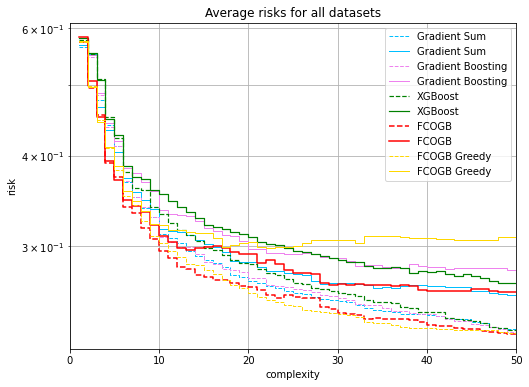

In [7]:
plt.figure(figsize=(8,6))
colours = {}
line_width = {}
width = [1,1, 1.2, 1.5]*4
i = 0
colors=['deepskyblue','violet','green','red','gold','blue','cyan','brown','deepskyblue','purple', 'lime',
        'slategray','magenta','pink','olive','khaki']
label_map={'gpe_boosting_':'Gradient Boosting', 'gpe_fc_Newton-CG': 'Gradient Fully-corrective Boosting', 
           'orth_fc_Newton-CG': 'FCOGB', 'xgb_keep_': 'XGBoost', 
          'xgb_fc_Newton-CG': 'XG Fully-corrective Boosting',
          'mwg_boosting_': 'Gradient Sum','orth_fc_Newton-CG*':'FCOGB Greedy'
          }
for item in pd_train_normal:
    color = colors[i]
    colours[item] = color
    line_width[item] = width[i]
    i+=1
    plt.step(np.array(range(1,51)), 
             np.array(pd_train_normal[item])[1:], '--', color=colours[item],
             label=label_map[item],linewidth=line_width[item],where='post')
    plt.step(np.array(range(1,51)), 
             np.array(pd_test_normal[item])[1:], color=colours[item],
             label=label_map[item],linewidth=line_width[item],where='post')
plt.title("Average risks for all datasets")
plt.xlabel('complexity')
plt.ylabel('risk')
plt.yscale('log')
plt.xlim((0,50))
plt.grid(visible=True, which='major')
plt.grid(visible=True, which='minor')
plt.gca().set_ylim(bottom=0)
plt.legend()
# plt.show()
plt.savefig('average_risks.pdf', bbox_inches='tight',pad_inches=0.01)

In [8]:
# AUC train
pd_train_normal.mean()

mwg_boosting_         0.301700
gpe_boosting_         0.302598
xgb_keep_             0.309886
orth_fc_Newton-CG     0.290424
orth_fc_Newton-CG*    0.290431
dtype: float64

In [9]:
# AUC test
pd_test_normal.mean()

mwg_boosting_         0.316319
gpe_boosting_         0.333623
xgb_keep_             0.334712
orth_fc_Newton-CG     0.312363
orth_fc_Newton-CG*    0.338406
dtype: float64

In [10]:
res_train_log = {}
res_test_log = {}
xgb_index=list(range(30))+[31, 33]
for algo in algo_names:
    res_train_log[algo]=[]
    res_test_log[algo]=[]
    for i in range(1, 52):
        if algo!='xgb_keep_':
            res_train_log[algo].append(trains_log.mean(axis=0)[algo+str(i)])
            res_test_log[algo].append(tests_log.mean(axis=0)[algo+str(i)])
        else:
            res_train_log[algo].append(trains_log.iloc[xgb_index].mean(axis=0)[algo+str(i)])
            res_test_log[algo].append(tests_log.iloc[xgb_index].mean(axis=0)[algo+str(i)])
pd_train_log=pd.DataFrame.from_dict(res_train_log)
pd_test_log=pd.DataFrame.from_dict(res_test_log)

/tmp/ipykernel_254/3350750437.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  res_train_log[algo].append(trains_log.mean(axis=0)[algo+str(i)])
/tmp/ipykernel_254/3350750437.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  res_test_log[algo].append(tests_log.mean(axis=0)[algo+str(i)])
/tmp/ipykernel_254/3350750437.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  res_train_log[algo].append(trains_log.iloc[xgb_index].mean(axis=0)[algo+str(i)])
/tmp/ipykernel_254/3350750437.py:

In [11]:
trains_log.mean(axis=0)

/tmp/ipykernel_254/293520618.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  trains_log.mean(axis=0)


mwg_boosting_1          0.000000
mwg_boosting_2         -1.039257
mwg_boosting_3         -1.052376
mwg_boosting_4         -1.211131
mwg_boosting_5         -1.312562
                          ...   
orth_fc_Newton-CG*47   -2.382106
orth_fc_Newton-CG*48   -2.382106
orth_fc_Newton-CG*49   -2.384497
orth_fc_Newton-CG*50   -2.391542
orth_fc_Newton-CG*51   -2.392263
Length: 255, dtype: float64

In [12]:
sirus_train=pd.read_csv('./SIRUS_train.csv')
sirus_test=pd.read_csv('./SIRUS_test.csv')
sirus_complex=pd.read_csv('./SIRUS_complex.csv')

In [13]:
sirus_test_risks={}
sirus_test_log_risks={}
sirus_train_risks={}
sirus_train_log_risks={}
for dataset in datasets:
    if dataset in datasets[-5:]:
        continue
    train=np.array([])
    test=np.array([])
    for i in range(50):
        k=0
        if i==0:
            while k<sirus_complex[dataset][i]-1:
                train=np.append(train, 1/2.71828)
                test=np.append(test, 1/2.71828)
                k+=1
        else:
            while k<sirus_complex[dataset][i]-1:
                train=np.append(train, sirus_train[dataset][i-1]/get_max_risk(dataset))
                test=np.append(test, sirus_test[dataset][i-1]/get_max_risk(dataset))
                k+=1
                if len(train)>50:
                    break
        if len(train)>50:
            break
    sirus_test_risks[dataset]=test
    sirus_test_log_risks[dataset]=np.log(test)
    sirus_train_risks[dataset]=train
    sirus_train_log_risks[dataset]=np.log(train)
#     print(dataset, test, train)
sirus_test_pd=pd.DataFrame.from_dict(sirus_test_risks)
sirus_train_pd=pd.DataFrame.from_dict(sirus_train_risks)
sirus_train_pd.to_csv('sirus_train_normal.csv')
sirus_test_pd.to_csv('sirus_test_normal.csv')
sirus_test_log_pd=pd.DataFrame.from_dict(sirus_test_log_risks)
sirus_train_log_pd=pd.DataFrame.from_dict(sirus_train_log_risks)
sirus_test_log_pd.mean(axis=0)['titanic']

-0.1759691177436297

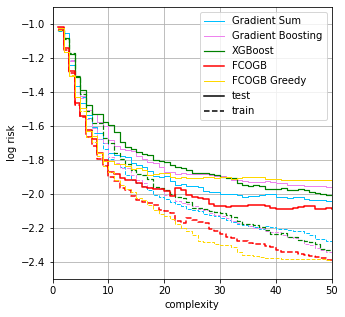

In [14]:
plt.figure(figsize=(5,5))
colours = {}
line_width = {}
width = [1,1, 1.2, 1.5]*4
i = 0
colors=['deepskyblue','violet','green','red','gold','blue','cyan','brown','deepskyblue','purple', 'lime',
        'slategray','magenta','pink','olive','khaki']
label_map={'gpe_boosting_':'Gradient Boosting', 'gpe_fc_Newton-CG': 'Gradient Fully-corrective Boosting', 
           'orth_fc_Newton-CG': 'FCOGB', 'xgb_keep_': 'XGBoost', 
          'xgb_fc_Newton-CG': 'XG Fully-corrective Boosting','orth_fc_Newton-CG*':'FCOGB Greedy',
          'mwg_boosting_': 'Gradient Sum'}

for item in pd_train_log:
    color = colors[i]
    colours[item] = color
    line_width[item] = width[i]
    i+=1
    plt.step(np.array(range(1,51)), 
             np.array(pd_train_log[item])[1:], '--', color=colours[item],
             linewidth=line_width[item],where='post')
    plt.step(np.array(range(1,51)), 
             np.array(pd_test_log[item])[1:], color=colours[item],
             label=label_map[item],linewidth=line_width[item],where='post')


plt.plot([0],[0],'k', label='test')
plt.plot([0],[0],'k--', label='train')
# plt.title("log risks")
plt.xlabel('complexity')
plt.ylabel('log risk')
plt.xlim((0,50))
plt.ylim((-2.5, -0.9))
# plt.yscale('log')
plt.grid(visible=True, which='major')
plt.grid(visible=True, which='minor')
# plt.gca().set_ylim(bottom=0)
plt.legend()
# plt.show()
plt.savefig('average_log_risks0.pdf',  bbox_inches='tight',pad_inches=0.01)

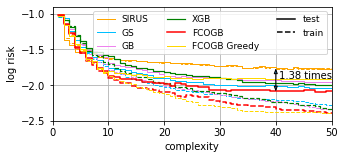

In [15]:
plt.figure(figsize=(5,2.1))
colours = {}
line_width = {}
width = [1,1, 1.2, 1.5]*4
i = 0
colors=['deepskyblue','violet','green','red','gold','blue','cyan','brown','deepskyblue','purple', 'lime',
        'slategray','magenta','pink','olive','khaki']
label_map={'gpe_boosting_':'GB', 'gpe_fc_Newton-CG': 'Gradient Fully-corrective Boosting', 
           'orth_fc_Newton-CG': 'FCOGB', 'xgb_keep_': 'XGB', 
          'xgb_fc_Newton-CG': 'XG Fully-corrective Boosting','orth_fc_Newton-CG*':'FCOGB Greedy',
          'mwg_boosting_': 'GS'}
plt.step(np.array(range(1, 51)), sirus_test_log_pd.mean(axis=1)[1:], color='orange',label='SIRUS',linewidth=1, where='post')
plt.step(np.array(range(1, 51)), sirus_train_log_pd.mean(axis=1)[1:], '--',color='orange',linewidth=1,where='post')

for item in pd_train_log:
    color = colors[i]
    colours[item] = color
    line_width[item] = width[i]
    i+=1
    plt.step(np.array(range(1,51)), 
             np.array(pd_train_log[item])[1:], '--', color=colours[item],
             linewidth=line_width[item],where='post')
    plt.step(np.array(range(1,51)), 
             np.array(pd_test_log[item])[1:], color=colours[item],
             label=label_map[item],linewidth=line_width[item],where='post')
plt.plot([0],[0],'k', label='test')
plt.plot([0],[0],'k--', label='train')
# plt.title("log risks")
plt.xlabel('complexity')
plt.ylabel('log risk')
plt.xlim((0,50))
plt.ylim((-2.5, -0.9))
# plt.yscale('log')
plt.grid(visible=True, which='major')
plt.grid(visible=True, which='minor')
# plt.gca().set_ylim(bottom=0)
plt.legend(fontsize=9,ncol=3)
plt.annotate('',(40,sirus_test_log_pd.mean(axis=1)[40]+0.03),
             (40,pd_test_log['orth_fc_Newton-CG'][40]-0.03),
             arrowprops=dict(arrowstyle="<|-|>,head_width=0.15,head_length=0.4"),
            color='k')
# plt.show()
plt.text(40.5, -1.9, '1.38 times')
plt.savefig('average_log_risks.pdf',  bbox_inches='tight',pad_inches=0.01)

In [16]:
np.exp(sirus_test_log_pd.mean(axis=1)[40]-pd_test_log['orth_fc_Newton-CG'][40])

1.3813303103128705

In [17]:
sirus_test_log_pd.mean(axis=1)[40]

-1.7654708347037185

In [18]:
pd_train_log['xgb_keep_']

0     0.000000
1    -1.036981
2    -1.086081
3    -1.173336
4    -1.303814
5    -1.409589
6    -1.515083
7    -1.582021
8    -1.584846
9    -1.673236
10   -1.702127
11   -1.761438
12   -1.795260
13   -1.823121
14   -1.857190
15   -1.881296
16   -1.891347
17   -1.912700
18   -1.958867
19   -1.967951
20   -1.975665
21   -1.998958
22   -2.021085
23   -2.025078
24   -2.045224
25   -2.081261
26   -2.084765
27   -2.088618
28   -2.099571
29   -2.106318
30   -2.114749
31   -2.125716
32   -2.137057
33   -2.158649
34   -2.178333
35   -2.178610
36   -2.186154
37   -2.195677
38   -2.211857
39   -2.234567
40   -2.235361
41   -2.231733
42   -2.252665
43   -2.255577
44   -2.272800
45   -2.277498
46   -2.283551
47   -2.294852
48   -2.322279
49   -2.330409
50   -2.330409
Name: xgb_keep_, dtype: float64

In [19]:
pd_train_log['xgb_keep_']

0     0.000000
1    -1.036981
2    -1.086081
3    -1.173336
4    -1.303814
5    -1.409589
6    -1.515083
7    -1.582021
8    -1.584846
9    -1.673236
10   -1.702127
11   -1.761438
12   -1.795260
13   -1.823121
14   -1.857190
15   -1.881296
16   -1.891347
17   -1.912700
18   -1.958867
19   -1.967951
20   -1.975665
21   -1.998958
22   -2.021085
23   -2.025078
24   -2.045224
25   -2.081261
26   -2.084765
27   -2.088618
28   -2.099571
29   -2.106318
30   -2.114749
31   -2.125716
32   -2.137057
33   -2.158649
34   -2.178333
35   -2.178610
36   -2.186154
37   -2.195677
38   -2.211857
39   -2.234567
40   -2.235361
41   -2.231733
42   -2.252665
43   -2.255577
44   -2.272800
45   -2.277498
46   -2.283551
47   -2.294852
48   -2.322279
49   -2.330409
50   -2.330409
Name: xgb_keep_, dtype: float64

In [20]:
# AUC train log
pd_train_log.mean()

mwg_boosting_        -1.942988
gpe_boosting_        -1.945509
xgb_keep_            -1.926497
orth_fc_Newton-CG    -2.038256
orth_fc_Newton-CG*   -2.066309
dtype: float64

In [21]:
# AUC train log
pd_test_log.mean()

mwg_boosting_        -1.819900
gpe_boosting_        -1.752877
xgb_keep_            -1.749757
orth_fc_Newton-CG    -1.889686
orth_fc_Newton-CG*   -1.783552
dtype: float64

In [22]:
sirus=[-0.112049504, -0.122167634, -0.294371061, -0.466808738, -0.476424197, -0.026343975, -0.056570351, -0.562118918, -0.15315118, -0.086647807, -0.102032726, -0.220646671, -1.339410775, -1.731605547, -1.801809805, -2.501036032, -2.385966702, -1.075872802, -1.565421027, -2.832026075, -0.850971266, -1.671313316, -2.253794929, -2.216407397, -2.207274914, -1.966112857, -0.665532014, -0.16251893, -2.617295838, ]

In [23]:
res_train_log_dataset = {}
res_train_log_dataset['dataset']=[]
res_test_log_dataset = {}
res_test_log_dataset['dataset']=[]
datasets_list=[]
for algo in algo_names:
    res_train_log_dataset[algo]=[]
    res_test_log_dataset[algo]=[]
    for i in range(len(trains_log)):
        if algo==algo_names[-1]:
            res_train_log_dataset['dataset'].append(dataset_names[i])
            res_test_log_dataset['dataset'].append(dataset_names[i])
            datasets_list.append(datasets[i])
        res_train_log_dataset[algo].append(trains_log[[algo+str(i) for i in range(1,50)]].mean(axis=1).iloc[i])
        res_test_log_dataset[algo].append(tests_log[[algo+str(i) for i in range(1,50)]].mean(axis=1).iloc[i])
res_train_log_dataset['sirus']=[]
res_test_log_dataset['sirus']=[]
for i in range(len(trains_normal)):
    if i>=29:
        res_train_log_dataset['sirus'].append(1000)
        res_test_log_dataset['sirus'].append(1000)
    else:
        res_train_log_dataset['sirus'].append(sirus[i])
        res_test_log_dataset['sirus'].append(sirus[i])
pd_train_log_dataset=pd.DataFrame.from_dict(res_train_log_dataset)
pd_test_log_dataset=pd.DataFrame.from_dict(res_test_log_dataset)
pd_train_log_dataset

,dataset,mwg_boosting_,gpe_boosting_,xgb_keep_,orth_fc_Newton-CG,orth_fc_Newton-CG*,sirus
0,titanic,-0.390187,-0.450293,-0.454004,-0.473095,-0.459759,-0.112050
1,tic-tac-toe,-0.636076,-0.463594,-0.595458,-0.761126,-0.447288,-0.122168
2,iris,-1.548531,-1.734710,-1.629598,-1.639799,-2.147132,-0.294371
3,breast,-1.424551,-1.218853,-1.335436,-1.314591,-1.371725,-0.466809
4,wine,-2.459953,-1.894326,-1.941617,-1.932207,-2.374519,-0.476424
5,IBM HR,-0.568556,-0.578017,-0.562358,-0.596738,-0.587333,-0.026344
6,telco,-0.390780,-0.396562,-0.392991,-0.381621,-0.412538,-0.056570
7,gender,-1.585509,-1.626819,-1.486187,-1.638890,-1.638890,-0.562119
8,banknote,-1.342096,-1.453498,-1.291569,-1.582130,-1.680134,-0.153151
9,liver,-0.197125,-0.205053,-0.209898,-0.159971,-0.223714,-0.086648


In [24]:
res_train_normal_dataset = {}
res_train_normal_dataset['dataset']=[]
res_test_normal_dataset = {}
res_test_normal_dataset['dataset']=[]
for algo in algo_names:
    res_train_normal_dataset[algo]=[]
    res_test_normal_dataset[algo]=[]
    for i in range(len(trains_normal)):
        if algo==algo_names[-1]:
            res_train_normal_dataset['dataset'].append(dataset_names[i])
            res_test_normal_dataset['dataset'].append(dataset_names[i])
            datasets_list.append(datasets[i])
        res_train_normal_dataset[algo].append(trains_normal[[algo+str(i) for i in range(1,50)]].mean(axis=1).iloc[i])
        res_test_normal_dataset[algo].append(tests_normal[[algo+str(i) for i in range(1,50)]].mean(axis=1).iloc[i])

pd_train_normal_dataset=pd.DataFrame.from_dict(res_train_normal_dataset)
pd_test_normal_dataset=pd.DataFrame.from_dict(res_test_normal_dataset)
# res_train_normal_dataset

In [25]:
pd_train_normal_dataset

,dataset,mwg_boosting_,gpe_boosting_,xgb_keep_,orth_fc_Newton-CG,orth_fc_Newton-CG*
0,titanic,0.683963,0.644902,0.643514,0.629476,0.640856
1,tic-tac-toe,0.556432,0.642979,0.578525,0.508514,0.652821
2,iris,0.299890,0.241572,0.272065,0.246690,0.195157
3,breast,0.283418,0.343466,0.306573,0.303845,0.293864
4,wine,0.167321,0.222072,0.231757,0.208803,0.193787
5,IBM HR,0.569040,0.563813,0.572679,0.553682,0.558645
6,telco,0.679915,0.675553,0.677866,0.685445,0.664778
7,gender,0.246120,0.241554,0.270828,0.226236,0.226236
8,banknote,0.320616,0.296014,0.333044,0.268054,0.256611
9,liver,0.824766,0.818556,0.814939,0.854396,0.805330


In [26]:
df=pd_train_normal_dataset.sort_values(by='orth_fc_Newton-CG').reset_index().drop('index', axis=1)
df

,dataset,mwg_boosting_,gpe_boosting_,xgb_keep_,orth_fc_Newton-CG,orth_fc_Newton-CG*
0,gdp,0.025106,0.024859,0.024949,0.024674,0.024898
1,life expect.,0.026274,0.026647,0.026783,0.026044,0.025983
2,happiness,0.031534,0.030043,0.031546,0.029249,0.029209
3,red wine,0.034709,0.034988,0.034986,0.034470,0.034426
4,friedman3,0.046674,0.042269,0.042648,0.041683,0.041453
5,friedman1,0.069540,0.073356,0.070826,0.066981,0.067337
6,smoking,0.108733,0.110491,0.146126,0.072247,0.079146
7,friedman2,0.090109,0.088889,0.104493,0.075553,0.078033
8,boston,0.087125,0.086101,0.088590,0.081682,0.080129
9,covid vic,0.136014,0.102710,0.114491,0.086538,0.080240


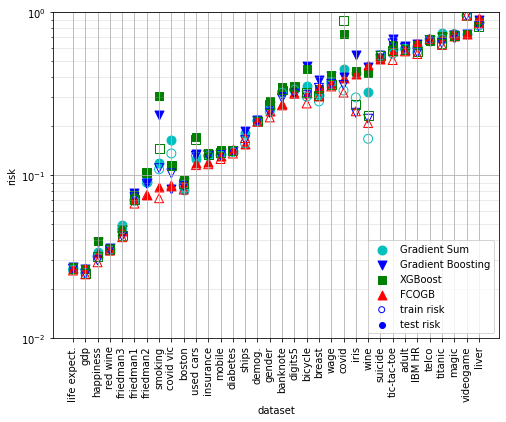

In [27]:
df0=pd_train_normal_dataset.sort_values(by='orth_fc_Newton-CG').reset_index().drop('index', axis=1)
df1=pd_test_normal_dataset.sort_values(by='orth_fc_Newton-CG').reset_index().drop('index', axis=1)
ax1=df1.plot.scatter(x='dataset', y='mwg_boosting_', marker='o', c='c',s=80,logy=True, grid=True, figsize=(8,6), 
                    label='Gradient Sum', legend=True, xlabel='dataset', ylabel='risk', rot=90, ylim=(0.01, 1))
ax2=df1.plot.scatter(x='dataset', y='gpe_boosting_', marker='v',s=80,ax=ax1, c='b', grid=True, label='Gradient Boosting',
                   xlabel='dataset', ylabel='risk', rot=90)
ax3=df1.plot.scatter(x='dataset', y='xgb_keep_', marker='s',s=80,ax=ax1, c='g', grid=True, label='XGBoost',
                   xlabel='dataset', ylabel='risk', rot=90)
ax4=df1.plot.scatter(x='dataset', y='orth_fc_Newton-CG', marker='^',s=80, ax=ax1, c='r', grid=True, label='FCOGB',
                   xlabel='dataset', ylabel='risk', rot=90)
ax5=df0.plot.scatter(x='dataset', y='mwg_boosting_', marker='o',s=80,c='none', edgecolors='c',  grid=True, ylabel='risk', ax=ax1,rot=90)
ax6=df0.plot.scatter(x='dataset', y='gpe_boosting_', marker='v',s=80,ax=ax1, c='none', edgecolors='b',ylabel='risk',  grid=True, rot=90)
ax7=df0.plot.scatter(x='dataset', y='xgb_keep_', marker='s',s=80,ax=ax1, c='none', edgecolors='g',ylabel='risk',  grid=True,rot=90)
ax8=df0.plot.scatter(x='dataset', y='orth_fc_Newton-CG', marker='^',s=80, ax=ax1, c='none', edgecolors='r', ylabel='risk', grid=True,rot=90)
plt.scatter((1,2),(2,2), marker='o', c='none', edgecolors='b', label='train risk')
plt.scatter((1,2),(2,2), marker='o', c='blue', label='test risk')
plt.legend()
ax1.grid(which='minor', alpha=0.3)
plt.savefig('all_datasets_order_log.pdf', bbox_inches='tight',pad_inches=0.01)

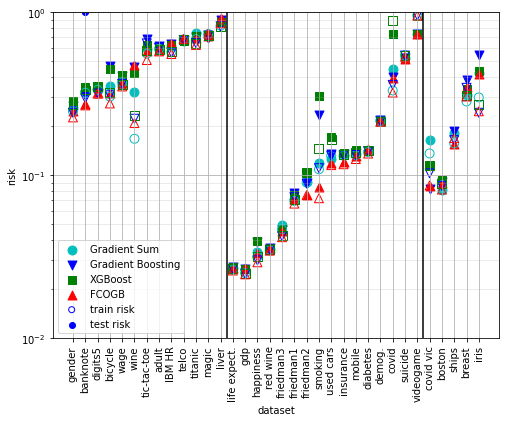

In [28]:
df6=df0
df7=df1.reindex([16,17,18,19,21,24,26,27,28,29,30,31,33,
                0,1,2,3,4,5,6,7,10,11,12,13,15,22,25,32,
                8,9,14,20,23])
# print(df7)
ax1=df7.plot.scatter(x='dataset', y='mwg_boosting_', marker='o', c='c',s=80,logy=True, grid=True, figsize=(8,6), 
                    label='Gradient Sum', legend=True, xlabel='dataset', ylabel='risk', rot=90, ylim=(0.01, 1))
ax2=df7.plot.scatter(x='dataset', y='gpe_boosting_', marker='v',s=80,ax=ax1, c='b', grid=True, label='Gradient Boosting',
                   xlabel='dataset', ylabel='risk', rot=90)
ax3=df7.plot.scatter(x='dataset', y='xgb_keep_', marker='s',s=80,ax=ax1, c='g', grid=True, label='XGBoost',
                   xlabel='dataset', ylabel='risk', rot=90)
ax4=df7.plot.scatter(x='dataset', y='orth_fc_Newton-CG', marker='^',s=80, ax=ax1, c='r', grid=True, label='FCOGB',
                   xlabel='dataset', ylabel='risk', rot=90)
ax5=df6.plot.scatter(x='dataset', y='mwg_boosting_', marker='o',s=80,c='none', edgecolors='c',  grid=True, ylabel='risk', ax=ax1,rot=90)
ax6=df6.plot.scatter(x='dataset', y='gpe_boosting_', marker='v',s=80,ax=ax1, c='none', edgecolors='b',ylabel='risk',  grid=True, rot=90)
ax7=df6.plot.scatter(x='dataset', y='xgb_keep_', marker='s',s=80,ax=ax1, c='none', edgecolors='g',ylabel='risk',  grid=True,rot=90)
ax8=df6.plot.scatter(x='dataset', y='orth_fc_Newton-CG', marker='^',s=80, ax=ax1, c='none', edgecolors='r', ylabel='risk', grid=True,rot=90)
plt.scatter((1,2),(1,2), marker='o', c='none', edgecolors='b', label='train risk')
plt.scatter((1,2),(1,2), marker='o', c='blue', label='test risk')
plt.legend()
ax1.plot((12.5,12.5),(0.001, 1),c='k')
ax1.plot((28.5,28.5),(0.001,1),c='k')
ax1.grid(which='minor', alpha=0.3)
plt.savefig('all_datasets_order_log.pdf', bbox_inches='tight',pad_inches=0.01)

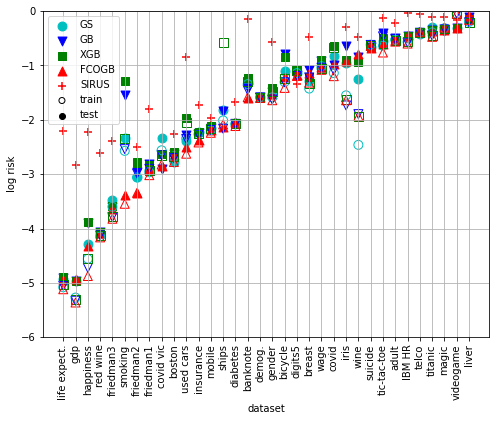

In [29]:
fig = plt.figure(figsize=(8,8))
gs = GridSpec(nrows=1, ncols=1)
ax0 = fig.add_subplot(gs[0, 0])
df2=pd_train_log_dataset.sort_values(by='orth_fc_Newton-CG').reset_index().drop('index', axis=1)
df3=pd_test_log_dataset.sort_values(by='orth_fc_Newton-CG').reset_index().drop('index', axis=1)
ax1=df3.plot.scatter(x='dataset', y='mwg_boosting_', marker='o', c='c',s=80,logy=False, ax=ax0, grid=True, figsize=(8,6), 
                    label='GS', legend=True, xlabel='dataset', ylabel='log risk', rot=90, ylim=(-6, 0))
ax2=df3.plot.scatter(x='dataset', y='gpe_boosting_', marker='v',s=80,c='b', ax=ax0, grid=True, label='GB',
                   xlabel='dataset', ylabel='log risk', rot=90)
ax3=df3.plot.scatter(x='dataset', y='xgb_keep_', marker='s',s=80,c='g', ax=ax0, grid=True, label='XGB',
                   xlabel='dataset', ylabel='log risk', rot=90)
ax4=df3.plot.scatter(x='dataset', y='orth_fc_Newton-CG', marker='^',s=80, ax=ax0, c='r', grid=True, label='FCOGB',
                   xlabel='dataset', ylabel='log risk', rot=90)
df3.plot.scatter(x='dataset', y='sirus', marker='+',s=80, ax=ax0, c='r', grid=True, label='SIRUS',
                   xlabel='dataset', ylabel='log risk', rot=90)
ax5=df2.plot.scatter(x='dataset', y='mwg_boosting_', marker='o',s=80,c='none', edgecolors='c',  grid=True, ylabel='log risk', ax=ax1,rot=90)
ax6=df2.plot.scatter(x='dataset', y='gpe_boosting_', marker='v',s=80,ax=ax0, c='none', edgecolors='b',ylabel='log risk',  grid=True, rot=90)
ax7=df2.plot.scatter(x='dataset', y='xgb_keep_', marker='s',s=80,ax=ax0, c='none', edgecolors='g',ylabel='log risk',  grid=True,rot=90)
ax8=df2.plot.scatter(x='dataset', y='orth_fc_Newton-CG', marker='^',s=80, ax=ax0, c='none', edgecolors='r', ylabel='log risk', grid=True,rot=90)
plt.scatter((1,2),(1,2), marker='o', c='none', edgecolors='k', label='train')
plt.scatter((1,2),(1,2), marker='o', c='k', label='test')
plt.legend()
ax1.grid(which='minor', alpha=0.3)
# plt.savefig('all_datasets_order_log.pdf', bbox_inches='tight',pad_inches=0.01)
# ax3 = fig.add_axes([0.55, 0.22, 0.3, 0.4])
# # plt.figure(figsize=(4,4))
# ax3.plot((0,3039),(0,3039))
# ax3.scatter(time_csv[['FCOGB']], time_csv[['XGBoost']], c='lightgreen', edgecolor='darkgreen', marker='s', label='XGB', alpha=0.7)
# ax3.scatter(time_csv[['FCOGB']], time_csv[['GB']], c='violet', edgecolor='darkred', marker='o', label='GB', alpha=0.7)
# ax3.scatter(time_csv[['FCOGB']], time_csv[['GS']], c='darkblue', marker='x', label='GS', alpha=0.7)
# ax3.scatter(time_csv[['FCOGB']], time_csv[['SIRUS']], c='orange', edgecolor='red', marker='v', label='SIRUS', alpha=0.7)
# ax3.set_xscale('log')
# ax3.set_yscale('log')
# ax3.set_xlabel('$T_{FCOGB}$')
# ax3.set_ylabel('$T_{Other}$')
# ax3.legend()
# ax3.grid(which='minor', alpha=0.3)
# ax3.grid(which='major', alpha=1)

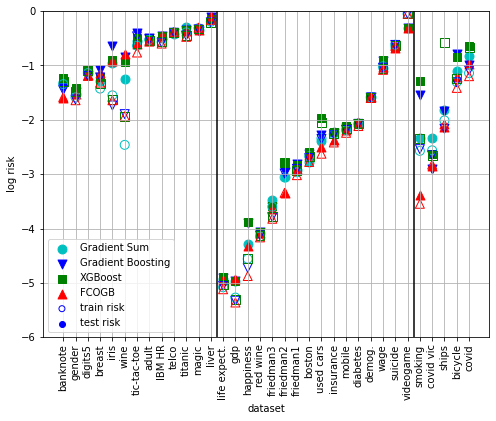

In [30]:
df4=df2#.reindex([15,16,18,19,21,24,26,27,28,29,30,31,33,
    #0,1,2,3,4,6,7,9,10,11,12,14,17,22,25,32,
#5,8,13,20,23])
df5=df3.reindex([15,17,19,20,23, 24,26,27,28,29,30,31,33,
    0,1,2,3,4,6,7,9,10,11,12,14,16,21,25,32,
5,8,13,18,22])
ax1=df5.plot.scatter(x='dataset', y='mwg_boosting_', marker='o', c='c',s=80,logy=False, grid=True, figsize=(8,6), 
                    label='Gradient Sum', legend=True, xlabel='dataset', ylabel='log risk', rot=90, ylim=(-6, 0))
ax2=df5.plot.scatter(x='dataset', y='gpe_boosting_', marker='v',s=80,ax=ax1, c='b', grid=True, label='Gradient Boosting',
                   xlabel='dataset', ylabel='log risk', rot=90)
ax3=df5.plot.scatter(x='dataset', y='xgb_keep_', marker='s',s=80,ax=ax1, c='g', grid=True, label='XGBoost',
                   xlabel='dataset', ylabel='log risk', rot=90)
ax4=df5.plot.scatter(x='dataset', y='orth_fc_Newton-CG', marker='^',s=80, ax=ax1, c='r', grid=True, label='FCOGB',
                   xlabel='dataset', ylabel='log risk', rot=90)
ax5=df4.plot.scatter(x='dataset', y='mwg_boosting_', marker='o',s=80,c='none', edgecolors='c',  grid=True, ylabel='log risk', ax=ax1,rot=90)
ax6=df4.plot.scatter(x='dataset', y='gpe_boosting_', marker='v',s=80,ax=ax1, c='none', edgecolors='b',ylabel='log risk',  grid=True, rot=90)
ax7=df4.plot.scatter(x='dataset', y='xgb_keep_', marker='s',s=80,ax=ax1, c='none', edgecolors='g',ylabel='log risk',  grid=True,rot=90)
ax8=df4.plot.scatter(x='dataset', y='orth_fc_Newton-CG', marker='^',s=80, ax=ax1, c='none', edgecolors='r', ylabel='log risk', grid=True,rot=90)
plt.scatter((1,2),(1,2), marker='o', c='none', edgecolors='b', label='train risk')
plt.scatter((1,2),(1,2), marker='o', c='blue', label='test risk')
plt.legend()
ax1.plot((12.5,12.5),(-6, 2),c='k')
ax1.plot((28.5,28.5),(-6,2),c='k')
ax1.grid(which='minor', alpha=0.3)
plt.savefig('all_datasets_order_log.pdf', bbox_inches='tight',pad_inches=0.01)

### T Test
#### Normal scale, for complexity levels

In [31]:
delta = 0.05
noh = 6
delta_corr = delta/noh
margins = [0, 0.001, 0.01]

In [32]:
risk_avg_g=pd_train_normal['gpe_boosting_'].to_numpy()
risk_avg_x=pd_train_normal['xgb_keep_'].to_numpy()
risk_avg_s=pd_train_normal['mwg_boosting_'].to_numpy()
risk_avg_o=pd_train_normal['orth_fc_Newton-CG'].to_numpy()
risk_avg_og=pd_train_normal['orth_fc_Newton-CG*'].to_numpy()
risk_avg_g_test=pd_test_normal['gpe_boosting_'].to_numpy()
risk_avg_x_test=pd_test_normal['xgb_keep_'].to_numpy()
risk_avg_s_test=pd_test_normal['mwg_boosting_'].to_numpy()
risk_avg_o_test=pd_test_normal['orth_fc_Newton-CG'].to_numpy()
risk_avg_og_test=pd_test_normal['orth_fc_Newton-CG*'].to_numpy()

In [33]:
tests = [['R_O_avg < R_S_avg', risk_avg_o, risk_avg_s],
         ['R_O_avg < R_G_avg', risk_avg_o, risk_avg_g],
         ['R_O_avg < R_X_avg', risk_avg_o, risk_avg_x],
         ['R_O_avg < R_X_avg', risk_avg_o, risk_avg_og],
         ['R_O_avg_test < R_S_avg_test', risk_avg_o_test, risk_avg_s_test],
         ['R_O_avg_test < R_G_avg_test', risk_avg_o_test, risk_avg_g_test],
         ['R_O_avg_test < R_X_avg_test', risk_avg_o_test, risk_avg_x_test],
         ['R_O_avg_test < R_OG_avg_test', risk_avg_o_test, risk_avg_og_test],
        ]

for n, a, b in tests:
    print(n)
    alter = 'less'
    for m in margins:
        print('margin', m, end=': \t')
        avg_so=ttest_rel((np.array(a)+m), b, alternative=alter)
        print(avg_so.pvalue, '\t' ,avg_so.pvalue <= delta_corr*2)
    print()

R_O_avg < R_S_avg
margin 0: 	6.6887392751809776e-09 	 True
margin 0.001: 	5.816594747082798e-08 	 True
margin 0.01: 	0.22344775894731822 	 False

R_O_avg < R_G_avg
margin 0: 	6.4453827108351e-11 	 True
margin 0.001: 	6.898796082153962e-10 	 True
margin 0.01: 	0.07790888130717791 	 False

R_O_avg < R_X_avg
margin 0: 	7.814739831701322e-13 	 True
margin 0.001: 	4.117076208324159e-12 	 True
margin 0.01: 	1.8006357907662346e-05 	 True

R_O_avg < R_X_avg
margin 0: 	0.49695969263853645 	 False
margin 0.001: 	0.8851005831953076 	 False
margin 0.01: 	1.0 	 False

R_O_avg_test < R_S_avg_test
margin 0: 	0.010274510121209082 	 True
margin 0.001: 	0.03996073231796417 	 False
margin 0.01: 	0.999691336612307 	 False

R_O_avg_test < R_G_avg_test
margin 0: 	2.915786985544698e-19 	 True
margin 0.001: 	1.9716916157179403e-18 	 True
margin 0.01: 	6.416373872290308e-10 	 True

R_O_avg_test < R_X_avg_test
margin 0: 	5.845494710905633e-16 	 True
margin 0.001: 	3.051302272643631e-15 	 True
margin 0.01: 	3.04

In [34]:
# Greedy
tests = [['R_O_avg < R_S_avg', risk_avg_og, risk_avg_s],
         ['R_O_avg < R_G_avg', risk_avg_og, risk_avg_g],
         ['R_O_avg < R_X_avg', risk_avg_og, risk_avg_x],
         ['R_O_avg_test < R_S_avg_test', risk_avg_og_test, risk_avg_s_test],
         ['R_O_avg_test < R_G_avg_test', risk_avg_og_test, risk_avg_g_test],
         ['R_O_avg_test < R_X_avg_test', risk_avg_og_test, risk_avg_x_test],
        ]

for n, a, b in tests:
    print(n)
    alter = 'less'
    for m in margins:
        print('margin', m, end=': \t')
        avg_so=ttest_rel((np.array(a)+m), b, alternative=alter)
        print(avg_so.pvalue, '\t' ,avg_so.pvalue <= delta_corr*2)
    print()

R_O_avg < R_S_avg
margin 0: 	5.139186981107278e-12 	 True
margin 0.001: 	8.058862323522716e-11 	 True
margin 0.01: 	0.16351443362786683 	 False

R_O_avg < R_G_avg
margin 0: 	1.1122601059289691e-13 	 True
margin 0.001: 	1.8027188480255303e-12 	 True
margin 0.01: 	0.04193077470905014 	 False

R_O_avg < R_X_avg
margin 0: 	1.2940084597986517e-15 	 True
margin 0.001: 	8.462055157370597e-15 	 True
margin 0.01: 	7.193194785104779e-07 	 True

R_O_avg_test < R_S_avg_test
margin 0: 	0.9999999580442065 	 False
margin 0.001: 	0.9999999848830223 	 False
margin 0.01: 	0.999999999998291 	 False

R_O_avg_test < R_G_avg_test
margin 0: 	0.9257847292939394 	 False
margin 0.001: 	0.9589795349618319 	 False
margin 0.01: 	0.9999819986278182 	 False

R_O_avg_test < R_X_avg_test
margin 0: 	0.8222467604788232 	 False
margin 0.001: 	0.8792021479394478 	 False
margin 0.01: 	0.9994382673014268 	 False



#### Compare min of other algorithms with FCOGB

In [35]:
risk_avg_orth=pd_train_normal['orth_fc_Newton-CG'].to_numpy()
risk_avg_other=pd_train_normal[['mwg_boosting_', 'gpe_boosting_', 'xgb_keep_']].to_numpy().min(axis=1)
tests = [['R_Orth_avg < Min_R_Other_avg', risk_avg_orth, risk_avg_other]]
for n, a, b in tests:
    print(n)
    alter = 'less'
    for m in margins:
        print('margin', m, end=': \t')
        avg_so=ttest_rel((np.array(a)+m), b, alternative=alter)
        print(avg_so.pvalue, '\t' ,avg_so.pvalue <= delta_corr*2)
    print()

R_Orth_avg < Min_R_Other_avg
margin 0: 	7.278546312565377e-09 	 True
margin 0.001: 	7.278298433455818e-08 	 True
margin 0.01: 	0.36293903146099027 	 False



#### Normal scale, for datasets

In [36]:
risk_avg_g=pd_train_normal_dataset['gpe_boosting_'].to_numpy()
risk_avg_x=pd_train_normal_dataset['xgb_keep_'].to_numpy()
risk_avg_s=pd_train_normal_dataset['mwg_boosting_'].to_numpy()
risk_avg_o=pd_train_normal_dataset['orth_fc_Newton-CG'].to_numpy()
risk_avg_og=pd_train_normal_dataset['orth_fc_Newton-CG*'].to_numpy()
risk_avg_g_test=pd_test_normal_dataset['gpe_boosting_'].to_numpy()
risk_avg_x_test=pd_test_normal_dataset['xgb_keep_'].to_numpy()
risk_avg_s_test=pd_test_normal_dataset['mwg_boosting_'].to_numpy()
risk_avg_o_test=pd_test_normal_dataset['orth_fc_Newton-CG'].to_numpy()
risk_avg_og_test=pd_test_normal_dataset['orth_fc_Newton-CG*'].to_numpy()

In [37]:
tests = [['R_O_avg < R_S_avg', risk_avg_o, risk_avg_s],
         ['R_O_avg < R_G_avg', risk_avg_o, risk_avg_g],
         ['R_O_avg < R_X_avg', risk_avg_o[:-5], risk_avg_x[:-5]],
         ['R_O_avg < R_OG_avg', risk_avg_o, risk_avg_og],
         ['R_O_avg_test < R_S_avg_test', risk_avg_o_test, risk_avg_s_test],
         ['R_O_avg_test < R_G_avg_test', risk_avg_o_test, risk_avg_g_test],
         ['R_O_avg_test < R_X_avg_test', risk_avg_o_test[:-5], risk_avg_x_test[:-5]],
         ['R_O_avg_test < R_OG_avg_test', risk_avg_o_test, risk_avg_og_test],
        ]

for n, a, b in tests:
    print(n)
    alter = 'less'
    for m in margins:
        print('margin', m, end=': \t')
        avg_so=ttest_rel((np.array(a)+m), b, alternative=alter)
        print(avg_so.pvalue, '\t' ,avg_so.pvalue <= delta_corr*2)
    print()

R_O_avg < R_S_avg
margin 0: 	0.0026127963071252355 	 True
margin 0.001: 	0.0050013129405140225 	 True
margin 0.01: 	0.3414804216868853 	 False

R_O_avg < R_G_avg
margin 0: 	0.004948699928868567 	 True
margin 0.001: 	0.008367362862666247 	 True
margin 0.01: 	0.2869945437180266 	 False

R_O_avg < R_X_avg
margin 0: 	0.0015439341603093039 	 True
margin 0.001: 	0.0027876476998088895 	 True
margin 0.01: 	0.19230956334949184 	 False

R_O_avg < R_OG_avg
margin 0: 	0.5008829471296115 	 False
margin 0.001: 	0.5755401388736197 	 False
margin 0.01: 	0.9668940925831866 	 False

R_O_avg_test < R_S_avg_test
margin 0: 	0.2605261414144046 	 False
margin 0.001: 	0.3119902546332458 	 False
margin 0.01: 	0.8098614159197921 	 False

R_O_avg_test < R_G_avg_test
margin 0: 	0.0040802087418458175 	 True
margin 0.001: 	0.005651057557544215 	 True
margin 0.01: 	0.07183852309676532 	 False

R_O_avg_test < R_X_avg_test
margin 0: 	0.036528014106890244 	 False
margin 0.001: 	0.053278788116591945 	 False
margin 0.01:

In [38]:
# Greedy
tests = [['R_O_avg < R_S_avg', risk_avg_og, risk_avg_s],
         ['R_O_avg < R_G_avg', risk_avg_og, risk_avg_g],
         ['R_O_avg < R_X_avg', risk_avg_og, risk_avg_x],
         ['R_O_avg_test < R_S_avg_test', risk_avg_og_test, risk_avg_s_test],
         ['R_O_avg_test < R_G_avg_test', risk_avg_og_test, risk_avg_g_test],
         ['R_O_avg_test < R_X_avg_test', risk_avg_og_test, risk_avg_x_test],
        ]

for n, a, b in tests:
    print(n)
    alter = 'less'
    for m in margins:
        print('margin', m, end=': \t')
        avg_so=ttest_rel((np.array(a)+m), b, alternative=alter)
        print(avg_so.pvalue, '\t' ,avg_so.pvalue <= delta_corr*2)
    print()

R_O_avg < R_S_avg
margin 0: 	0.01683643071586252 	 False
margin 0.001: 	0.02548574402643856 	 False
margin 0.01: 	0.38028583253278625 	 False

R_O_avg < R_G_avg
margin 0: 	1.113521340706356e-05 	 True
margin 0.001: 	3.499619805926512e-05 	 True
margin 0.01: 	0.15582178669286365 	 False

R_O_avg < R_X_avg
margin 0: 	0.06554310001185287 	 False
margin 0.001: 	0.06776022419639935 	 False
margin 0.01: 	0.090538869310055 	 False

R_O_avg_test < R_S_avg_test
margin 0: 	0.9499871936234323 	 False
margin 0.001: 	0.9572903460504102 	 False
margin 0.01: 	0.9912654687894928 	 False

R_O_avg_test < R_G_avg_test
margin 0: 	0.6510269958031699 	 False
margin 0.001: 	0.6885164940027981 	 False
margin 0.01: 	0.9202999526092395 	 False

R_O_avg_test < R_X_avg_test
margin 0: 	0.13628407115875046 	 False
margin 0.001: 	0.13819550180309095 	 False
margin 0.01: 	0.1562598643646689 	 False



#### log scale, for complexity levels

In [39]:
risk_avg_g=pd_train_log['gpe_boosting_'].to_numpy()
risk_avg_x=pd_train_log['xgb_keep_'].to_numpy()
risk_avg_s=pd_train_log['mwg_boosting_'].to_numpy()
risk_avg_o=pd_train_log['orth_fc_Newton-CG'].to_numpy()
risk_avg_og=pd_train_log['orth_fc_Newton-CG*'].to_numpy()
risk_avg_g_test=pd_test_log['gpe_boosting_'].to_numpy()
risk_avg_x_test=pd_test_log['xgb_keep_'].to_numpy()
risk_avg_s_test=pd_test_log['mwg_boosting_'].to_numpy()
risk_avg_o_test=pd_test_log['orth_fc_Newton-CG'].to_numpy()
risk_avg_og_test=pd_test_log['orth_fc_Newton-CG*'].to_numpy()

In [40]:
tests = [['R_O_avg < R_S_avg', risk_avg_o, risk_avg_s],
         ['R_O_avg < R_G_avg', risk_avg_o, risk_avg_g],
         ['R_O_avg < R_X_avg', risk_avg_o, risk_avg_x],
         ['R_O_avg < R_OG_avg', risk_avg_o, risk_avg_og],
         ['R_O_avg_test < R_S_avg_test', risk_avg_o_test, risk_avg_s_test],
         ['R_O_avg_test < R_G_avg_test', risk_avg_o_test, risk_avg_g_test],
         ['R_O_avg_test < R_X_avg_test', risk_avg_o_test, risk_avg_x_test],
         ['R_O_avg_test < R_OG_avg_test', risk_avg_o_test, risk_avg_og_test],
        ]

for n, a, b in tests:
    print(n)
    alter = 'less'
    for m in margins:
        print('margin', m, end=': \t')
        avg_so=ttest_rel((np.array(a)+m), b, alternative=alter)
        print(avg_so.pvalue, '\t' ,avg_so.pvalue <= delta_corr*2)
    print()

R_O_avg < R_S_avg
margin 0: 	3.5565949033752974e-28 	 True
margin 0.001: 	5.752926225660475e-28 	 True
margin 0.01: 	5.312528809364069e-26 	 True

R_O_avg < R_G_avg
margin 0: 	1.047051571439252e-27 	 True
margin 0.001: 	1.7124056253290772e-27 	 True
margin 0.01: 	1.7603956722566907e-25 	 True

R_O_avg < R_X_avg
margin 0: 	9.280072490006878e-25 	 True
margin 0.001: 	1.3775732254687458e-24 	 True
margin 0.01: 	5.465925617133413e-23 	 True

R_O_avg < R_OG_avg
margin 0: 	0.9999983445842322 	 False
margin 0.001: 	0.9999991393432287 	 False
margin 0.01: 	0.9999999978927108 	 False

R_O_avg_test < R_S_avg_test
margin 0: 	3.2199178453860946e-22 	 True
margin 0.001: 	5.931604067091136e-22 	 True
margin 0.01: 	1.9313348435725006e-19 	 True

R_O_avg_test < R_G_avg_test
margin 0: 	1.0811629134655301e-29 	 True
margin 0.001: 	1.5169300516194818e-29 	 True
margin 0.01: 	3.525648237391717e-28 	 True

R_O_avg_test < R_X_avg_test
margin 0: 	6.1445372445866224e-24 	 True
margin 0.001: 	8.393587854165126

In [41]:
# Greedy
tests = [['R_O_avg < R_S_avg', risk_avg_og, risk_avg_s],
         ['R_O_avg < R_G_avg', risk_avg_og, risk_avg_g],
         ['R_O_avg < R_X_avg', risk_avg_og, risk_avg_x],
         ['R_O_avg_test < R_S_avg_test', risk_avg_og_test, risk_avg_s_test],
         ['R_O_avg_test < R_G_avg_test', risk_avg_og_test, risk_avg_g_test],
         ['R_O_avg_test < R_X_avg_test', risk_avg_og_test, risk_avg_x_test],
        ]

for n, a, b in tests:
    print(n)
    alter = 'less'
    for m in margins:
        print('margin', m, end=': \t')
        avg_so=ttest_rel((np.array(a)+m), b, alternative=alter)
        print(avg_so.pvalue, '\t' ,avg_so.pvalue <= delta_corr*2)
    print()

R_O_avg < R_S_avg
margin 0: 	3.249710590229428e-26 	 True
margin 0.001: 	4.6767800808610874e-26 	 True
margin 0.01: 	1.3808708423221195e-24 	 True

R_O_avg < R_G_avg
margin 0: 	3.279843747929391e-25 	 True
margin 0.001: 	4.736108942422375e-25 	 True
margin 0.01: 	1.4419161984505533e-23 	 True

R_O_avg < R_X_avg
margin 0: 	1.1233909504945191e-27 	 True
margin 0.001: 	1.5559657680528814e-27 	 True
margin 0.01: 	3.189439406777814e-26 	 True

R_O_avg_test < R_S_avg_test
margin 0: 	0.9995001277795256 	 False
margin 0.001: 	0.9996263411957683 	 False
margin 0.01: 	0.9999765722610762 	 False

R_O_avg_test < R_G_avg_test
margin 0: 	0.0004338627437325561 	 True
margin 0.001: 	0.0006135964730810607 	 True
margin 0.01: 	0.010378631609319365 	 True

R_O_avg_test < R_X_avg_test
margin 0: 	0.004351074947491702 	 True
margin 0.001: 	0.005373030591753381 	 True
margin 0.01: 	0.030103680143073297 	 False



In [42]:
risk_avg_orth=pd_train_log['orth_fc_Newton-CG'].to_numpy()
risk_avg_other=pd_train_log[['mwg_boosting_', 'gpe_boosting_', 'xgb_keep_']].to_numpy().min(axis=1)
tests = [['R_Orth_avg < Min_R_Other_avg', risk_avg_orth, risk_avg_other]]
for n, a, b in tests:
    print(n)
    alter = 'less'
    for m in margins:
        print('margin', m, end=': \t')
        avg_so=ttest_rel((np.array(a)+m), b, alternative=alter)
        print(avg_so.pvalue, '\t' ,avg_so.pvalue <= delta_corr*2)
    print()

R_Orth_avg < Min_R_Other_avg
margin 0: 	3.8358523063241324e-27 	 True
margin 0.001: 	6.68752216048113e-27 	 True
margin 0.01: 	1.293239856323467e-24 	 True



#### Log scale for datasets

In [43]:
risk_avg_g=pd_train_log_dataset['gpe_boosting_'].to_numpy()
risk_avg_x=pd_train_log_dataset['xgb_keep_'].to_numpy()
risk_avg_s=pd_train_log_dataset['mwg_boosting_'].to_numpy()
risk_avg_o=pd_train_log_dataset['orth_fc_Newton-CG'].to_numpy()
risk_avg_og=pd_train_log_dataset['orth_fc_Newton-CG*'].to_numpy()
risk_avg_g_test=pd_test_log_dataset['gpe_boosting_'].to_numpy()
risk_avg_x_test=pd_test_log_dataset['xgb_keep_'].to_numpy()
risk_avg_s_test=pd_test_log_dataset['mwg_boosting_'].to_numpy()
risk_avg_o_test=pd_test_log_dataset['orth_fc_Newton-CG'].to_numpy()
risk_avg_og_test=pd_test_log_dataset['orth_fc_Newton-CG*'].to_numpy()

In [44]:
risk_avg_o_test

array([-0.36788282, -0.6007138 , -0.9255396 , -1.13635026, -0.79365714,
       -0.44175218, -0.3863587 , -1.52096537, -1.59012358, -0.08035044,
       -0.34589094, -0.5368519 , -1.17921727, -2.37511081, -2.91259278,
       -3.35073773, -3.64456866, -1.02019783, -1.58659853, -4.91983596,
       -2.50075317, -2.04057789, -2.63982489, -4.31777469, -4.95152687,
       -2.19056046, -0.67503641, -0.31852884, -4.08662547, -2.84314783,
       -0.97927052, -1.20652148, -2.12244473, -3.38912387])

In [45]:
tests = [['R_O_avg < R_S_avg', risk_avg_o, risk_avg_s],
         ['R_O_avg < R_G_avg', risk_avg_o, risk_avg_g],
         ['R_O_avg < R_X_avg', risk_avg_o, risk_avg_x],
         ['R_O_avg < R_OG_avg', risk_avg_o, risk_avg_og],
         ['R_O_avg_test < R_S_avg_test', risk_avg_o_test, risk_avg_s_test],
         ['R_O_avg_test < R_G_avg_test', risk_avg_o_test, risk_avg_g_test],
         ['R_O_avg_test < R_X_avg_test', risk_avg_o_test, risk_avg_x_test],
         ['R_O_avg_test < R_OG_avg_test', risk_avg_o_test, risk_avg_og_test],
        ]

for n, a, b in tests:
    print(n)
    alter = 'less'
    for m in margins:
        print('margin', m, end=': \t')
        avg_so=ttest_rel((np.array(a)+m), b, alternative=alter)
        print(avg_so.pvalue, '\t' ,avg_so.pvalue <= delta_corr*2)
    print()

R_O_avg < R_S_avg
margin 0: 	0.006840425523439776 	 True
margin 0.001: 	0.007308111778842777 	 True
margin 0.01: 	0.013044498993805453 	 True

R_O_avg < R_G_avg
margin 0: 	0.003089001203354272 	 True
margin 0.001: 	0.003341122086740361 	 True
margin 0.01: 	0.006653345234460982 	 True

R_O_avg < R_X_avg
margin 0: 	0.0012598837930282072 	 True
margin 0.001: 	0.0013189133599192573 	 True
margin 0.01: 	0.0019829692640656524 	 True

R_O_avg < R_OG_avg
margin 0: 	0.8143987073146219 	 False
margin 0.001: 	0.8224117384525591 	 False
margin 0.01: 	0.8841604330857479 	 False

R_O_avg_test < R_S_avg_test
margin 0: 	0.04470281388599623 	 False
margin 0.001: 	0.04690766200792108 	 False
margin 0.01: 	0.07113068889804182 	 False

R_O_avg_test < R_G_avg_test
margin 0: 	0.010494611766661267 	 True
margin 0.001: 	0.010933980460122955 	 True
margin 0.01: 	0.015706325779282153 	 True

R_O_avg_test < R_X_avg_test
margin 0: 	0.010421821086532623 	 True
margin 0.001: 	0.010664197830228242 	 True
margin 0.01

In [46]:
# Greedy
tests = [['R_O_avg < R_S_avg', risk_avg_og, risk_avg_s],
         ['R_O_avg < R_G_avg', risk_avg_og, risk_avg_g],
         ['R_O_avg < R_X_avg', risk_avg_og, risk_avg_x],
         ['R_O_avg_test < R_S_avg_test', risk_avg_og_test, risk_avg_s_test],
         ['R_O_avg_test < R_G_avg_test', risk_avg_og_test, risk_avg_g_test],
         ['R_O_avg_test < R_X_avg_test', risk_avg_og_test, risk_avg_x_test],
        ]

for n, a, b in tests:
    print(n)
    alter = 'less'
    for m in margins:
        print('margin', m, end=': \t')
        avg_so=ttest_rel((np.array(a)+m), b, alternative=alter)
        print(avg_so.pvalue, '\t' ,avg_so.pvalue <= delta_corr*2)
    print()

R_O_avg < R_S_avg
margin 0: 	0.0006017496336504406 	 True
margin 0.001: 	0.0006507724461222487 	 True
margin 0.01: 	0.0013034328391301451 	 True

R_O_avg < R_G_avg
margin 0: 	0.00011777264897653624 	 True
margin 0.001: 	0.00012955122409779264 	 True
margin 0.01: 	0.00030277371522708117 	 True

R_O_avg < R_X_avg
margin 0: 	0.001762136180372929 	 True
margin 0.001: 	0.0018296202286472644 	 True
margin 0.01: 	0.0025577645045750295 	 True

R_O_avg_test < R_S_avg_test
margin 0: 	0.7842470776671224 	 False
margin 0.001: 	0.7911488249785255 	 False
margin 0.01: 	0.8469795083533905 	 False

R_O_avg_test < R_G_avg_test
margin 0: 	0.21437022527621913 	 False
margin 0.001: 	0.22123881628084535 	 False
margin 0.01: 	0.28868775052601114 	 False

R_O_avg_test < R_X_avg_test
margin 0: 	0.015591322886094047 	 True
margin 0.001: 	0.01615441724564129 	 True
margin 0.01: 	0.022099142859761594 	 False



In [47]:
pd_test_log_dataset

,dataset,mwg_boosting_,gpe_boosting_,xgb_keep_,orth_fc_Newton-CG,orth_fc_Newton-CG*,sirus
0,titanic,-0.297090,-0.352736,-0.343237,-0.367883,-0.345193,-0.112050
1,tic-tac-toe,-0.552668,-0.400001,-0.494969,-0.600714,-0.335210,-0.122168
2,iris,-0.958547,-0.639841,-0.901167,-0.925540,-0.674880,-0.294371
3,breast,-1.293827,-1.079123,-1.207432,-1.136350,-1.011514,-0.466809
4,wine,-1.249976,-0.839076,-0.927107,-0.793657,-0.771186,-0.476424
5,IBM HR,-0.487759,-0.458811,-0.462280,-0.441752,-0.430448,-0.026344
6,telco,-0.416041,-0.399384,-0.408407,-0.386359,-0.434094,-0.056570
7,gender,-1.529183,-1.487341,-1.421498,-1.520965,-1.520965,-0.562119
8,banknote,-1.312429,-1.421554,-1.228926,-1.590124,-1.706847,-0.153151
9,liver,-0.137638,-0.110483,-0.142218,-0.080350,-0.063852,-0.086648


In [48]:
risk_avg_o

array([-0.47309461, -0.76112604, -1.6397994 , -1.31459092, -1.93220694,
       -0.59673792, -0.38162056, -1.63888996, -1.58213002, -0.15997112,
       -0.30347554, -0.56128859, -1.19172499, -2.41593652, -3.01731358,
       -3.3424991 , -3.81957116, -1.07995111, -1.59740398, -5.35990215,
       -2.62279986, -2.11386633, -2.77456897, -4.87273754, -5.11614936,
       -2.23797265, -0.63916276, -0.04809087, -4.16208651, -2.82192837,
       -1.19654595, -1.41227522, -2.08302835, -3.5439965 ])

In [49]:
risk_avg_x

array([-0.4540039 , -0.59545849, -1.62959842, -1.33543596, -1.94161677,
       -0.56235789, -0.39299147, -1.48618724, -1.2915687 , -0.20989788,
       -0.32842719, -0.53638676, -1.08804519, -2.24804712, -2.9400485 ,
       -2.78531607, -3.76999269, -1.04733211, -1.58661158, -5.31109981,
       -2.05019095, -2.06791345, -2.66988784, -4.55667852, -5.03555307,
       -2.15886502, -0.62409857, -0.04808878, -4.12613442, -2.64913263,
       -0.66681791, -1.24464543, -0.57202628, -2.3487227 ])

In [50]:
trains_normal

,dataset,mwg_boosting_1,mwg_boosting_2,mwg_boosting_3,mwg_boosting_4,mwg_boosting_5,mwg_boosting_6,mwg_boosting_7,mwg_boosting_8,mwg_boosting_9,...,orth_fc_Newton-CG*42,orth_fc_Newton-CG*43,orth_fc_Newton-CG*44,orth_fc_Newton-CG*45,orth_fc_Newton-CG*46,orth_fc_Newton-CG*47,orth_fc_Newton-CG*48,orth_fc_Newton-CG*49,orth_fc_Newton-CG*50,orth_fc_Newton-CG*51
0,titanic,1.0,0.966067,0.966067,0.966067,0.865670,0.865670,0.740739,0.740739,0.740739,...,0.569635,0.569635,0.569635,0.569635,0.569635,0.569635,0.569635,0.569635,0.569635,0.569635
1,tic-tac-toe,1.0,0.930454,0.853816,0.853816,0.835272,0.835272,0.835272,0.835272,0.717865,...,0.514689,0.514689,0.514689,0.514689,0.514689,0.514689,0.514689,0.514689,0.514689,0.514689
2,iris,1.0,0.910153,0.910153,0.910153,0.730930,0.730930,0.730930,0.730930,0.730930,...,0.044550,0.044550,0.044550,0.044550,0.044550,0.044550,0.044550,0.044550,0.044550,0.044550
3,breast_cancer,1.0,0.946641,0.946641,0.684733,0.684733,0.684733,0.346561,0.346561,0.298033,...,0.156091,0.156091,0.156091,0.156091,0.156091,0.156091,0.156091,0.156091,0.122842,0.122842
4,load_wine,1.0,0.958921,0.958921,0.628882,0.628882,0.628882,0.245190,0.245190,0.245190,...,0.030542,0.030542,0.030542,0.030542,0.030542,0.030542,0.030542,0.030542,0.030542,0.030542
5,IBM_HR,1.0,0.617451,0.617451,0.599924,0.594705,0.594705,0.590736,0.590736,0.586282,...,0.537092,0.537092,0.537092,0.537092,0.537092,0.537092,0.537092,0.537092,0.537092,0.537092
6,telco_churn,1.0,0.834035,0.834035,0.834035,0.783547,0.783547,0.783547,0.716097,0.716097,...,0.628043,0.628043,0.628043,0.628043,0.628043,0.628043,0.628043,0.628043,0.628043,0.628043
7,GenderRecognition,1.0,0.999820,0.999820,0.628326,0.628326,0.270613,0.270613,0.237925,0.237925,...,0.134794,0.134794,0.133892,0.133892,0.133892,0.133892,0.133892,0.133892,0.133892,0.130650
8,banknote,1.0,0.993383,0.993383,0.847716,0.847716,0.847716,0.470952,0.470952,0.470952,...,0.078573,0.078573,0.078573,0.078573,0.078573,0.078573,0.078573,0.078573,0.078573,0.078573
9,liver,1.0,0.984867,0.984867,0.984867,0.937936,0.937936,0.937936,0.901382,0.901382,...,0.701927,0.701927,0.684452,0.684452,0.684452,0.684452,0.684452,0.631028,0.631028,0.631028


In [51]:
train_datasets={}
test_datasets={}
j=-1
for dataset in datasets:
    j+=1
    train_datasets[dataset]={}
    test_datasets[dataset]={}
    for algo in algo_names:
#         print(algo)
        if j==j:
            train_datasets[dataset][algo]=[(trains_normal[[algo+str(i) for i in range(1, 50)]].iloc[j])]
            test_datasets[dataset][algo]=[(tests_normal[[algo+str(i) for i in range(1, 50)]].iloc[j])]
        else:
            train_datasets[dataset][algo].append(trains_normal[[algo+str(i) for i in range(1, 50)]].iloc[j])
            test_datasets[dataset][algo].append(tests_normal[[algo+str(i) for i in range(1, 50)]].iloc[j])

titanic mwg_boosting_ 0.6839627275630381 0.7474316850028966
titanic gpe_boosting_ 0.6449022639088257 0.7073088017372816
titanic xgb_keep_ 0.6435142998372242 0.7138849738105476
titanic orth_fc_Newton-CG 0.6294763433394898 0.6958559827845335
titanic orth_fc_Newton-CG* 0.6408556337087442 0.7134840346820682


/tmp/ipykernel_254/3318451141.py:32: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.gca().set_ylim(bottom=0)


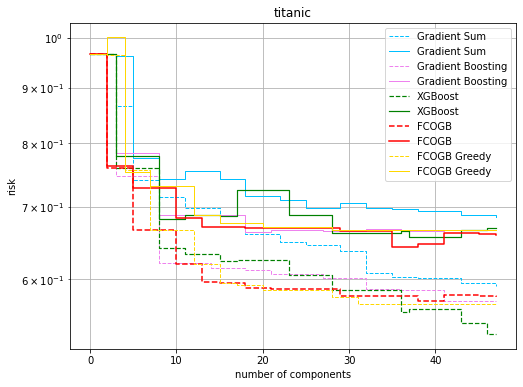

tic-tac-toe mwg_boosting_ 0.5564322789594874 0.5979644979950707
tic-tac-toe gpe_boosting_ 0.6429790974321232 0.6836318575066926
tic-tac-toe xgb_keep_ 0.5785245343665387 0.6294592037129099
tic-tac-toe orth_fc_Newton-CG 0.5085141842551738 0.5798599690996569
tic-tac-toe orth_fc_Newton-CG* 0.6528208223339169 0.7228097442127198


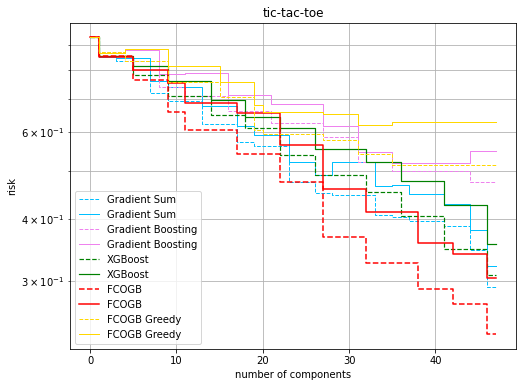

iris mwg_boosting_ 0.29988974833947174 0.42473137126547983
iris gpe_boosting_ 0.24157245618261175 0.5476851008994799
iris xgb_keep_ 0.2720652955125152 0.4368393001449864
iris orth_fc_Newton-CG 0.24669028735950455 0.4182476655828023
iris orth_fc_Newton-CG* 0.19515712619541073 0.5290472664641431


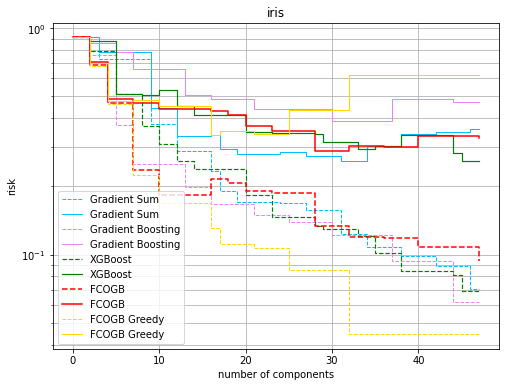

breast_cancer mwg_boosting_ 0.28341846263738774 0.3125245913502865
breast_cancer gpe_boosting_ 0.3434655555507746 0.3824319886062561
breast_cancer xgb_keep_ 0.3065733611270625 0.3384461494115487
breast_cancer orth_fc_Newton-CG 0.3038454475686743 0.3496407910158119
breast_cancer orth_fc_Newton-CG* 0.2938643443105513 0.38555772354864953


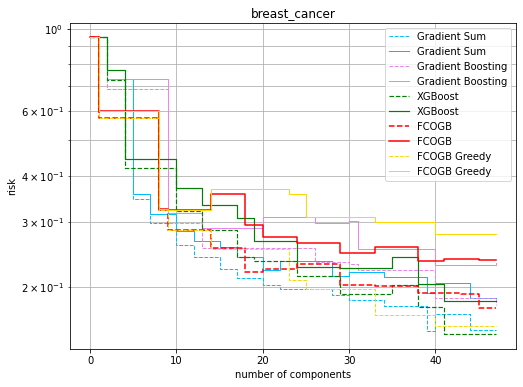

load_wine mwg_boosting_ 0.1673207040577682 0.32235646484255565
load_wine gpe_boosting_ 0.22207161124180588 0.4580560692961108
load_wine xgb_keep_ 0.2317570856335991 0.42280470954401134
load_wine orth_fc_Newton-CG 0.20880313626080674 0.47678807370535453
load_wine orth_fc_Newton-CG* 0.19378701616461572 0.48413162618815503


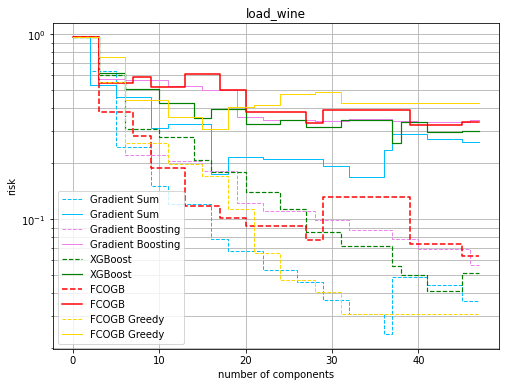

IBM_HR mwg_boosting_ 0.5690402203967792 0.6160195166681491
IBM_HR gpe_boosting_ 0.5638125417737875 0.6343035379686482
IBM_HR xgb_keep_ 0.5726792899763433 0.6318831506612554
IBM_HR orth_fc_Newton-CG 0.5536819879189009 0.6447869260239978
IBM_HR orth_fc_Newton-CG* 0.5586454913968021 0.6519941626962901


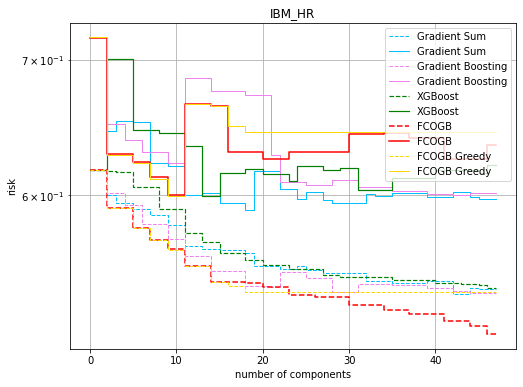

telco_churn mwg_boosting_ 0.6799145880295625 0.6636144629642637
telco_churn gpe_boosting_ 0.6755526072292075 0.6736937002836959
telco_churn xgb_keep_ 0.6778663049440424 0.6680029797671565
telco_churn orth_fc_Newton-CG 0.6854447439891023 0.682485571784271
telco_churn orth_fc_Newton-CG* 0.6647777396408939 0.651134734303509


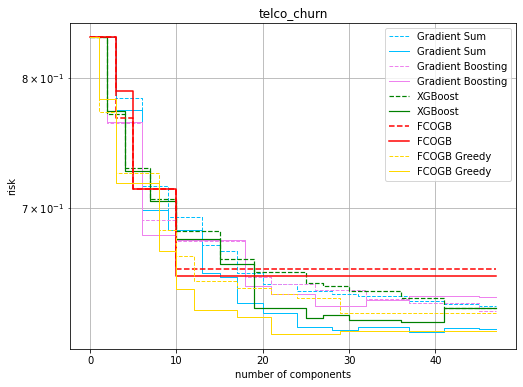

GenderRecognition mwg_boosting_ 0.2461197586213765 0.2579050149752211
GenderRecognition gpe_boosting_ 0.24155427746384722 0.2657884169434377
GenderRecognition xgb_keep_ 0.2708281803721748 0.28516859714908055
GenderRecognition orth_fc_Newton-CG 0.22623620672868297 0.2478572122443958
GenderRecognition orth_fc_Newton-CG* 0.22623620672868297 0.2478572122443958


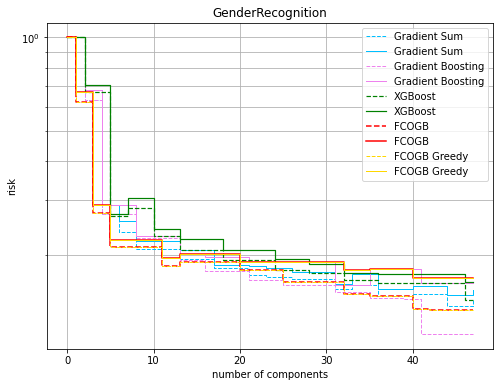

banknote mwg_boosting_ 0.32061585625632727 0.3272328238759752
banknote gpe_boosting_ 0.29601382160933404 0.3094271305502231
banknote xgb_keep_ 0.3330443985717127 0.34968216040037126
banknote orth_fc_Newton-CG 0.2680542105788902 0.2727748932683025
banknote orth_fc_Newton-CG* 0.25661074386460886 0.26772959092759174


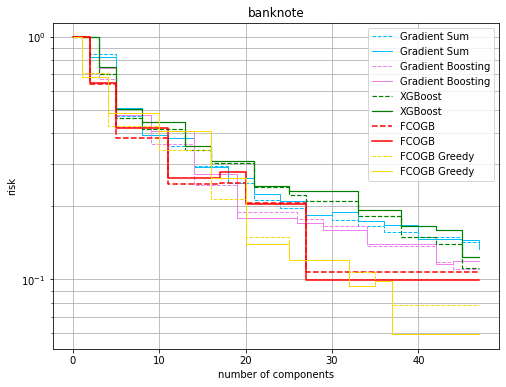

liver mwg_boosting_ 0.8247664242102587 0.8727341148528882
liver gpe_boosting_ 0.8185558164105732 0.896053639779401
liver xgb_keep_ 0.8149385976096587 0.8689995354372938
liver orth_fc_Newton-CG 0.8543961544864469 0.9234686244120831
liver orth_fc_Newton-CG* 0.8053295152215839 0.9386705118371822


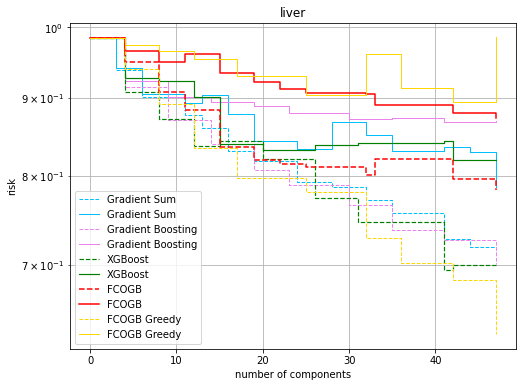

magic mwg_boosting_ 0.7336597179235685 0.7160347163006556
magic gpe_boosting_ 0.718797306548188 0.6988819826123488
magic xgb_keep_ 0.7237565121987174 0.7093461825437419
magic orth_fc_Newton-CG 0.7400288556061203 0.7099250627937077
magic orth_fc_Newton-CG* 0.7081839612727615 0.688900962661451


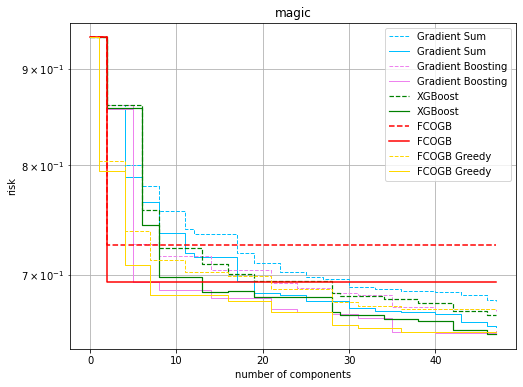

adult mwg_boosting_ 0.5950532920208024 0.6036209915414957
adult gpe_boosting_ 0.6034557277148245 0.6165756551826478
adult xgb_keep_ 0.5899507537966182 0.6025543253025825
adult orth_fc_Newton-CG 0.5743138785180151 0.5880077009566635
adult orth_fc_Newton-CG* 0.5753955985193431 0.5898426171243251


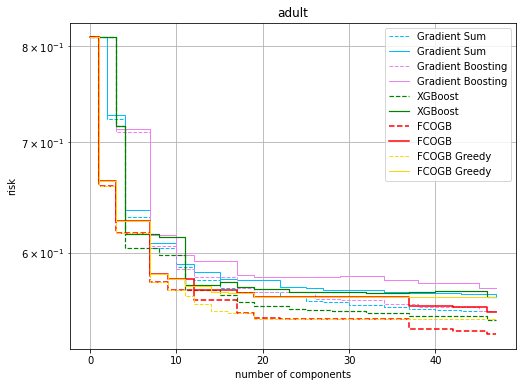

digits5 mwg_boosting_ 0.33395374920256893 0.33166551228464974
digits5 gpe_boosting_ 0.3169885404924639 0.3191037051171764
digits5 xgb_keep_ 0.3490239026590549 0.3463485643922612
digits5 orth_fc_Newton-CG 0.3170131401718947 0.317847005446853
digits5 orth_fc_Newton-CG* 0.3301321251635111 0.3213774582732149


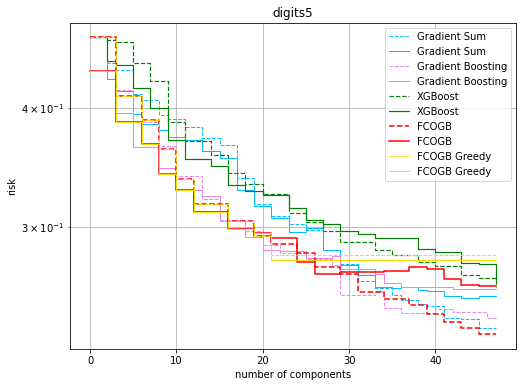

insurance mwg_boosting_ 0.13159353547908348 0.1329514113957213
insurance gpe_boosting_ 0.13241571470977034 0.13588934009278833
insurance xgb_keep_ 0.1343922145666202 0.1378119959769766
insurance orth_fc_Newton-CG 0.11675789412166858 0.12082802873476992
insurance orth_fc_Newton-CG* 0.12058347992721798 0.1275862029586135


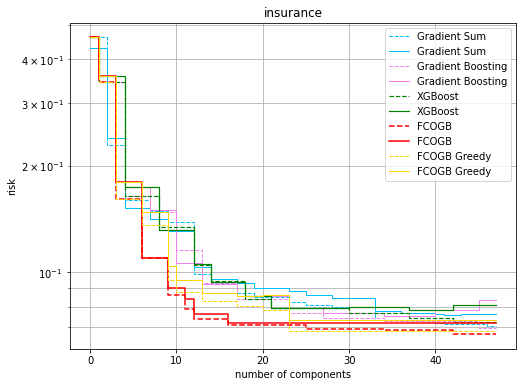

make_friedman1 mwg_boosting_ 0.06954007468591204 0.07155427775332861
make_friedman1 gpe_boosting_ 0.07335615620455452 0.07750218016750261
make_friedman1 xgb_keep_ 0.07082565521323589 0.07598970095763959
make_friedman1 orth_fc_Newton-CG 0.06698107024690353 0.07161210424272679
make_friedman1 orth_fc_Newton-CG* 0.06733725507727527 0.07090667057605751


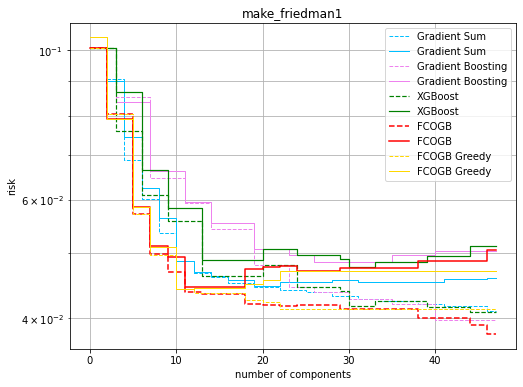

make_friedman2 mwg_boosting_ 0.09010883600393721 0.09126406793796871
make_friedman2 gpe_boosting_ 0.08888876571234727 0.0900706549034694
make_friedman2 xgb_keep_ 0.10449253079391603 0.10475439628038816
make_friedman2 orth_fc_Newton-CG 0.075552624950848 0.0756465420142321
make_friedman2 orth_fc_Newton-CG* 0.07803348532704073 0.07795354104127782


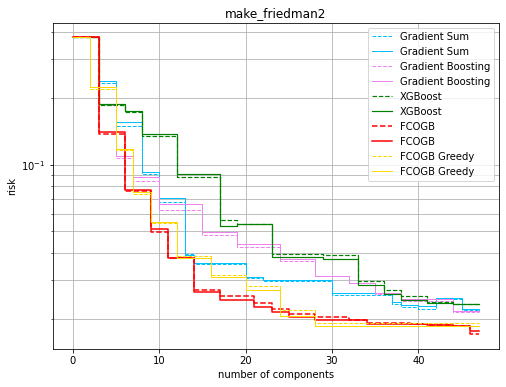

make_friedman3 mwg_boosting_ 0.04667398063180364 0.04959338093116414
make_friedman3 gpe_boosting_ 0.04226922794537759 0.04631700087640059
make_friedman3 xgb_keep_ 0.042647619743215785 0.046705950378106056
make_friedman3 orth_fc_Newton-CG 0.041682528941328255 0.04522681882198929
make_friedman3 orth_fc_Newton-CG* 0.04145330409372455 0.045380395788942644


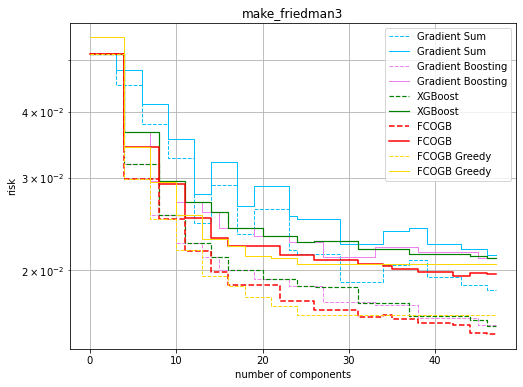

wage mwg_boosting_ 0.3705758523046164 0.3582117201513419
wage gpe_boosting_ 0.3635514093736229 0.4058889159273451
wage xgb_keep_ 0.3607589207246878 0.4122525750204168
wage orth_fc_Newton-CG 0.35013184295141764 0.3678424856069654
wage orth_fc_Newton-CG* 0.3529394227211419 0.36895015135236586


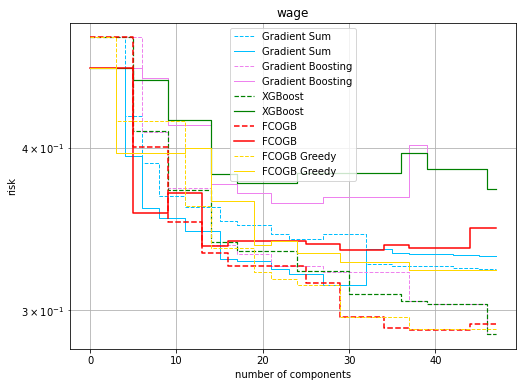

Demographics mwg_boosting_ 0.21476723129571137 0.21654507421483649
Demographics gpe_boosting_ 0.21409916504151547 0.2170776585675185
Demographics xgb_keep_ 0.21459686445101567 0.2173810840499963
Demographics orth_fc_Newton-CG 0.21245118018869785 0.21454192203385375
Demographics orth_fc_Newton-CG* 0.21257393328210195 0.21457794912175615


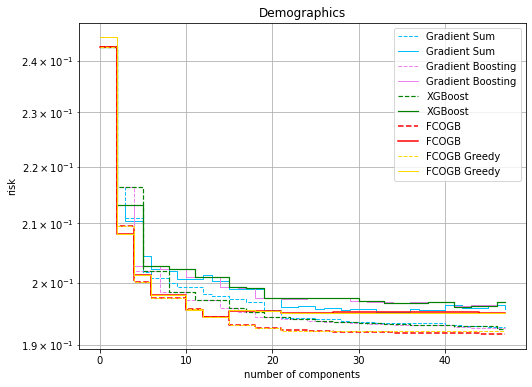

gdp mwg_boosting_ 0.02510617529431706 0.026755006938839202
gdp gpe_boosting_ 0.024859152864016746 0.026689753790486985
gdp xgb_keep_ 0.024948925215948006 0.026696689415065002
gdp orth_fc_Newton-CG 0.024673742987040847 0.026940615224988942
gdp orth_fc_Newton-CG* 0.02489813749314613 0.027123661666495942


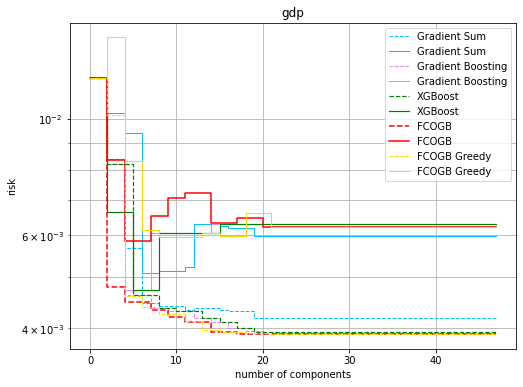

used_cars mwg_boosting_ 0.13153390883958885 0.12605311485218793
used_cars gpe_boosting_ 0.13147569737461473 0.1355230442307935
used_cars xgb_keep_ 0.16584773516642365 0.17168212009542017
used_cars orth_fc_Newton-CG 0.1153393868858985 0.11924439729951646
used_cars orth_fc_Newton-CG* 0.11448161003293508 0.1171166738452732


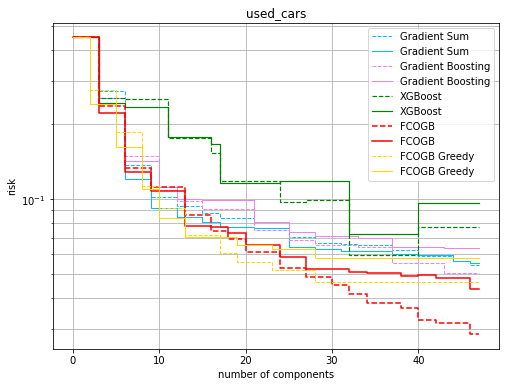

load_diabetes mwg_boosting_ 0.13866829580396858 0.14094661954090423
load_diabetes gpe_boosting_ 0.1406155811422175 0.141135247660006
load_diabetes xgb_keep_ 0.14133055344383125 0.1425472845548763
load_diabetes orth_fc_Newton-CG 0.1358102703318221 0.1439689889887185
load_diabetes orth_fc_Newton-CG* 0.13298533103882654 0.13637425795172817


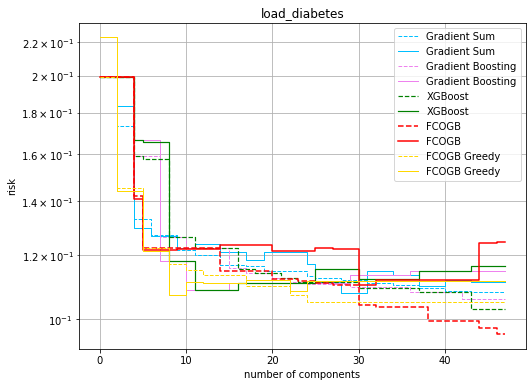

boston mwg_boosting_ 0.08712451656911185 0.08090387600499113
boston gpe_boosting_ 0.0861013011571451 0.09067658496526249
boston xgb_keep_ 0.0885902054180969 0.09303184281592913
boston orth_fc_Newton-CG 0.08168241982310019 0.08948892486975896
boston orth_fc_Newton-CG* 0.08012911529878042 0.0882698291999718


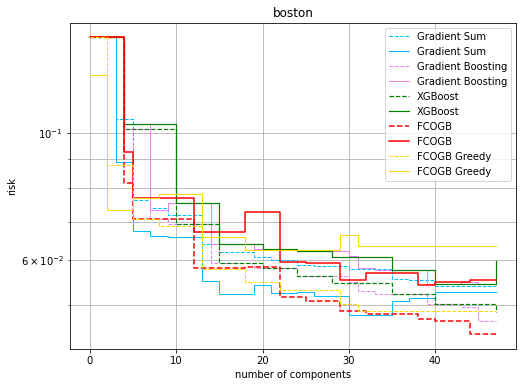

world_happiness_indicator mwg_boosting_ 0.031533589337706745 0.033914174665191914
world_happiness_indicator gpe_boosting_ 0.03004286110741045 0.03914954529125584
world_happiness_indicator xgb_keep_ 0.03154574880953566 0.03940289274102145
world_happiness_indicator orth_fc_Newton-CG 0.029248871108796863 0.033258996646670085
world_happiness_indicator orth_fc_Newton-CG* 0.0292091946917027 0.03522137874274238


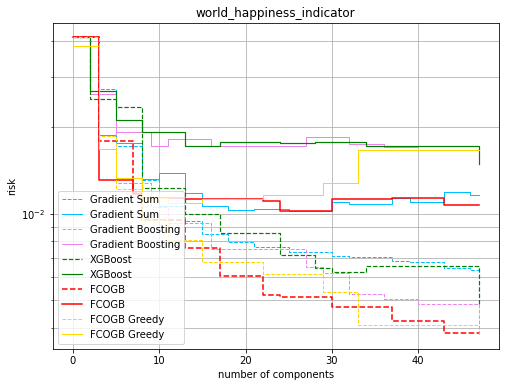

who_life_expectancy mwg_boosting_ 0.026273538086539136 0.027041565865248637
who_life_expectancy gpe_boosting_ 0.02664722503609478 0.02742744827080129
who_life_expectancy xgb_keep_ 0.026782796732494916 0.027551982364354983
who_life_expectancy orth_fc_Newton-CG 0.026043975982923614 0.026924829950948446
who_life_expectancy orth_fc_Newton-CG* 0.025982615986862932 0.02686529542181586


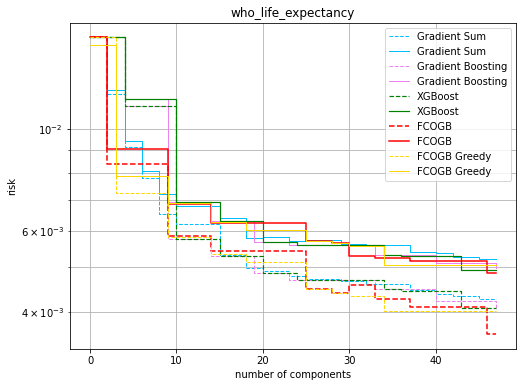

mobile_prices mwg_boosting_ 0.13257993685510153 0.13559297303247317
mobile_prices gpe_boosting_ 0.13304712999719254 0.13686813901482908
mobile_prices xgb_keep_ 0.1376872784329564 0.1431365337851083
mobile_prices orth_fc_Newton-CG 0.12571073367428373 0.13040578548742135
mobile_prices orth_fc_Newton-CG* 0.12210891499002385 0.12699317451078418


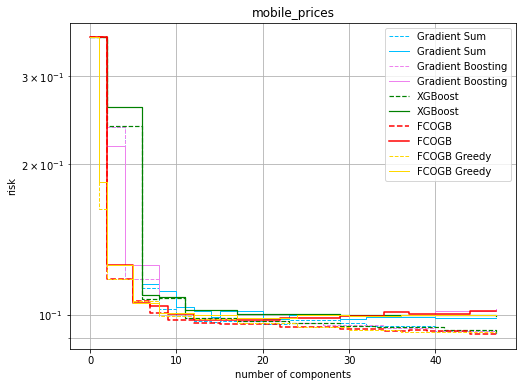

suicide_rates_cleaned mwg_boosting_ 0.5433332600676024 0.522970117789214
suicide_rates_cleaned gpe_boosting_ 0.5416680424660851 0.5235675685106181
suicide_rates_cleaned xgb_keep_ 0.5400639370794189 0.5219184878015031
suicide_rates_cleaned orth_fc_Newton-CG 0.5322348719642774 0.5142482084515034
suicide_rates_cleaned orth_fc_Newton-CG* 0.5401680043535051 0.5197978344805083


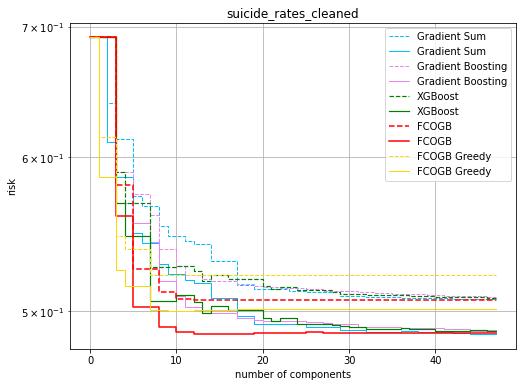

videogamesales mwg_boosting_ 0.9530715657673255 0.7293615593573042
videogamesales gpe_boosting_ 0.9530715231165762 0.7293619658581283
videogamesales xgb_keep_ 0.9530725260296813 0.7293620640760277
videogamesales orth_fc_Newton-CG 0.9530705309287099 0.7293681125996906
videogamesales orth_fc_Newton-CG* 0.9530700087216449 0.7196608385166228


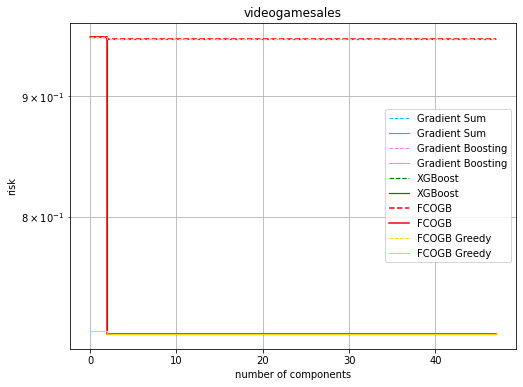

red_wine_quality mwg_boosting_ 0.0347086679267304 0.0355176979323807
red_wine_quality gpe_boosting_ 0.03498812899186714 0.0359592150432491
red_wine_quality xgb_keep_ 0.034986368844777356 0.036026921381247135
red_wine_quality orth_fc_Newton-CG 0.03447040394505016 0.03555991627139192
red_wine_quality orth_fc_Newton-CG* 0.034425780923036095 0.035242502890613404


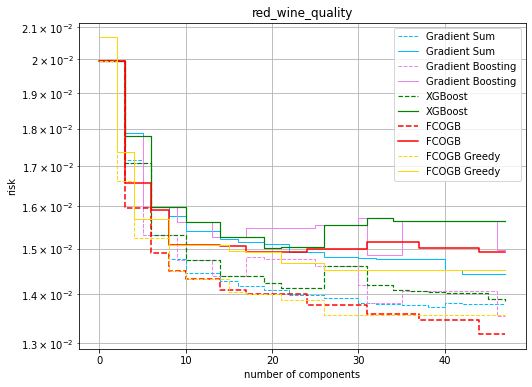

covid_vic mwg_boosting_ 0.13601351655365318 0.1650898497431194
covid_vic gpe_boosting_ 0.10271048745338379 0.08182150122814841
covid_vic xgb_keep_ 0.11449110279936453 0.115486701437201
covid_vic orth_fc_Newton-CG 0.08653760367085947 0.08610425208933482
covid_vic orth_fc_Newton-CG* 0.08024003318398282 0.08793332262962278


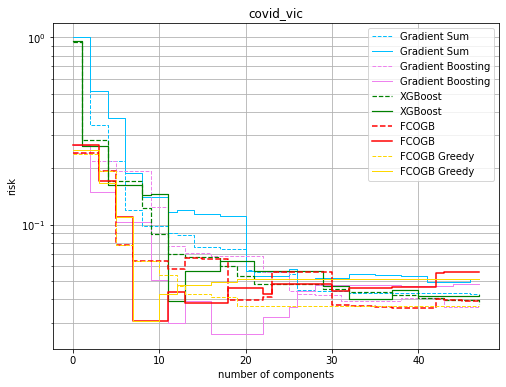

covid mwg_boosting_ 0.3308531575405966 0.44596913207345773
covid gpe_boosting_ 0.3581170847722873 0.3984703289497655
covid xgb_keep_ 0.8884486430417278 0.7356287379855454
covid orth_fc_Newton-CG 0.32098760802215337 0.39537477319316344
covid orth_fc_Newton-CG* 0.34461444190137414 0.41780660326516783


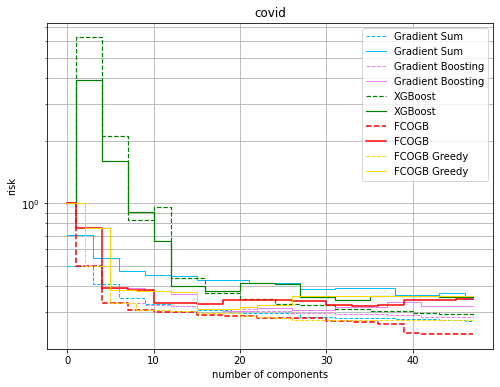

bicycle mwg_boosting_ 0.3031382147392713 0.35348595540375904
bicycle gpe_boosting_ 0.3092339690320938 0.46717564376454324
bicycle xgb_keep_ 0.3232833312649893 0.4458210475527549
bicycle orth_fc_Newton-CG 0.2755197801269648 0.31992746891058843
bicycle orth_fc_Newton-CG* 0.2987837138274845 0.5286737765826012


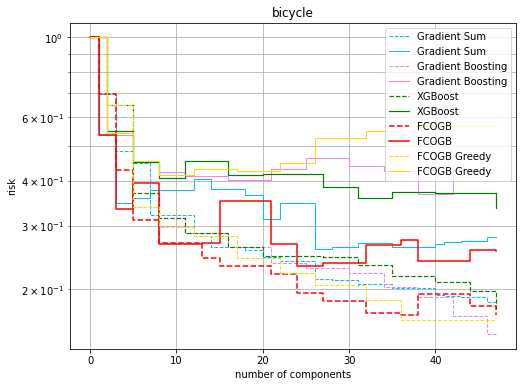

ships mwg_boosting_ 0.15680179240413422 0.18143223034765477
ships gpe_boosting_ 0.16417053332309217 0.18638530597912548
ships xgb_keep_ 1.9453304596803578 4.220828467410165
ships orth_fc_Newton-CG 0.16892416248159875 0.15532160299384065
ships orth_fc_Newton-CG* 0.12719686040994688 0.46083459155584466


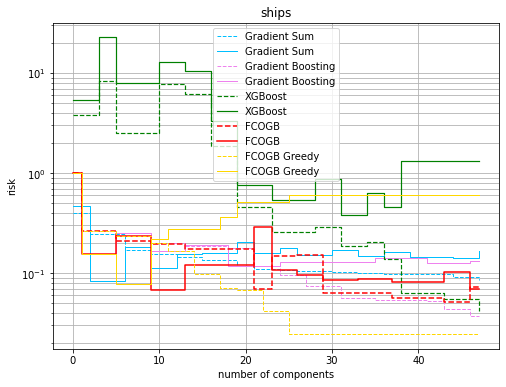

smoking mwg_boosting_ 0.10873251933887586 0.1183542573132161
smoking gpe_boosting_ 0.11049123788585592 0.2346459274326126
smoking xgb_keep_ 0.14612643292845767 0.3081054453865639
smoking orth_fc_Newton-CG 0.07224650748231075 0.08456435984199688
smoking orth_fc_Newton-CG* 0.07914607197837854 0.12173851674448143


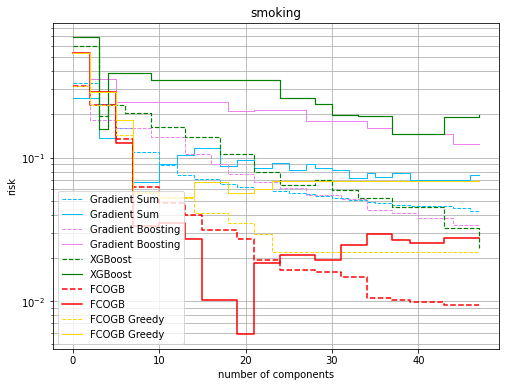

In [52]:
colours = {}
line_width = {}
width = [1,1, 1.2, 1.5]*4
i = 0
colors=['deepskyblue','violet','green','red','gold','blue','cyan','brown','deepskyblue','purple', 'lime',
        'slategray','magenta','pink','olive','khaki']
label_map={'gpe_boosting_':'Gradient Boosting', 'gpe_fc_Newton-CG': 'Gradient Fully-corrective Boosting', 
           'orth_fc_Newton-CG': 'FCOGB', 'xgb_keep_': 'XGBoost', 
          'xgb_fc_Newton-CG': 'XG Fully-corrective Boosting','orth_fc_Newton-CG*':'FCOGB Greedy',
          'mwg_boosting_': 'Gradient Sum'}
for dataset in datasets:
    plt.figure(figsize=(8,6))
    j=0
    for item in algo_names:
        color = colors[j]
        colours[item] = color
        line_width[item] = width[j]
        j+=1
        print(dataset, item, train_datasets[dataset][item][0].mean(), test_datasets[dataset][item][0].mean())
        plt.step(np.array(range(0,48)), 
                 np.array(train_datasets[dataset][item][0])[1:], '--', color=colours[item],
                 label=label_map[item],linewidth=line_width[item],where='post')
        plt.step(np.array(range(0,48)), 
                 np.array(test_datasets[dataset][item][0])[1:], color=colours[item],
                 label=label_map[item],linewidth=line_width[item],where='post')
    plt.title(dataset)
    plt.xlabel('number of components')
    plt.ylabel('risk')
    plt.yscale('log')
    plt.grid(visible=True, which='major')
    plt.grid(visible=True, which='minor')
    plt.gca().set_ylim(bottom=0)
    plt.legend()
    plt.show()

In [53]:
train_datasets_log={}
test_datasets_log={}
j=-1
for dataset in datasets:
    j+=1
    train_datasets_log[dataset]={}
    test_datasets_log[dataset]={}
    for algo in algo_names:
#         print(algo)
        if j==j:
            train_datasets_log[dataset][algo]=[(trains_log[[algo+str(i) for i in range(1, 50)]].iloc[j])]
            test_datasets_log[dataset][algo]=[(tests_log[[algo+str(i) for i in range(1, 50)]].iloc[j])]
        else:
            train_datasets_log[dataset][algo].append(trains_log[[algo+str(i) for i in range(1, 50)]].iloc[j])
            test_datasets_log[dataset][algo].append(tests_log[[algo+str(i) for i in range(1, 50)]].iloc[j])

titanic mwg_boosting_ -0.3901868908844307 -0.2970899644028879
titanic gpe_boosting_ -0.4502926280407045 -0.3527355984534036
titanic xgb_keep_ -0.4540039000602452 -0.3432366965070069
titanic orth_fc_Newton-CG -0.4730946142324082 -0.36788281826254843
titanic orth_fc_Newton-CG* -0.4597586095601338 -0.3451928384750392


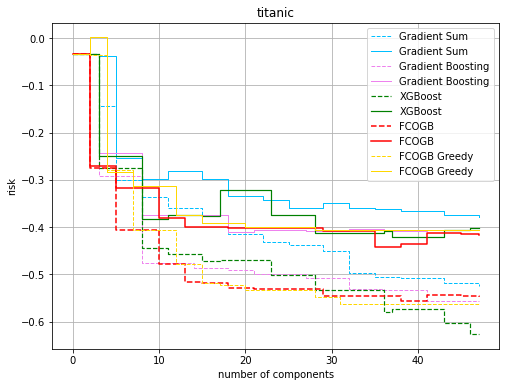

tic-tac-toe mwg_boosting_ -0.6360761736591269 -0.5526675438081751
tic-tac-toe gpe_boosting_ -0.46359432295469855 -0.4000009553456777
tic-tac-toe xgb_keep_ -0.5954584948406949 -0.4949687533652565
tic-tac-toe orth_fc_Newton-CG -0.7611260391579476 -0.6007137991740041
tic-tac-toe orth_fc_Newton-CG* -0.44728752623995194 -0.33520965384948104


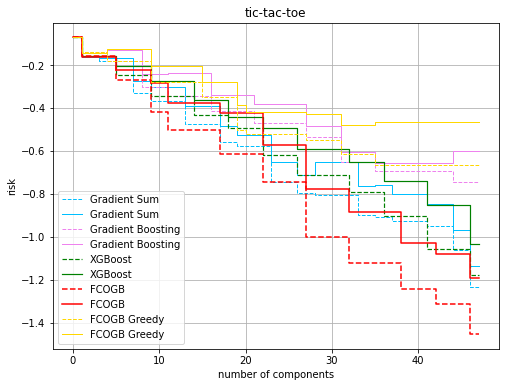

iris mwg_boosting_ -1.5485311098783856 -0.9585470604232466
iris gpe_boosting_ -1.7347104772628352 -0.639840592033154
iris xgb_keep_ -1.629598415897221 -0.9011673108743441
iris orth_fc_Newton-CG -1.6397994042248711 -0.9255395965055218
iris orth_fc_Newton-CG* -2.1471315983813195 -0.6748796671021403


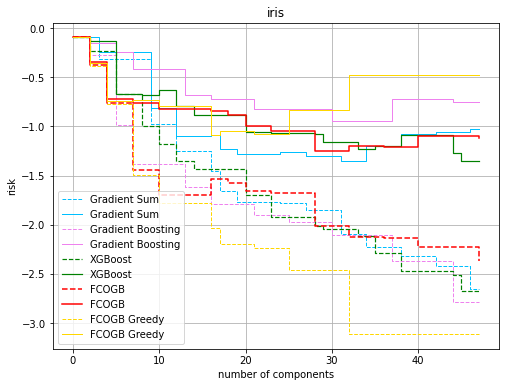

breast_cancer mwg_boosting_ -1.4245508498664614 -1.2938267981622453
breast_cancer gpe_boosting_ -1.2188531008128742 -1.0791228985486419
breast_cancer xgb_keep_ -1.3354359617879994 -1.2074323573318881
breast_cancer orth_fc_Newton-CG -1.3145909156349573 -1.1363502625540527
breast_cancer orth_fc_Newton-CG* -1.3717252055761566 -1.011514410995347


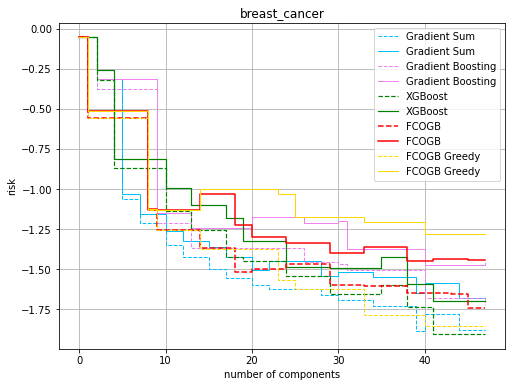

load_wine mwg_boosting_ -2.4599528419364076 -1.2499761836255243
load_wine gpe_boosting_ -1.8943260029634874 -0.8390757587634288
load_wine xgb_keep_ -1.9416167706877256 -0.92710658820536
load_wine orth_fc_Newton-CG -1.9322069351838373 -0.7936571432414995
load_wine orth_fc_Newton-CG* -2.3745189531194377 -0.7711858950660315


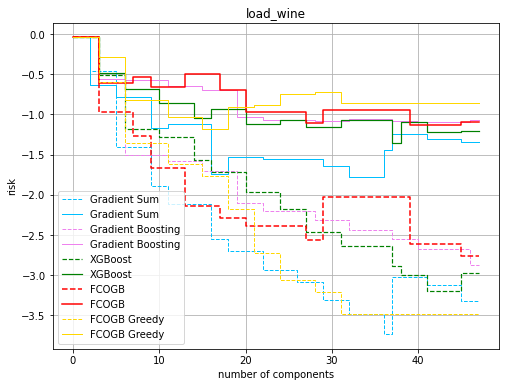

IBM_HR mwg_boosting_ -0.5685558784170689 -0.4877592984147557
IBM_HR gpe_boosting_ -0.5780172981150674 -0.4588106074489561
IBM_HR xgb_keep_ -0.5623578906706881 -0.4622804501481173
IBM_HR orth_fc_Newton-CG -0.5967379227457451 -0.44175218386821885
IBM_HR orth_fc_Newton-CG* -0.5873334890897793 -0.43044770495196527


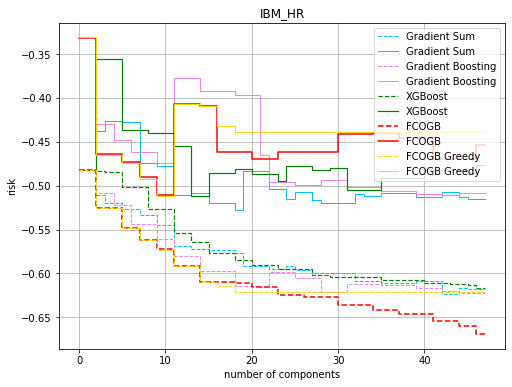

telco_churn mwg_boosting_ -0.390779863913812 -0.41604070822814465
telco_churn gpe_boosting_ -0.39656233337059793 -0.3993837794241408
telco_churn xgb_keep_ -0.3929914744789176 -0.40840746375956366
telco_churn orth_fc_Newton-CG -0.3816205637017259 -0.38635869606084444
telco_churn orth_fc_Newton-CG* -0.41253764466588033 -0.434093827770482


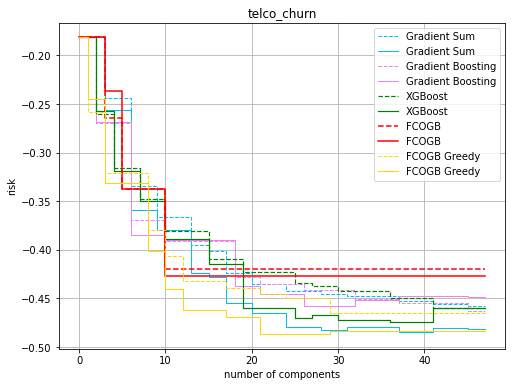

GenderRecognition mwg_boosting_ -1.585508834064357 -1.5291833239237123
GenderRecognition gpe_boosting_ -1.6268194720930838 -1.4873412614803312
GenderRecognition xgb_keep_ -1.4861872412303572 -1.4214982994285539
GenderRecognition orth_fc_Newton-CG -1.6388899591411237 -1.5209653709540212
GenderRecognition orth_fc_Newton-CG* -1.6388899591411237 -1.5209653709540212


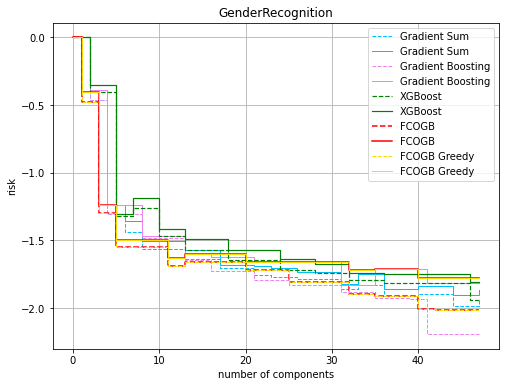

banknote mwg_boosting_ -1.3420957606901065 -1.312428936915673
banknote gpe_boosting_ -1.453497981836039 -1.4215540526036798
banknote xgb_keep_ -1.2915687001103575 -1.2289260347276953
banknote orth_fc_Newton-CG -1.5821300209263738 -1.5901235805749412
banknote orth_fc_Newton-CG* -1.6801342579365175 -1.7068471588304757


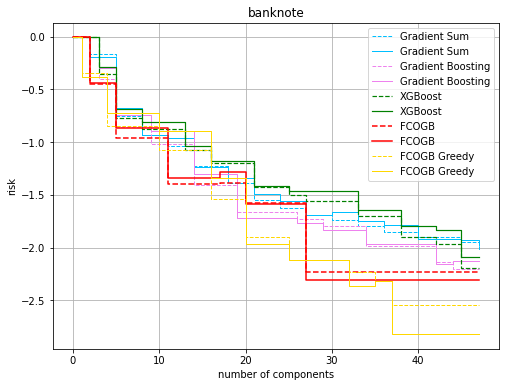

liver mwg_boosting_ -0.1971251474314607 -0.1376375896856981
liver gpe_boosting_ -0.20505261980085393 -0.11048289619522561
liver xgb_keep_ -0.20989788313918847 -0.14221805938251628
liver orth_fc_Newton-CG -0.15997111776253273 -0.08035043990805266
liver orth_fc_Newton-CG* -0.22371394356989494 -0.06385219078448558


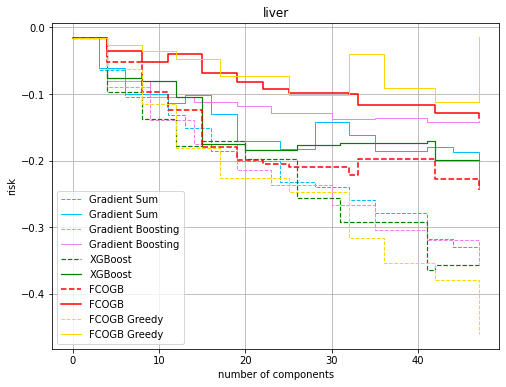

magic mwg_boosting_ -0.31397909710340066 -0.3391212970252477
magic gpe_boosting_ -0.33493720925689946 -0.36399842982361175
magic xgb_keep_ -0.3284271944162674 -0.3493266597272153
magic orth_fc_Newton-CG -0.30347553553755935 -0.3458909395610863
magic orth_fc_Newton-CG* -0.34846089017556303 -0.3766145029145302


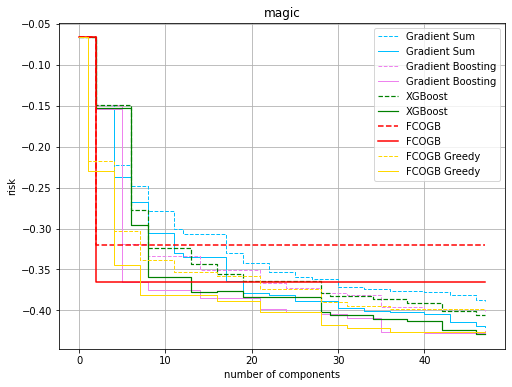

adult mwg_boosting_ -0.5267731952921207 -0.511792497728098
adult gpe_boosting_ -0.5139732335685503 -0.4911699697024275
adult xgb_keep_ -0.5363867553064149 -0.5141854619890817
adult orth_fc_Newton-CG -0.5612885903730344 -0.536851904010361
adult orth_fc_Newton-CG* -0.559253488299626 -0.533574176192567


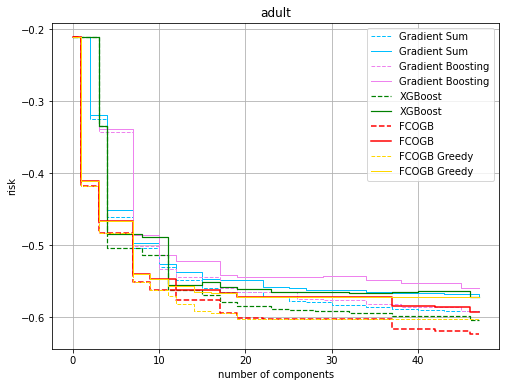

digits5 mwg_boosting_ -1.1396252839534808 -1.1409617454411425
digits5 gpe_boosting_ -1.191392672512894 -1.178421769654479
digits5 xgb_keep_ -1.0880451944669036 -1.0909885213954151
digits5 orth_fc_Newton-CG -1.1917249912439543 -1.1792172656320183
digits5 orth_fc_Newton-CG* -1.1414332103169584 -1.1660331694223993


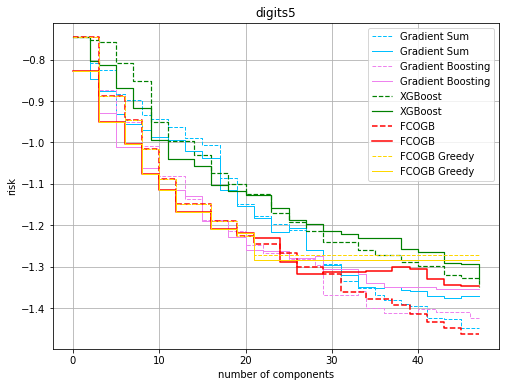

insurance mwg_boosting_ -2.262962665106514 -2.230114023965483
insurance gpe_boosting_ -2.2711990283676116 -2.237111289152454
insurance xgb_keep_ -2.2480471160142876 -2.216882621351783
insurance orth_fc_Newton-CG -2.4159365188672584 -2.3751108132773777
insurance orth_fc_Newton-CG* -2.3749485520305846 -2.3018663357979854


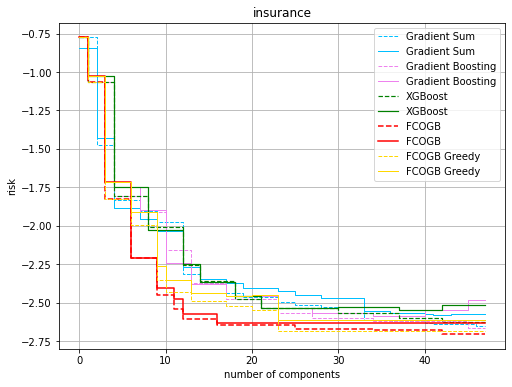

make_friedman1 mwg_boosting_ -2.9639658861919047 -2.921055306296836
make_friedman1 gpe_boosting_ -2.900527565381587 -2.809806247861748
make_friedman1 xgb_keep_ -2.940048501599868 -2.8369801084786106
make_friedman1 orth_fc_Newton-CG -3.0173135763999235 -2.912592780880955
make_friedman1 orth_fc_Newton-CG* -3.0085376880939996 -2.9292453871052246


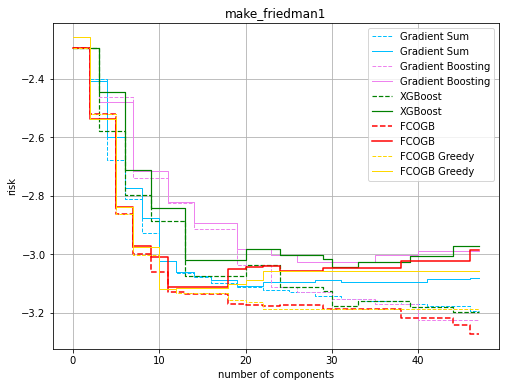

make_friedman2 mwg_boosting_ -3.059584466570118 -3.0427884374170464
make_friedman2 gpe_boosting_ -2.9859157219985835 -2.9647023143103235
make_friedman2 xgb_keep_ -2.7853160704644537 -2.7945509659526726
make_friedman2 orth_fc_Newton-CG -3.342499095339787 -3.3507377327227554
make_friedman2 orth_fc_Newton-CG* -3.2695875831051473 -3.2899741395333857


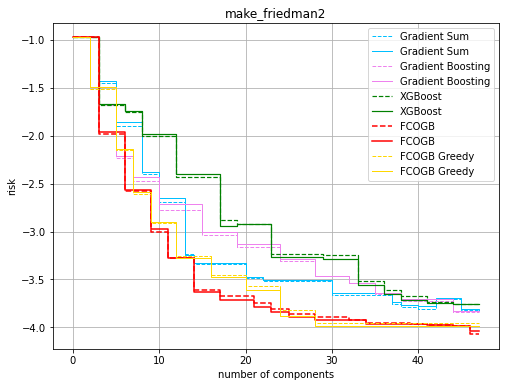

make_friedman3 mwg_boosting_ -3.5984052619690217 -3.4815292647470337
make_friedman3 gpe_boosting_ -3.787062706912111 -3.5956460372244052
make_friedman3 xgb_keep_ -3.7699926884164894 -3.5811447427789362
make_friedman3 orth_fc_Newton-CG -3.8195711647653865 -3.6445686587857398
make_friedman3 orth_fc_Newton-CG* -3.8281940460185395 -3.64331339358189


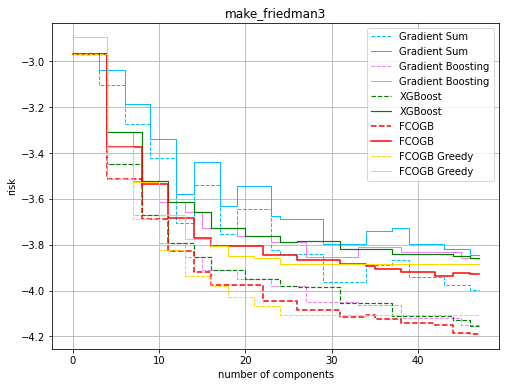

wage mwg_boosting_ -1.0145883185582465 -1.0483436482845612
wage gpe_boosting_ -1.0397938542820087 -0.9172598798755105
wage xgb_keep_ -1.0473321058088847 -0.9001848531247958
wage orth_fc_Newton-CG -1.0799511107055932 -1.0201978253250146
wage orth_fc_Newton-CG* -1.0715211151206665 -1.0180141527249102


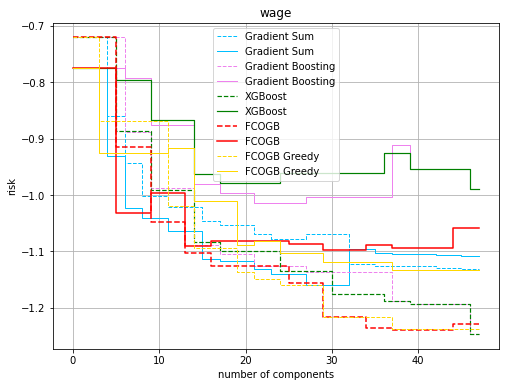

Demographics mwg_boosting_ -1.5856460469533304 -1.5765467775137127
Demographics gpe_boosting_ -1.5890521897645822 -1.5738204004747176
Demographics xgb_keep_ -1.586611582399624 -1.5723465448909226
Demographics orth_fc_Newton-CG -1.5974039780743106 -1.5865985311111048
Demographics orth_fc_Newton-CG* -1.5967646944431133 -1.5864947984258986


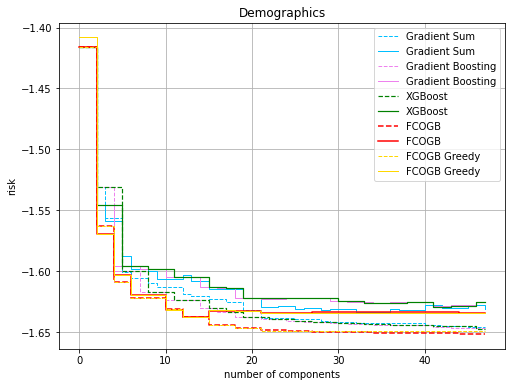

gdp mwg_boosting_ -5.269260008631042 -4.9591037652666525
gdp gpe_boosting_ -5.326776681416401 -4.95924934607469
gdp xgb_keep_ -5.3110998076833225 -4.958176593948063
gdp orth_fc_Newton-CG -5.359902151846971 -4.919835955242258
gdp orth_fc_Newton-CG* -5.327950114257647 -4.908231578220573


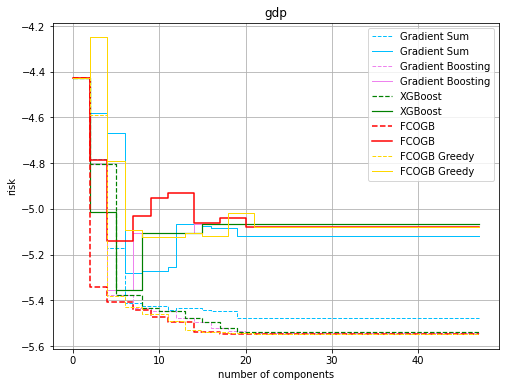

used_cars mwg_boosting_ -2.3408781486491446 -2.3969824702294606
used_cars gpe_boosting_ -2.351187633319438 -2.279293120562114
used_cars xgb_keep_ -2.0501909536971685 -1.9635563853288311
used_cars orth_fc_Newton-CG -2.6227998584419385 -2.5007531680054305
used_cars orth_fc_Newton-CG* -2.5689007410699563 -2.466265486503255


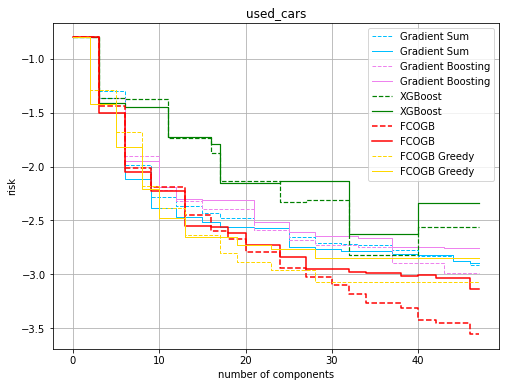

load_diabetes mwg_boosting_ -2.0827465709571675 -2.064236005802497
load_diabetes gpe_boosting_ -2.0729320076593805 -2.0685824721339134
load_diabetes xgb_keep_ -2.0679134462652646 -2.0576612167231154
load_diabetes orth_fc_Newton-CG -2.113866334722168 -2.0405778923813225
load_diabetes orth_fc_Newton-CG* -2.1309489392068373 -2.103520764630609


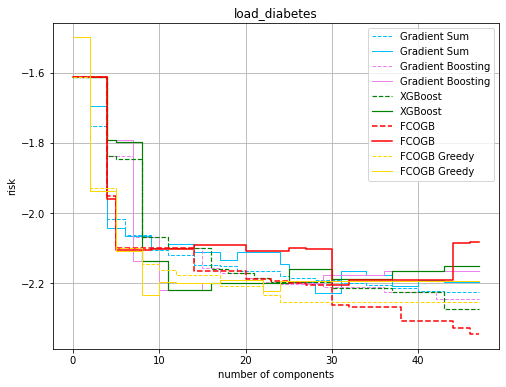

boston mwg_boosting_ -2.670408585519808 -2.7730233797138664
boston gpe_boosting_ -2.7029433155005864 -2.625513304896225
boston xgb_keep_ -2.6698878446479912 -2.596190379773775
boston orth_fc_Newton-CG -2.774568969449101 -2.639824892955898
boston orth_fc_Newton-CG* -2.778332451249639 -2.628047327652869


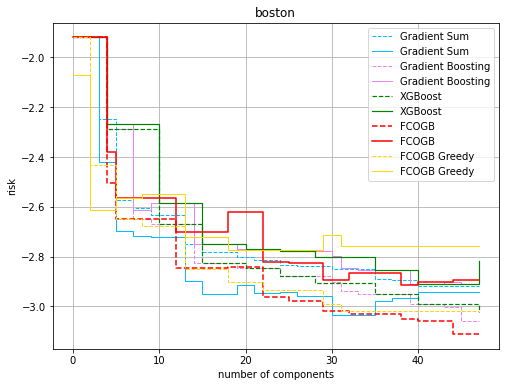

world_happiness_indicator mwg_boosting_ -4.557450464946393 -4.274621414486211
world_happiness_indicator gpe_boosting_ -4.722968204468469 -3.8982266451625565
world_happiness_indicator xgb_keep_ -4.556678518926355 -3.8857046890269378
world_happiness_indicator orth_fc_Newton-CG -4.872737535114738 -4.3177746933562045
world_happiness_indicator orth_fc_Newton-CG* -4.857133736427031 -4.1629770053083925


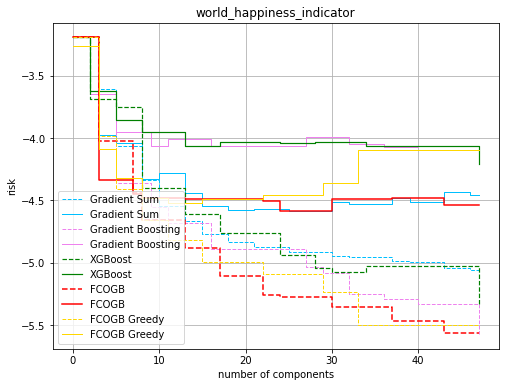

who_life_expectancy mwg_boosting_ -5.0799469388795835 -4.936662086210332
who_life_expectancy gpe_boosting_ -5.053789442060531 -4.9090195647230495
who_life_expectancy xgb_keep_ -5.0355530679771965 -4.893947867863925
who_life_expectancy orth_fc_Newton-CG -5.116149355032171 -4.9515268678888384
who_life_expectancy orth_fc_Newton-CG* -5.135700634429786 -4.962715598906038


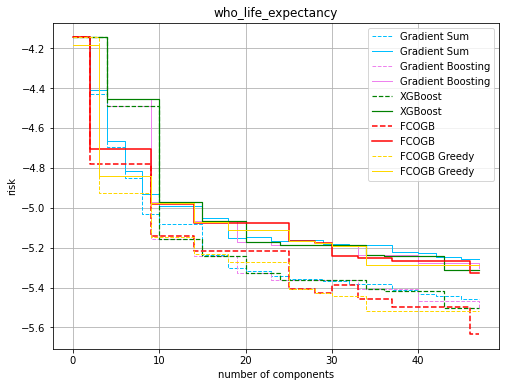

mobile_prices mwg_boosting_ -2.1894291368832532 -2.1548924525896647
mobile_prices gpe_boosting_ -2.1852976149843246 -2.142826972757291
mobile_prices xgb_keep_ -2.158865024541833 -2.1145016794557283
mobile_prices orth_fc_Newton-CG -2.2379726453116695 -2.1905604636675435
mobile_prices orth_fc_Newton-CG* -2.2501420009449986 -2.2026418091294064


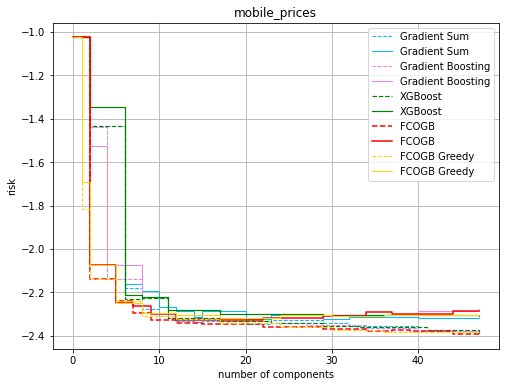

suicide_rates_cleaned mwg_boosting_ -0.6179707709732402 -0.6573395586618869
suicide_rates_cleaned gpe_boosting_ -0.6212075315053099 -0.6566455447609193
suicide_rates_cleaned xgb_keep_ -0.6240985656621553 -0.6597083873110413
suicide_rates_cleaned orth_fc_Newton-CG -0.6391627613937456 -0.6750364134997742
suicide_rates_cleaned orth_fc_Newton-CG* -0.6222199845829336 -0.6616061341174798


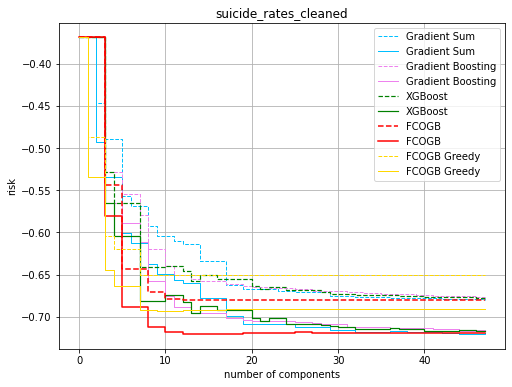

videogamesales mwg_boosting_ -0.04808978455897597 -0.3185380210760829
videogamesales gpe_boosting_ -0.04808982935819361 -0.3185374515489995
videogamesales xgb_keep_ -0.04808877595549822 -0.3185373141473045
videogamesales orth_fc_Newton-CG -0.048090871494675426 -0.3185288393985209
videogamesales orth_fc_Newton-CG* -0.0480914200059737 -0.33024385669702644


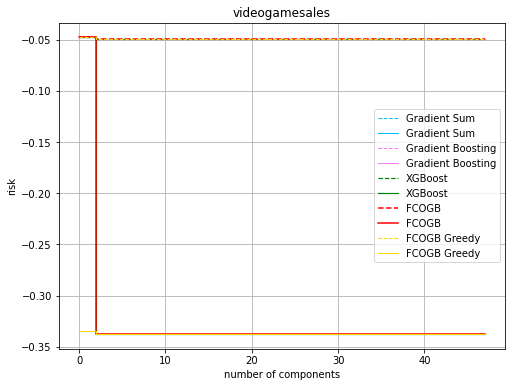

red_wine_quality mwg_boosting_ -4.1453838905227 -4.090073217789972
red_wine_quality gpe_boosting_ -4.125823672033637 -4.0608874053686135
red_wine_quality xgb_keep_ -4.126134419799118 -4.056705810941122
red_wine_quality orth_fc_Newton-CG -4.162086513801538 -4.086625474560647
red_wine_quality orth_fc_Newton-CG* -4.164032571843629 -4.107796549296649


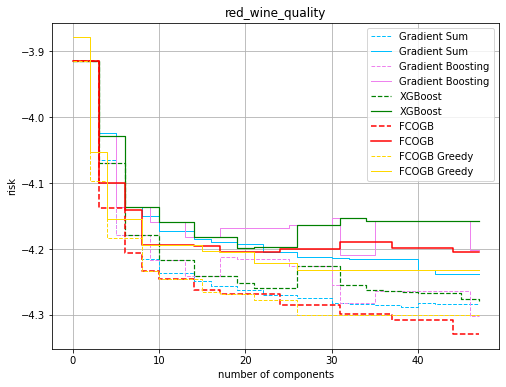

covid_vic mwg_boosting_ -2.5598868427454633 -2.334991634777023
covid_vic gpe_boosting_ -2.652523371227894 -2.9110108732933972
covid_vic xgb_keep_ -2.6491326314403203 -2.6310598223686945
covid_vic orth_fc_Newton-CG -2.821928370712995 -2.84314782709204
covid_vic orth_fc_Newton-CG* -2.9487844327009833 -2.7800998690657543


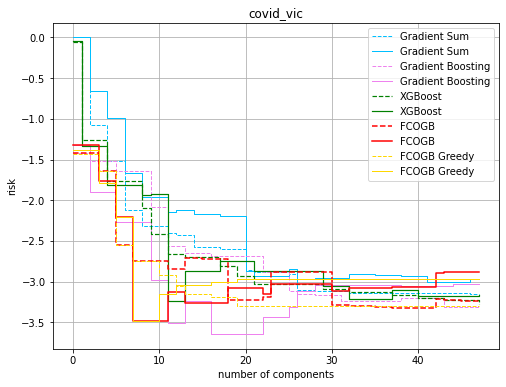

covid mwg_boosting_ -1.1395185389342717 -0.8317496306781326
covid gpe_boosting_ -1.0902370005736635 -0.9898029321301266
covid xgb_keep_ -0.6668179100115537 -0.6358162206876723
covid orth_fc_Newton-CG -1.1965459458967609 -0.9792705206446521
covid orth_fc_Newton-CG* -1.136210826646415 -0.9318235317038968


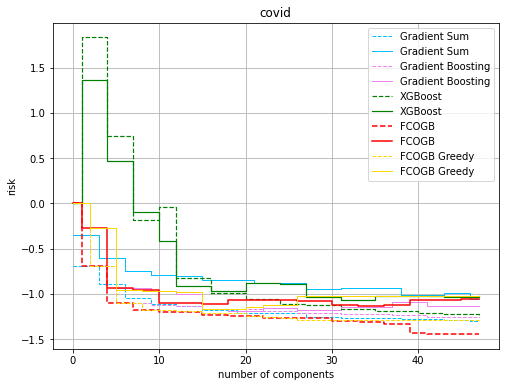

bicycle mwg_boosting_ -1.305124387676484 -1.0936048428049392
bicycle gpe_boosting_ -1.3082930269975641 -0.7902519919326789
bicycle xgb_keep_ -1.2446454304546282 -0.8440355575292517
bicycle orth_fc_Newton-CG -1.4122752232383806 -1.2065214781218598
bicycle orth_fc_Newton-CG* -1.358812236476337 -0.6616560798277896


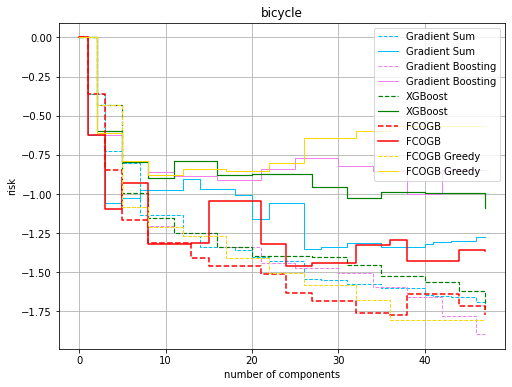

ships mwg_boosting_ -2.009416777291978 -1.8252350662512975
ships gpe_boosting_ -2.1627401767359786 -1.831924558175974
ships xgb_keep_ -0.5720262819858031 0.6663049326547963
ships orth_fc_Newton-CG -2.0830283515383825 -2.122444729248033
ships orth_fc_Newton-CG* -2.749025096236947 -0.9456719729597651


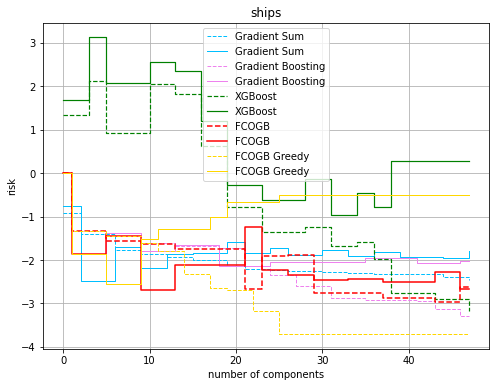

smoking mwg_boosting_ -2.570422124898169 -2.326638776646171
smoking gpe_boosting_ -2.538120846470374 -1.547617017187241
smoking xgb_keep_ -2.348722697658438 -1.2854366577279903
smoking orth_fc_Newton-CG -3.543996495211818 -3.389123870116007
smoking orth_fc_Newton-CG* -3.1846545320129205 -2.4596649619105864


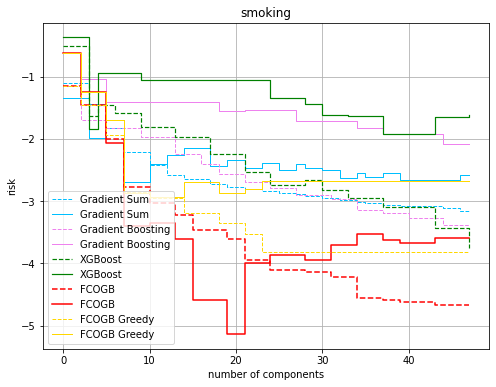

In [54]:
colours = {}
line_width = {}
width = [1,1, 1.2, 1.5]*4
i = 0
colors=['deepskyblue','violet','green','red','gold','blue','cyan','brown','deepskyblue','purple', 'lime',
        'slategray','magenta','pink','olive','khaki']
label_map={'gpe_boosting_':'Gradient Boosting', 'gpe_fc_Newton-CG': 'Gradient Fully-corrective Boosting', 
           'orth_fc_Newton-CG': 'FCOGB', 'xgb_keep_': 'XGBoost', 
          'xgb_fc_Newton-CG': 'XG Fully-corrective Boosting','orth_fc_Newton-CG*':'FCOGB Greedy',
          'mwg_boosting_': 'Gradient Sum'}
for dataset in datasets:
    plt.figure(figsize=(8,6))
    j=0
    for item in algo_names:
        color = colors[j]
        colours[item] = color
        line_width[item] = width[j]
        j+=1
        print(dataset, item, train_datasets_log[dataset][item][0].mean(), test_datasets_log[dataset][item][0].mean())
        plt.step(np.array(range(0,48)), 
                 np.array(train_datasets_log[dataset][item][0])[1:], '--', color=colours[item],
                 label=label_map[item],linewidth=line_width[item],where='post')
        plt.step(np.array(range(0,48)), 
                 np.array(test_datasets_log[dataset][item][0])[1:], color=colours[item],
                 label=label_map[item],linewidth=line_width[item],where='post')
    plt.title(dataset)
    plt.xlabel('number of components')
    plt.ylabel('risk')
#     plt.yscale('log')
    plt.grid(visible=True, which='major')
    plt.grid(visible=True, which='minor')
#     plt.gca().set_ylim(bottom=0)
    plt.legend()
    plt.show()

#### Compare Running Time

In [55]:
time_csv = pd.read_csv('./RunningTime.csv')
time_csv

,dataset,SIRUS,GS,GB,XGBoost,FCOGB,Naive
0,titanic,7.077,2.624,9.858,10.210,25.710,70.916894
1,tic-tac-toe,12.590,3.971,10.340,6.090,13.990,46.035966
2,iris,11.020,0.775,1.099,1.453,2.487,3.506688
3,breast,11.480,6.744,74.430,74.830,239.200,610.282377
4,wine,9.456,1.530,4.432,2.154,55.183,222.606525
5,ibm hr,11.150,17.240,10.990,12.920,12.030,16.550572
6,telco,50.830,40.010,1883.000,1485.000,3039.000,71225.133640
7,gender,22.420,22.730,25.490,24.270,32.950,3412.051806
8,banknote,8.933,6.298,5.648,7.060,8.444,53.555622
9,liver,9.734,1.997,99.720,124.100,193.900,537.034664


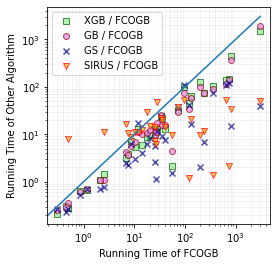

In [56]:
plt.figure(figsize=(4,4))
plt.plot((0,3039),(0,3039))
plt.scatter(time_csv[['FCOGB']], time_csv[['XGBoost']], c='lightgreen', edgecolor='darkgreen', marker='s', label='XGB / FCOGB', alpha=0.7)
plt.scatter(time_csv[['FCOGB']], time_csv[['GB']], c='violet', edgecolor='darkred', marker='o', label='GB / FCOGB', alpha=0.7)
plt.scatter(time_csv[['FCOGB']], time_csv[['GS']], c='darkblue', marker='x', label='GS / FCOGB', alpha=0.7)
plt.scatter(time_csv[['FCOGB']], time_csv[['SIRUS']], c='orange', edgecolor='red', marker='v', label='SIRUS / FCOGB', alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Running Time of FCOGB')
plt.ylabel('Running Time of Other Algorithm')
plt.legend()
plt.grid(which='minor', alpha=0.2)
# plt.show()
plt.savefig('running time.pdf', bbox_inches='tight',pad_inches=0.01)

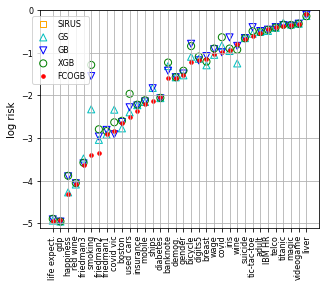

In [57]:
fig = plt.figure(figsize=(4,4))
gs = GridSpec(nrows=1, ncols=1)
ax0 = fig.add_subplot(gs[0, 0])
rot_angle = 90
df2=pd_train_log_dataset.sort_values(by='orth_fc_Newton-CG').reset_index().drop('index', axis=1)
df3=pd_test_log_dataset.sort_values(by='orth_fc_Newton-CG').reset_index().drop('index', axis=1)
plt.scatter([0],[1],c='none', edgecolors='orange', label='SIRUS', marker='s')
ax1=df3.plot.scatter(x='dataset', y='mwg_boosting_', marker='^', c='none', edgecolors='c',s=50,logy=False, ax=ax0, grid=True, 
                     figsize=(5,4), 
                    label='GS', legend=True, xlabel='', ylabel='log risk', rot=rot_angle, ylim=(-5.1, 0))
ax2=df3.plot.scatter(x='dataset', y='gpe_boosting_', marker='v',s=50,c='none', edgecolors='b', ax=ax0, grid=True, label='GB',
                   xlabel='', ylabel='log risk', rot=rot_angle)
ax3=df3.plot.scatter(x='dataset', y='xgb_keep_', marker='o',s=50,c='none', edgecolors='g', ax=ax0, grid=True, label='XGB',
                   xlabel='', ylabel='log risk', rot=rot_angle)
ax4=df3.plot.scatter(x='dataset', y='orth_fc_Newton-CG', marker='.',s=50, ax=ax0, c='r', grid=True, label='FCOGB',
                   xlabel='', ylabel='log risk', rot=rot_angle)

# ax5=df2.plot.scatter(x='dataset', y='mwg_boosting_', marker='o',s=80,c='none', edgecolors='c',  grid=True, ylabel='log risk', ax=ax1,rot=90)
# ax6=df2.plot.scatter(x='dataset', y='gpe_boosting_', marker='v',s=80,ax=ax0, c='none', edgecolors='b',ylabel='log risk',  grid=True, rot=90)
# ax7=df2.plot.scatter(x='dataset', y='xgb_keep_', marker='s',s=80,ax=ax0, c='none', edgecolors='g',ylabel='log risk',  grid=True,rot=90)
# ax8=df2.plot.scatter(x='dataset', y='orth_fc_Newton-CG', marker='^',s=80, ax=ax0, c='none', edgecolors='r', ylabel='log risk', grid=True,rot=90)
# plt.scatter((1,2),(1,2), marker='o', c='none', edgecolors='k', label='train')
# plt.scatter((1,2),(1,2), marker='o', c='k', label='test')
ax1.legend(bbox_to_anchor=(0.19,0.99), prop = { "size": 8 })
ax1.grid(which='minor', alpha=0.3)
ax1.tick_params(labelsize=8)
# ax3 = fig.add_axes([0.55, 0.22, 0.32, 0.4])
# # plt.figure(figsize=(4,4))
# # ax3.plot((0,3039),(0,3039),'k')
# ax3.scatter(time_csv[['FCOGB']], time_csv[['XGBoost']], c='none', edgecolors='g', marker='o', label='XGB', alpha=1)
# # ax3.scatter(time_csv[['FCOGB']], time_csv[['GB']], c='none', edgecolors='b', marker='v', label='GB', alpha=1)
# # ax3.scatter(time_csv[['FCOGB']], time_csv[['GS']], c='none', edgecolors='c', marker='^', label='GS', alpha=1)
# # ax3.scatter(time_csv[['FCOGB']], time_csv[['SIRUS']], c='none', edgecolors='orange', marker='s', label='SIRUS', alpha=1)
# ax3.scatter(time_csv[['FCOGB']], time_csv[['FCOGB']], c='r', marker='.')
# ax3.xaxis.set_label_coords(.5,.1)
# ax3.yaxis.set_label_coords(.1,.5)
# ax3.set_xscale('log')
# ax3.set_yscale('log')
# ax3.set_xlabel('$T_{FCOGB}$')
# ax3.set_ylabel('$T_{Other}$')
# # ax3.legend()
# ax3.grid(which='minor', alpha=0.3)
# ax3.grid(which='major', alpha=1)
plt.savefig('all_datasets_order_log.pdf', bbox_inches='tight',pad_inches=0.01)

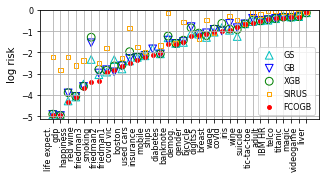

In [58]:
fig = plt.figure(figsize=(5,2))
gs = GridSpec(nrows=1, ncols=1)
ax0 = fig.add_subplot(gs[0, 0])
rot_angle = 90
df2=pd_train_log_dataset.sort_values(by='orth_fc_Newton-CG').reset_index().drop('index', axis=1)
df3=pd_test_log_dataset.sort_values(by='orth_fc_Newton-CG').reset_index().drop('index', axis=1)
ax1=df3.plot.scatter(x='dataset', y='mwg_boosting_', marker='^', c='none', edgecolors='c',s=60,logy=False, ax=ax0, 
                     grid=True, 
                     figsize=(5,2), 
                    label='GS', legend=True, xlabel='', ylabel='log risk', rot=rot_angle, ylim=(-5.1, 0))
ax2=df3.plot.scatter(x='dataset', y='gpe_boosting_', marker='v',s=60,c='none', edgecolors='b', ax=ax0, 
                     grid=True, label='GB',
                   xlabel='', ylabel='log risk', rot=rot_angle)
ax3=df3.plot.scatter(x='dataset', y='xgb_keep_', marker='o',s=60,c='none', edgecolors='g', ax=ax0, 
                     grid=True, label='XGB',
                   xlabel='', ylabel='log risk', rot=rot_angle)
df3.plot.scatter(x='dataset', y='sirus', c='none', edgecolors='orange', label='SIRUS', grid=True, marker='s',
                 ax=ax0, xlabel='', ylabel='log risk', rot=rot_angle)
ax4=df3.plot.scatter(x='dataset', y='orth_fc_Newton-CG', marker='.',s=60, ax=ax0, c='r', 
                     grid=True, label='FCOGB',
                   xlabel='', ylabel='log risk', rot=rot_angle)

plt.xticks(rotation=90, ha='right', fontsize=8)
# ax5=df2.plot.scatter(x='dataset', y='mwg_boosting_', marker='o',s=80,c='none', edgecolors='c',  grid=True, ylabel='log risk', ax=ax1,rot=90)
# ax6=df2.plot.scatter(x='dataset', y='gpe_boosting_', marker='v',s=80,ax=ax0, c='none', edgecolors='b',ylabel='log risk',  grid=True, rot=90)
# ax7=df2.plot.scatter(x='dataset', y='xgb_keep_', marker='s',s=80,ax=ax0, c='none', edgecolors='g',ylabel='log risk',  grid=True,rot=90)
# ax8=df2.plot.scatter(x='dataset', y='orth_fc_Newton-CG', marker='^',s=80, ax=ax0, c='none', edgecolors='r', ylabel='log risk', grid=True,rot=90)
# plt.scatter((1,2),(1,2), marker='o', c='none', edgecolors='k', label='train')
# plt.scatter((1,2),(1,2), marker='o', c='k', label='test')
ax1.legend(prop = { "size": 8 })
ax1.grid(which='minor', alpha=0.3)
ax1.tick_params(labelsize=8)
# ax3 = fig.add_axes([0.55, 0.22, 0.32, 0.4])
# # plt.figure(figsize=(4,4))
# # ax3.plot((0,3039),(0,3039),'k')
# ax3.scatter(time_csv[['FCOGB']], time_csv[['XGBoost']], c='none', edgecolors='g', marker='o', label='XGB', alpha=1)
# # ax3.scatter(time_csv[['FCOGB']], time_csv[['GB']], c='none', edgecolors='b', marker='v', label='GB', alpha=1)
# # ax3.scatter(time_csv[['FCOGB']], time_csv[['GS']], c='none', edgecolors='c', marker='^', label='GS', alpha=1)
# # ax3.scatter(time_csv[['FCOGB']], time_csv[['SIRUS']], c='none', edgecolors='orange', marker='s', label='SIRUS', alpha=1)
# ax3.scatter(time_csv[['FCOGB']], time_csv[['FCOGB']], c='r', marker='.')
# ax3.xaxis.set_label_coords(.5,.1)
# ax3.yaxis.set_label_coords(.1,.5)
# ax3.set_xscale('log')
# ax3.set_yscale('log')
# ax3.set_xlabel('$T_{FCOGB}$')
# ax3.set_ylabel('$T_{Other}$')
# # ax3.legend()
# ax3.grid(which='minor', alpha=0.3)
# ax3.grid(which='major', alpha=1)
plt.savefig('all_datasets_order_log.pdf', bbox_inches='tight',pad_inches=0.01)

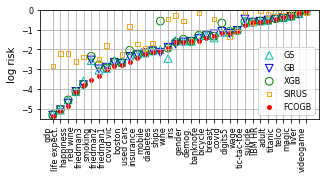

In [59]:
fig = plt.figure(figsize=(5,2))
gs = GridSpec(nrows=1, ncols=1)
ax0 = fig.add_subplot(gs[0, 0])
rot_angle = 90
df2=pd_train_log_dataset.sort_values(by='orth_fc_Newton-CG').reset_index().drop('index', axis=1)
df3=pd_test_log_dataset.sort_values(by='orth_fc_Newton-CG').reset_index().drop('index', axis=1)
ax1=df2.plot.scatter(x='dataset', y='mwg_boosting_', marker='^', c='none', edgecolors='c',s=60,logy=False, ax=ax0, 
                     grid=True, 
                     figsize=(5,2), 
                    label='GS', legend=True, xlabel='', ylabel='log risk', rot=rot_angle, ylim=(-5.5, 0))
ax2=df2.plot.scatter(x='dataset', y='gpe_boosting_', marker='v',s=60,c='none', edgecolors='b', ax=ax0, 
                     grid=True, label='GB',
                   xlabel='', ylabel='log risk', rot=rot_angle)
ax3=df2.plot.scatter(x='dataset', y='xgb_keep_', marker='o',s=60,c='none', edgecolors='g', ax=ax0, 
                     grid=True, label='XGB',
                   xlabel='', ylabel='log risk', rot=rot_angle)
df2.plot.scatter(x='dataset', y='sirus', c='none', edgecolors='orange', label='SIRUS', grid=True, marker='s',
                 ax=ax0, xlabel='', ylabel='log risk', rot=rot_angle)
ax4=df2.plot.scatter(x='dataset', y='orth_fc_Newton-CG', marker='.',s=60, ax=ax0, c='r', 
                     grid=True, label='FCOGB',
                   xlabel='', ylabel='log risk', rot=rot_angle)

plt.xticks(rotation=90, ha='right', fontsize=8)
# ax5=df2.plot.scatter(x='dataset', y='mwg_boosting_', marker='o',s=80,c='none', edgecolors='c',  grid=True, ylabel='log risk', ax=ax1,rot=90)
# ax6=df2.plot.scatter(x='dataset', y='gpe_boosting_', marker='v',s=80,ax=ax0, c='none', edgecolors='b',ylabel='log risk',  grid=True, rot=90)
# ax7=df2.plot.scatter(x='dataset', y='xgb_keep_', marker='s',s=80,ax=ax0, c='none', edgecolors='g',ylabel='log risk',  grid=True,rot=90)
# ax8=df2.plot.scatter(x='dataset', y='orth_fc_Newton-CG', marker='^',s=80, ax=ax0, c='none', edgecolors='r', ylabel='log risk', grid=True,rot=90)
# plt.scatter((1,2),(1,2), marker='o', c='none', edgecolors='k', label='train')
# plt.scatter((1,2),(1,2), marker='o', c='k', label='test')
ax1.legend(prop = { "size": 8 })
ax1.grid(which='minor', alpha=0.3)
ax1.tick_params(labelsize=8)
# ax3 = fig.add_axes([0.55, 0.22, 0.32, 0.4])
# # plt.figure(figsize=(4,4))
# # ax3.plot((0,3039),(0,3039),'k')
# ax3.scatter(time_csv[['FCOGB']], time_csv[['XGBoost']], c='none', edgecolors='g', marker='o', label='XGB', alpha=1)
# # ax3.scatter(time_csv[['FCOGB']], time_csv[['GB']], c='none', edgecolors='b', marker='v', label='GB', alpha=1)
# # ax3.scatter(time_csv[['FCOGB']], time_csv[['GS']], c='none', edgecolors='c', marker='^', label='GS', alpha=1)
# # ax3.scatter(time_csv[['FCOGB']], time_csv[['SIRUS']], c='none', edgecolors='orange', marker='s', label='SIRUS', alpha=1)
# ax3.scatter(time_csv[['FCOGB']], time_csv[['FCOGB']], c='r', marker='.')
# ax3.xaxis.set_label_coords(.5,.1)
# ax3.yaxis.set_label_coords(.1,.5)
# ax3.set_xscale('log')
# ax3.set_yscale('log')
# ax3.set_xlabel('$T_{FCOGB}$')
# ax3.set_ylabel('$T_{Other}$')
# # ax3.legend()
# ax3.grid(which='minor', alpha=0.3)
# ax3.grid(which='major', alpha=1)
plt.savefig('all_datasets_order_log_train.pdf', bbox_inches='tight',pad_inches=0.01)

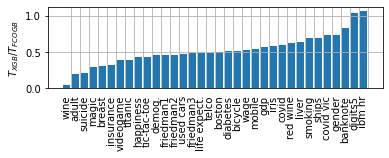

In [60]:
plt.figure(figsize=(6,1.5))
f=time_csv[['FCOGB']].to_numpy()
x=time_csv[['XGBoost']].to_numpy()
s=time_csv[['GS']].to_numpy()
g=time_csv[['GB']].to_numpy()
si=time_csv[['SIRUS']].to_numpy()
order = np.argsort((x/f).T[0])
x_values=np.arange(0,34,1)
x_ticks=time_csv[['dataset']].to_numpy().T[0][order]
plt.bar(x_values,(x/f).T[0][order])
plt.ylabel('$T_{XGB}/T_{FCOGB}$')
plt.xticks(x_values+0.5, x_ticks)
plt.grid()
plt.tick_params(bottom=False)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.savefig('time_xgb_fcogb.pdf', bbox_inches='tight',pad_inches=0.01)

# plt.bar(time_csv[['dataset']].to_numpy().T[0],(s/f).T[0])
# ax3.scatter(time_csv[['FCOGB']], time_csv[['GB']], c='none', edgecolors='b', marker='v', label='GB', alpha=1)
# ax3.scatter(time_csv[['FCOGB']], time_csv[['GS']], c='none', edgecolors='c', marker='^', label='GS', alpha=1)
# ax3.scatter(time_csv[['FCOGB']], time_csv[['SIRUS']], c='none', edgecolors='orange', marker='s', label='SIRUS', alpha=1)
# ax3.scatter(time_csv[['FCOGB']], time_csv[['FCOGB']], c='r', marker='.')
# ax3.xaxis.set_label_coords(.5,.1)
# ax3.yaxis.set_label_coords(.1,.5)
# ax3.set_xscale('log')
# ax3.set_yscale('log')
# ax3.set_xlabel('$T_{FCOGB}$')
# ax3.set_ylabel('$T_{Other}$')
# # ax3.legend()
# ax3.grid(which='minor', alpha=0.3)
# ax3.grid(which='major', alpha=1)

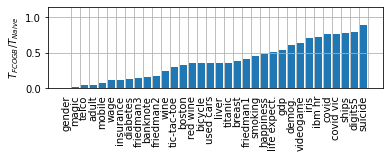

In [61]:
plt.figure(figsize=(6,1.5))
f=time_csv[['FCOGB']].to_numpy()
n=time_csv[['Naive']].to_numpy()
order = np.argsort((f/n).T[0])
x_values=np.arange(0,34,1)
x_ticks=time_csv[['dataset']].to_numpy().T[0][order]
plt.bar(x_values,(f/n).T[0][order])
plt.xticks(x_values+0.5, x_ticks)
plt.tick_params(bottom=False)
plt.ylabel('$T_{FCOGB}/T_{Naive}$')
plt.grid()
plt.xticks(rotation=90, ha='right', fontsize=10)

plt.ylim(0,1.15)
# plt.yscale('log')
plt.savefig('time_fcogb_naive.pdf', bbox_inches='tight',pad_inches=0.01)

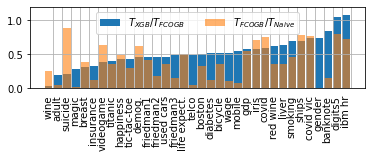

In [62]:
plt.figure(figsize=(6,1.5))
f=time_csv[['FCOGB']].to_numpy()
x=time_csv[['XGBoost']].to_numpy()
n=time_csv[['Naive']].to_numpy()
s=time_csv[['GS']].to_numpy()
g=time_csv[['GB']].to_numpy()
si=time_csv[['SIRUS']].to_numpy()
order = np.argsort((x/f).T[0])
x_values=np.arange(0,34,1)
x_ticks=time_csv[['dataset']].to_numpy().T[0][order]
plt.bar(x_values,(x/f).T[0][order], label='$T_{XGB}/T_{FCOGB}$')
plt.bar(x_values,(f/n).T[0][order], label='$T_{FCOGB}/T_{Naive}$', alpha=0.6)
# plt.ylabel('$T_{XGB}/T_{FCOGB}$')
plt.legend(ncol=2)
plt.xticks(x_values+0.5, x_ticks)
plt.grid()
plt.ylim([0,1.2])
plt.tick_params(bottom=False)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.savefig('time_xgb_fcogb_naive.pdf', bbox_inches='tight',pad_inches=0.01)

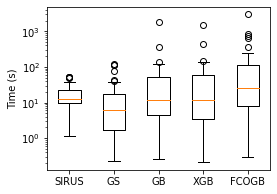

In [63]:
plt.figure(figsize=(4,3))
plt.boxplot([si.T[0][:-5], s.T[0], g.T[0], x.T[0], f.T[0]])
plt.yscale('log')
plt.ylabel('Time (s)')
plt.xticks([1,2,3,4,5],['SIRUS', 'GS', 'GB', 'XGB', 'FCOGB']) 
plt.savefig('running_time_box.pdf', bbox_inches='tight',pad_inches=0.01)

[array([113.31586504, 107.15278974,  84.54599708,  99.9161615 ,
       106.21335974,  92.79914439, 102.65511586, 101.08548526,
       100.04291431,  98.25399789, 104.3302619 , 112.03037374,
        90.34934329, 110.28274078, 102.2863013 , 104.45137613,
        88.63397788, 101.35136878, 114.84537002,  89.20195114,
        80.22271719,  82.56627704, 102.66070164, 123.84967331,
       111.23691253, 116.72622213, 100.99149216, 113.97996377,
        97.28752012, 106.13204185,  97.32682811,  94.50690986,
       101.32708296,  95.23857985, 113.08473081, 101.95013279,
       104.00209988,  96.62367663, 112.56472264,  92.68030498,
       106.60231551,  96.49128109,  90.6056664 ,  95.10662783,
        91.95408858,  97.87302361,  96.60859754, 103.12169936,
       105.6515267 ,  98.52579742,  99.74094663, 102.89094204,
        94.60120929, 107.0816002 , 108.42224738, 102.03580797,
       123.94703665, 109.17458938,  98.87727529,  96.37819553,
        97.67817744,  94.982711  , 111.28785153,  93.0

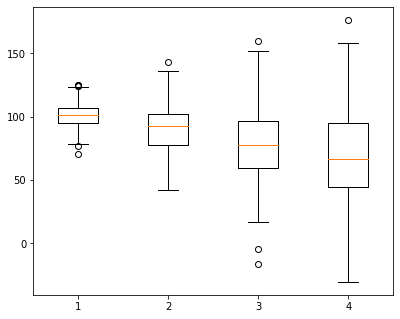

In [64]:
np.random.seed(10)
 
data_1 = np.random.normal(100, 10, 200)
data_2 = np.random.normal(90, 20, 200)
data_3 = np.random.normal(80, 30, 200)
data_4 = np.random.normal(70, 40, 200)
data = [data_1, data_2, data_3, data_4]
print(data)
fig = plt.figure(figsize =(5, 4))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot

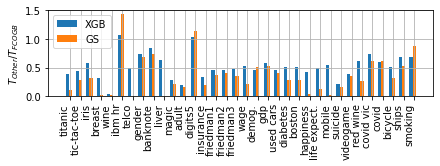

In [65]:
species = time_csv[['dataset']].to_numpy().T[0]
f=time_csv[['FCOGB']].to_numpy()
x=time_csv[['XGBoost']].to_numpy()
s=time_csv[['GS']].to_numpy()
g=time_csv[['GB']].to_numpy()
si=time_csv[['SIRUS']].to_numpy()
penguin_means = {
#     'SIRUS': (si/f).T[0],
#     'GS': (s/f).T[0],
    
    'XGB': (x/f).T[0],
#     'GB': (g/f).T[0],
    'GS': (s/f).T[0],
#     'FCOGB':f
}

x = np.arange(len(species))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0
fig, ax = plt.subplots(layout='constrained', figsize=(6,2.2))

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
#     ax.bar_label(rects, padding=3)
    multiplier += 1
plt.xticks(rotation=90, ha='right', fontsize=10)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('$T_{Other}/T_{FCOGB}$')
# ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
# ax.set_yscale('log')
ax.grid()
ax.legend()
# ax.set_ylim(0, 250)

plt.show()

In [66]:
time_csv[['dataset']].to_numpy().T[0],f.T[0]

(array(['titanic', 'tic-tac-toe', 'iris', 'breast', 'wine', 'ibm hr',
        'telco', 'gender', 'banknote', 'liver', 'magic', 'adult',
        'digits5', 'insurance', 'friedman1', 'friedman2', 'friedman3',
        'wage', 'demog.', 'gdp', 'used cars', 'diabetes', 'boston',
        'happiness', 'life expect.', 'mobile', 'suicide', 'videogame',
        'red wine', 'covid vic', 'covid', 'bicycle', 'ships', 'smoking'],
       dtype=object),
 array([2.5710e+01, 1.3990e+01, 2.4870e+00, 2.3920e+02, 5.5183e+01,
        1.2030e+01, 3.0390e+03, 3.2950e+01, 8.4440e+00, 1.9390e+02,
        3.5220e+02, 7.2830e+02, 9.7400e+01, 3.9530e+01, 6.9150e+00,
        2.8400e+01, 1.7650e+01, 2.5190e+01, 7.2420e+01, 4.8800e-01,
        2.0270e+01, 7.5910e+00, 1.0440e+01, 2.6430e+01, 1.3120e+02,
        8.1540e+02, 6.4460e+02, 1.1910e+02, 3.5340e+01, 8.5400e-01,
        1.1430e+00, 2.1240e+00, 4.4800e-01, 3.0100e-01]))

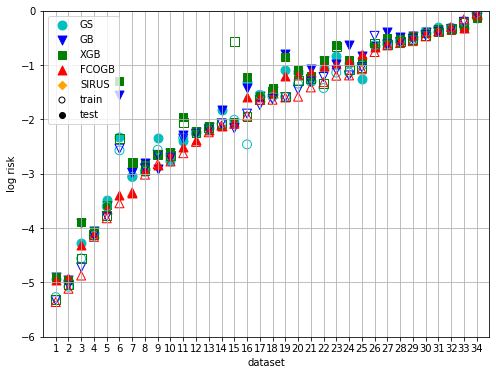

In [67]:
from matplotlib.ticker import FixedLocator
fig = plt.figure(figsize=(8,8))
gs = GridSpec(nrows=1, ncols=1)
ax0 = fig.add_subplot(gs[0, 0])
df2=pd_train_log_dataset.sort_values(by='orth_fc_Newton-CG').reset_index().drop('index', axis=1).reset_index()
df2['index']+=1
df3=pd_test_log_dataset.sort_values(by='orth_fc_Newton-CG').reset_index().drop('index', axis=1).reset_index()
df3['index']+=1
ax1=df3.plot.scatter(x='index', y='mwg_boosting_', marker='o', c='c',s=80,logy=False, ax=ax0, grid=True, figsize=(8,6), 
                    label='GS', legend=True, xlabel='dataset', ylabel='log risk', ylim=(-6, 0))
ax2=df3.plot.scatter(x='index', y='gpe_boosting_', marker='v',s=80,c='b', ax=ax0, grid=True, label='GB',
                   xlabel='dataset', ylabel='log risk')
ax3=df3.plot.scatter(x='index', y='xgb_keep_', marker='s',s=80,c='g', ax=ax0, grid=True, label='XGB',
                   xlabel='dataset', ylabel='log risk')
ax4=df3.plot.scatter(x='index', y='orth_fc_Newton-CG', marker='^',s=80, ax=ax0, c='r', grid=True, label='FCOGB',
                   xlabel='dataset', ylabel='log risk')
plt.scatter([0],[1],c='orange', label='SIRUS', marker='D')
ax5=df2.plot.scatter(x='index', y='mwg_boosting_', marker='o',s=80,c='none', edgecolors='c',  grid=True, ylabel='log risk', ax=ax1)
ax6=df2.plot.scatter(x='index', y='gpe_boosting_', marker='v',s=80,ax=ax0, c='none', edgecolors='b',ylabel='log risk',  grid=True)
ax7=df2.plot.scatter(x='index', y='xgb_keep_', marker='s',s=80,ax=ax0, c='none', edgecolors='g',ylabel='log risk',  grid=True)
ax8=df2.plot.scatter(x='index', y='orth_fc_Newton-CG', marker='^',s=80, ax=ax0, c='none',  xlabel='dataset',edgecolors='r', ylabel='log risk', grid=True)
plt.scatter((1,2),(1,2), marker='o', c='none', edgecolors='k', label='train')
plt.scatter((1,2),(1,2), marker='o', c='k', label='test')
plt.legend()
# plt.xticks(minor=True)
ax1.xaxis.set_major_locator(FixedLocator(list(range(1,35))))
# ax1.xaxis.set_data_interval(1,34)
ax1.grid(which='minor', alpha=0.3)
plt.xlim(0,35)
# ax3 = fig.add_axes([0.55, 0.22, 0.3, 0.4])
# # plt.figure(figsize=(4,4))
# ax3.plot((0,3039),(0,3039))
# ax3.scatter(time_csv[['FCOGB']], time_csv[['XGBoost']], c='g', marker='s', label='XGB', alpha=1)
# ax3.scatter(time_csv[['FCOGB']], time_csv[['GB']], c='b', marker='v', label='GB', alpha=1)
# ax3.scatter(time_csv[['FCOGB']], time_csv[['GS']], c='c', marker='o', label='GS', alpha=1)
# ax3.scatter(time_csv[['FCOGB']], time_csv[['SIRUS']], c='orange', marker='D', label='SIRUS', alpha=1)
# ax3.scatter(time_csv[['FCOGB']], time_csv[['FCOGB']], c='r', marker='^')
# ax3.xaxis.set_label_coords(.5,.1)
# ax3.yaxis.set_label_coords(.1,.5)
# ax3.set_xscale('log')
# ax3.set_yscale('log')
# ax3.set_xlabel('$T_{FCOGB}$')
# ax3.set_ylabel('$T_{Other}$')
# # ax3.legend()
# ax3.grid(which='minor', alpha=0.3)
# ax3.grid(which='major', alpha=1)
plt.savefig('all_datasets_order_log0.pdf', bbox_inches='tight',pad_inches=0.01)

In [68]:
df2

,index,dataset,mwg_boosting_,gpe_boosting_,xgb_keep_,orth_fc_Newton-CG,orth_fc_Newton-CG*,sirus
0,1,gdp,-5.269260,-5.326777,-5.311100,-5.359902,-5.327950,-2.832026
1,2,life expect.,-5.079947,-5.053789,-5.035553,-5.116149,-5.135701,-2.207275
2,3,happiness,-4.557450,-4.722968,-4.556679,-4.872738,-4.857134,-2.216407
3,4,red wine,-4.145384,-4.125824,-4.126134,-4.162087,-4.164033,-2.617296
4,5,friedman3,-3.598405,-3.787063,-3.769993,-3.819571,-3.828194,-2.385967
5,6,smoking,-2.570422,-2.538121,-2.348723,-3.543996,-3.184655,1000.000000
6,7,friedman2,-3.059584,-2.985916,-2.785316,-3.342499,-3.269588,-2.501036
7,8,friedman1,-2.963966,-2.900528,-2.940049,-3.017314,-3.008538,-1.801810
8,9,covid vic,-2.559887,-2.652523,-2.649133,-2.821928,-2.948784,1000.000000
9,10,boston,-2.670409,-2.702943,-2.669888,-2.774569,-2.778332,-2.253795


#### Ablation Study

In [105]:
def all_risks2(datasets, algo_names):
    train_risks={}
    test_risks={}
    for i in range(len(datasets)):
        train_risks[datasets[i]]={}
        test_risks[datasets[i]]={}
        for algo in algo_names:
            try:
                location='../experiment_output_greedy' if algo=='orth_fc_Newton-CG*' \
                    else '../experiment_output_20230816varreg_new'
                print(datasets[i], algo)
                train, test,_=get_all_risks(datasets[i], algo, col=10, location=location)
                train_risks[datasets[i]][algo]=train/get_max_risk(datasets[i])
                test_risks[datasets[i]][algo]=test/get_max_risk(datasets[i])
            except Exception as e:
                if algo=='orths_fc_Newton-CG':
                    location='../experiment_output_greedy' if algo=='orth_fc_Newton-CG*' \
                        else '../experiment_output_20230816varreg_new'
                    train, test,_=get_all_risks(datasets[i], algo.replace('s',''), col=cols[i], location=location)
                    train_risks[datasets[i]][algo]=train/get_max_risk(datasets[i])
                    test_risks[datasets[i]][algo]=test/get_max_risk(datasets[i])
    #                 print(e)
                continue
    return train_risks, test_risks

In [106]:
algo_names2=['mwg_boosting_',
    'gpe_boosting_', 
    'gpe_fc_Newton-CG',
    'xgb_keep_', 
    'orths_fc_Newton-CG',
    'orth_fc_Newton-CG*']
trains, tests = all_risks2(datasets, algo_names2)
today = date.today()
compare_test_file_a="../analysis_results/compare_test"+str(today)+"normal_ablation.csv"
compare_train_file_a="../analysis_results/compare_train"+str(today)+"normal_ablation.csv"
compare_test_log_file_a="../analysis_results/compare_test"+str(today)+"log_ablation.csv"
compare_train_log_file_a="../analysis_results/compare_train"+str(today)+"log_ablation.csv"
f = open(compare_test_file_a, 'w')
f2 = open(compare_train_file_a, 'w')
f3 = open(compare_test_log_file_a, 'w')
f4 = open(compare_train_log_file_a, 'w')
f.write('dataset'+','+','.join([','.join([algo+str(i) for i in range(1,52)]) for algo in algo_names2])+'\n')
f2.write('dataset'+','+','.join([','.join([algo+str(i) for i in range(1,52)]) for algo in algo_names2])+'\n')
f3.write('dataset'+','+','.join([','.join([algo+str(i) for i in range(1,52)]) for algo in algo_names2])+'\n')
f4.write('dataset'+','+','.join([','.join([algo+str(i) for i in range(1,52)]) for algo in algo_names2])+'\n')
for dataset in datasets:
#     print(dataset)
    f.write(dataset+',')
    f2.write(dataset+',')
    f3.write(dataset+',')
    f4.write(dataset+',')
    for algo in algo_names2:
        try:
            f.write(','.join([str(x) for x in tests[dataset][algo][0]])+',')
            f2.write(','.join([str(x) for x in trains[dataset][algo][0]])+',')
            f3.write(','.join([str(x) for x in np.log(tests[dataset][algo][0])])+',')
            f4.write(','.join([str(x) for x in np.log(trains[dataset][algo][0])])+',')
        except Exception as e:
#             print(e)
            continue
    f.write('\n')
    f2.write('\n')
    f3.write('\n')
    f4.write('\n')
f.close()
f2.close()
f3.close()
f4.close()
print('done')

titanic mwg_boosting_
titanic gpe_boosting_
titanic gpe_fc_Newton-CG
titanic xgb_keep_
titanic orths_fc_Newton-CG
titanic orth_fc_Newton-CG*
tic-tac-toe mwg_boosting_
tic-tac-toe gpe_boosting_
tic-tac-toe gpe_fc_Newton-CG
tic-tac-toe xgb_keep_
tic-tac-toe orths_fc_Newton-CG
tic-tac-toe orth_fc_Newton-CG*
iris mwg_boosting_
iris gpe_boosting_
iris gpe_fc_Newton-CG
iris xgb_keep_
iris orths_fc_Newton-CG
iris orth_fc_Newton-CG*
breast_cancer mwg_boosting_
breast_cancer gpe_boosting_
breast_cancer gpe_fc_Newton-CG
breast_cancer xgb_keep_
breast_cancer orths_fc_Newton-CG
breast_cancer orth_fc_Newton-CG*
load_wine mwg_boosting_
load_wine gpe_boosting_
load_wine gpe_fc_Newton-CG
load_wine xgb_keep_
load_wine orths_fc_Newton-CG
load_wine orth_fc_Newton-CG*
IBM_HR mwg_boosting_
IBM_HR gpe_boosting_
IBM_HR gpe_fc_Newton-CG
IBM_HR xgb_keep_
IBM_HR orths_fc_Newton-CG
IBM_HR orth_fc_Newton-CG*
telco_churn mwg_boosting_
telco_churn gpe_boosting_
telco_churn gpe_fc_Newton-CG
telco_churn xgb_keep_
tel

In [107]:
datasets2=['covid_vic','covid', 'bicycle','ships','smoking']
algo_names3=[
    'xgb_boosting_']
trains, tests = all_risks2(datasets2, algo_names3)
today = date.today()
compare_test_file_a="../analysis_results/compare_test"+str(today)+"normal_ablation1.csv"
compare_train_file_a="../analysis_results/compare_train"+str(today)+"normal_ablation1.csv"
compare_test_log_file_a="../analysis_results/compare_test"+str(today)+"log_ablation1.csv"
compare_train_log_file_a="../analysis_results/compare_train"+str(today)+"log_ablation1.csv"
f = open(compare_test_file_a, 'w')
f2 = open(compare_train_file_a, 'w')
f3 = open(compare_test_log_file_a, 'w')
f4 = open(compare_train_log_file_a, 'w')
f.write('dataset'+','+','.join([','.join([algo+str(i) for i in range(1,51)]) for algo in algo_names2])+'\n')
f2.write('dataset'+','+','.join([','.join([algo+str(i) for i in range(1,51)]) for algo in algo_names2])+'\n')
f3.write('dataset'+','+','.join([','.join([algo+str(i) for i in range(1,51)]) for algo in algo_names2])+'\n')
f4.write('dataset'+','+','.join([','.join([algo+str(i) for i in range(1,51)]) for algo in algo_names2])+'\n')
for dataset in datasets2:
    print(dataset)
    f.write(dataset+',')
    f2.write(dataset+',')
    f3.write(dataset+',')
    f4.write(dataset+',')
    for algo in algo_names3:
        try:
            f.write(','.join([str(x) for x in tests[dataset][algo][0]])+',')
            f2.write(','.join([str(x) for x in trains[dataset][algo][0]])+',')
            f3.write(','.join([str(x) for x in np.log(tests[dataset][algo][0])])+',')
            f4.write(','.join([str(x) for x in np.log(trains[dataset][algo][0])])+',')
        except Exception as e:
#             print(e)
            continue
    f.write('\n')
    f2.write('\n')
    f3.write('\n')
    f4.write('\n')
f.close()
f2.close()
f3.close()
f4.close()
print('done')

covid_vic xgb_boosting_
covid xgb_boosting_
bicycle xgb_boosting_
ships xgb_boosting_
smoking xgb_boosting_
covid_vic
covid
bicycle
ships
smoking
done


In [108]:
path = '../analysis_results/'
today=str(date.today())
tests_normal1=pd.read_csv(path+'compare_test'+today+'normal_ablation1.csv',index_col=False)#.drop(index=[33,32,31,30,29], axis=0)
trains_normal1=pd.read_csv(path+'compare_train'+today+'normal_ablation1.csv',index_col=False)#.drop(index=[33,32,31,30,29], axis=0)
trains_log1 = pd.read_csv(path+'compare_train'+today+'log_ablation1.csv',index_col=False)#.drop(index=[33,32,31,30,29], axis=0)
tests_log1=pd.read_csv(path+'compare_test'+today+'log_ablation1.csv',index_col=False)#.drop(index=[33,32,31,30,29], axis=0)

In [109]:
path = '../analysis_results/'
today=str(date.today())
tests_normal=pd.read_csv(path+'compare_test'+today+'normal_ablation.csv',index_col=False).drop(index=[33,32,31,30,29], axis=0)
trains_normal=pd.read_csv(path+'compare_train'+today+'normal_ablation.csv',index_col=False).drop(index=[33,32,31,30,29], axis=0)
trains_log = pd.read_csv(path+'compare_train'+today+'log_ablation.csv',index_col=False).drop(index=[33,32,31,30,29], axis=0)
tests_log=pd.read_csv(path+'compare_test'+today+'log_ablation.csv',index_col=False).drop(index=[33,32,31,30,29], axis=0)

In [111]:
trains_normal

,dataset,mwg_boosting_1,mwg_boosting_2,mwg_boosting_3,mwg_boosting_4,mwg_boosting_5,mwg_boosting_6,mwg_boosting_7,mwg_boosting_8,mwg_boosting_9,...,orth_fc_Newton-CG*42,orth_fc_Newton-CG*43,orth_fc_Newton-CG*44,orth_fc_Newton-CG*45,orth_fc_Newton-CG*46,orth_fc_Newton-CG*47,orth_fc_Newton-CG*48,orth_fc_Newton-CG*49,orth_fc_Newton-CG*50,orth_fc_Newton-CG*51
0,titanic,1.0,0.966067,0.966067,0.966067,0.865670,0.865670,0.740739,0.740739,0.740739,...,0.569635,0.569635,0.569635,0.569635,0.569635,0.569635,0.569635,0.569635,0.569635,0.569635
1,tic-tac-toe,1.0,0.930454,0.853816,0.853816,0.835272,0.835272,0.835272,0.835272,0.717865,...,0.514689,0.514689,0.514689,0.514689,0.514689,0.514689,0.514689,0.514689,0.514689,0.514689
2,iris,1.0,0.910153,0.910153,0.910153,0.730930,0.730930,0.730930,0.730930,0.730930,...,0.044550,0.044550,0.044550,0.044550,0.044550,0.044550,0.044550,0.044550,0.044550,0.044550
3,breast_cancer,1.0,0.946641,0.573171,0.573171,0.573171,0.573171,0.573171,0.573171,0.573171,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,load_wine,1.0,0.958921,0.958921,0.958921,0.377183,0.377183,0.377183,0.377183,0.281967,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,IBM_HR,1.0,0.617451,0.617451,0.591339,0.591339,0.591339,0.577866,0.577866,0.570449,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,telco_churn,1.0,0.834035,0.834035,0.834035,0.767318,0.767318,0.713286,0.713286,0.713286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,GenderRecognition,1.0,0.999820,0.619190,0.619190,0.272406,0.272406,0.213332,0.213332,0.213332,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,banknote,1.0,0.993383,0.993383,0.847716,0.847716,0.847716,0.470952,0.470952,0.470952,...,0.078573,0.078573,0.078573,0.078573,0.078573,0.078573,0.078573,0.078573,0.078573,0.078573
9,liver,1.0,0.984867,0.984867,0.984867,0.937936,0.937936,0.937936,0.901382,0.901382,...,0.701927,0.701927,0.684452,0.684452,0.684452,0.684452,0.684452,0.631028,0.631028,0.631028


In [94]:
tests_normal1[['mwg_boosting_'+str(i) for i in range(1, 51,1)]].mean(axis=1)

0    0.081163
1    0.385496
2    0.470338
3    0.199814
4    0.163074
dtype: float64

In [104]:
tests_normal[['orth_fc_Newton-CG*'+str(i) for i in range(1, 51,1)]].mean(axis=1)

0     0.712524
1     0.720939
2     0.530911
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8     0.263567
9     0.939597
10         NaN
11         NaN
12         NaN
13    0.126503
14         NaN
15    0.076767
16    0.044885
17    0.368010
18         NaN
19         NaN
20    0.115927
21         NaN
22         NaN
23    0.034849
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
dtype: float64

In [96]:
tests_normal.mean(axis=1)

/tmp/ipykernel_254/3138057070.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  tests_normal.mean(axis=1)


0     0.718439
1     0.609051
2     0.475265
3     0.345177
4     0.471246
5     0.644402
6     0.681308
7     0.244654
8     0.280921
9     0.893976
10    0.709294
11    0.586637
12    0.315463
13    0.129331
14    0.070786
15    0.084615
16    0.045487
17    0.382727
18    0.213779
19    0.026129
20    0.130356
21    0.143215
22    0.088149
23    0.035612
24    0.026060
25    0.129283
26    0.513197
27    0.728756
28    0.034751
dtype: float64

In [97]:
name_map={'mwg_boosting_':'GS',
         'gpe_boosting_':'GB',
          'gpe_fc_Newton-CG':'GB FC',
         'xgb_keep_':'XGBoost',
         'orth_fc_Newton-CG*':'FCOGB Greedy',
         'orths_fc_Newton-CG': 'FCOGB B&B'}
def compare_two_algos(ax, algo1, algo2, data, color_bar=False, show_y=True):
    data1=np.array([])
    data2=np.array([])
    colors=np.array([])
#     print(type(ax[0]))
    for i in range(1, 52,10):
        data1=np.append(data1,data[[algo1+str(i)]])
        data2=np.append(data2, data[[algo2+str(i)]])
        colors=np.append(colors, [i]*len(data[[algo1+str(i)]]))
    ax.plot((0.003, 1), (0.003, 1))
    im=ax.scatter(data2, data1, c=colors, cmap='seismic', alpha=0.5, s=10)
    ax.set_xlim(0.003, 1)
    ax.set_ylim(0.003, 1)
    ax.set_xlabel(name_map[algo2])
    if show_y:
        ax.set_ylabel(name_map[algo1])
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.grid(which='minor', alpha=0.4)
    if color_bar:
        plt.colorbar(im,ax=ax)

In [98]:
trains_normal.to_csv('temp.csv')

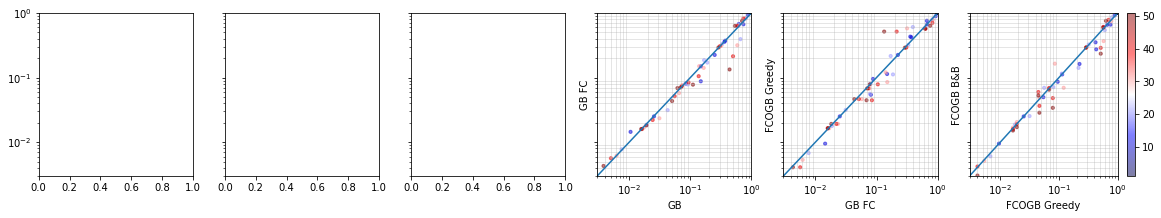

In [99]:
# plt.figure(figsize=(12,2))
import matplotlib.gridspec as gridspec
fig, ax = plt.subplots(1, 6, sharey=True, figsize=(20, 3), gridspec_kw={'width_ratios': [1, 1, 1, 1, 1, 1.2]})
# compare_two_algos(ax[0], 'orths_fc_Newton-CG', 'mwg_boosting_', trains_normal)
# compare_two_algos(ax[1], 'orths_fc_Newton-CG', 'xgb_keep_', trains_normal, show_y=False)
# compare_two_algos(ax[2], 'orths_fc_Newton-CG', 'gpe_boosting_', trains_normal, show_y=False)
compare_two_algos(ax[3], 'gpe_fc_Newton-CG', 'gpe_boosting_', trains_normal)
compare_two_algos(ax[4], 'orth_fc_Newton-CG*', 'gpe_fc_Newton-CG', trains_normal)
compare_two_algos(ax[5], 'orths_fc_Newton-CG', 'orth_fc_Newton-CG*', trains_normal, color_bar=True)
plt.savefig('ablation20230905.pdf', dpi=fig.dpi, bbox_inches='tight',pad_inches=0.01)

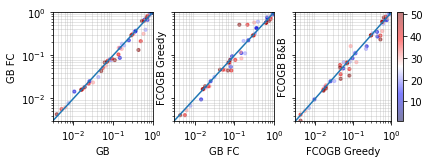

In [100]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(6.5, 2), gridspec_kw={'width_ratios': [1, 1, 1.2]})
# compare_two_algos(ax[0], 'orth_fc_Newton-CG', 'mwg_boosting_', trains_normal)
# compare_two_algos(ax[1], 'orth_fc_Newton-CG', 'xgb_keep_', trains_normal, show_y=False)
# compare_two_algos(ax[2], 'orth_fc_Newton-CG', 'gpe_boosting_', trains_normal, show_y=False)
compare_two_algos(ax[0], 'gpe_fc_Newton-CG', 'gpe_boosting_', trains_normal)
compare_two_algos(ax[1], 'orth_fc_Newton-CG*', 'gpe_fc_Newton-CG', trains_normal)
compare_two_algos(ax[2], 'orths_fc_Newton-CG', 'orth_fc_Newton-CG*', trains_normal, color_bar=True)
plt.savefig('ablation20230905.pdf', dpi=fig.dpi, bbox_inches='tight',pad_inches=0.01)

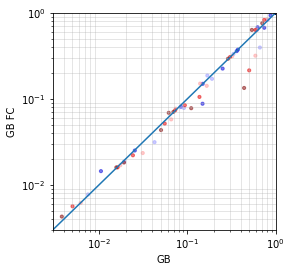

In [101]:
fig, ax = plt.subplots(1, 1, sharey=True, figsize=(4, 4), gridspec_kw={'width_ratios': [1]})
compare_two_algos(ax, 'gpe_fc_Newton-CG', 'gpe_boosting_', trains_normal)

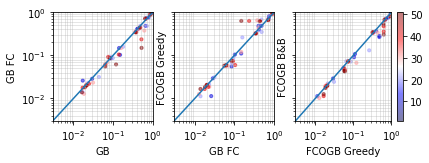

In [102]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(6.5, 2), gridspec_kw={'width_ratios': [1, 1, 1.2]})
# compare_two_algos(ax[0], 'orth_fc_Newton-CG', 'mwg_boosting_', trains_normal)
# compare_two_algos(ax[1], 'orth_fc_Newton-CG', 'xgb_keep_', trains_normal, show_y=False)
# compare_two_algos(ax[2], 'orth_fc_Newton-CG', 'gpe_boosting_', trains_normal, show_y=False)
compare_two_algos(ax[0], 'gpe_fc_Newton-CG', 'gpe_boosting_', tests_normal)
compare_two_algos(ax[1], 'orth_fc_Newton-CG*', 'gpe_fc_Newton-CG', tests_normal)
compare_two_algos(ax[2], 'orths_fc_Newton-CG', 'orth_fc_Newton-CG*', tests_normal, color_bar=True)
plt.savefig('ablation20230905test.pdf', dpi=fig.dpi, bbox_inches='tight',pad_inches=0.01)

In [103]:
name_map={'mwg_boosting_':'GS',
         'gpe_boosting_':'GB',
          'gpe_fc_Newton-CG':'GB FC',
         'xgb_keep_':'XGBoost',
         'orth_fc_Newton-CG*':'FCOGB Greedy',
         'orths_fc_Newton-CG': 'FCOGB B&B'}
def compare_two_algos(algo1, algo2, data):
    data1=np.array([])
    data2=np.array([])
    colors=np.array([])
#     print(type(ax[0]))
    for i in range(1, 51,1):
        data1=np.append(data1,data[[algo1+str(i)]])
        data2=np.append(data2, data[[algo2+str(i)]])
        colors=np.append(colors, [i]*len(data[[algo1+str(i)]]))
    s1=sum(data1>data2*1.00001)
    s2=sum(data1<=data2*1.00001)
    print(s1, s2, s2/(s1+s2))
compare_two_algos('gpe_fc_Newton-CG', 'gpe_boosting_', trains_normal)
compare_two_algos('orth_fc_Newton-CG*', 'gpe_fc_Newton-CG', trains_normal)
compare_two_algos('orths_fc_Newton-CG', 'orth_fc_Newton-CG*', trains_normal)

207 343 0.6236363636363637
126 424 0.7709090909090909
229 321 0.5836363636363636


In [84]:
(583+867)/50

29.0

In [85]:
1/0

ZeroDivisionError: division by zero

In [86]:
name_map={'mwg_boosting_':'GS',
         'gpe_boosting_':'GB',
          'gpe_fc_Newton-CG':'GB FC',
         'xgb_keep_':'XGBoost',
         'orth_fc_Newton-CG*':'FCOGB Greedy',
         'orth_fc_Newton-CG': 'FCOGB B&B'}
import matplotlib.colors as cls
def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)


def compare_two_algos(ax, algo1, algo2, data, color_bar=False, show_y=True):
    data1=np.array([])
    data2=np.array([])
    colors=np.array([])
#     print(type(ax[0]))
    norm = cls.Normalize(1,50)
    for i in range(1, 51):
        data1=np.append(data1,data[[algo1+str(i)]])
        data2=np.append(data2, data[[algo2+str(i)]])
        colors=np.append(colors, [i]*len(data[[algo1+str(i)]]))
    ax.plot((min(data1), max(data1)), (min(data2), max(data2)))
    cmap = discrete_cmap(50, 'cubehelix')
    edgecols = cmap(norm(colors))
#     im.set_facecolor('none')
    im=ax.scatter(data2, data1, edgecolors=edgecols, c='none',alpha=0.3)
    ax.set_xlim(min(data2), 1)
    ax.set_ylim(min(data1), 1)
    ax.set_xlabel(name_map[algo2])
    if show_y:
        ax.set_ylabel(name_map[algo1])
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.grid(which='minor', alpha=0.4)
    if color_bar:
        plt.colorbar(im,ax=ax)

KeyError: "None of [Index(['gpe_fc_Newton-CG1'], dtype='object')] are in the [columns]"

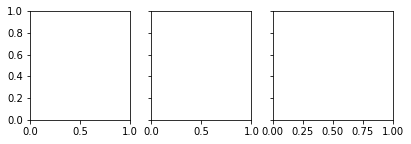

In [87]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(6.5, 2), gridspec_kw={'width_ratios': [1, 1, 1.2]})
compare_two_algos(ax[0], 'gpe_fc_Newton-CG', 'gpe_boosting_', trains_normal)
compare_two_algos(ax[1], 'orth_fc_Newton-CG*', 'gpe_fc_Newton-CG', trains_normal)
compare_two_algos(ax[2], 'orth_fc_Newton-CG', 'orth_fc_Newton-CG*', trains_normal, color_bar=True)
plt.savefig('ablation20230905.pdf', dpi=fig.dpi, bbox_inches='tight',pad_inches=0.01)

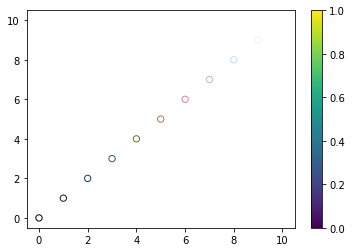

In [88]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

# def discrete_cmap() is omitted here...
def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)
# some sample data
x = np.linspace(0,10,11)
y = np.linspace(0,10,11)
z = x+y

# setup a Normalization instance
norm = colors.Normalize(z.min(),z.max())

# define the colormap
cmap = discrete_cmap(20, 'cubehelix')

# Use the norm and cmap to define the edge colours
edgecols = cmap(norm(z))

# Use that with the `edgecolors` argument. Set c='None' to turn off the facecolor
im=plt.scatter(x,y, edgecolors=edgecols, c = 'None', marker='o', s=40 )
plt.colorbar(im)
plt.show()

In [ ]:
ax1=df.plot.scatter(x='dataset', y='mwg_boosting_', marker='o',s=80,color='c', logy=True, grid=True, figsize=(8,6), 
                    label='Gradient Sum', legend=True, xlabel='dataset', ylabel='risk', rot=90, ylim=(0.01, 1))
ax2=df.plot.scatter(x='dataset', y='gpe_boosting_', marker='x',s=80,ax=ax1, color='b', grid=True, label='Gradient Boosting',
                   xlabel='dataset', ylabel='risk', rot=90)
ax3=df.plot.scatter(x='dataset', y='xgb_keep_', marker='s',s=80,ax=ax1, color='g', grid=True, label='XGBoost',
                   xlabel='dataset', ylabel='risk', rot=90)
ax4=df.plot.scatter(x='dataset', y='orth_fc_Newton-CG', marker='^',s=80, ax=ax1, color='r', grid=True, label='FCOGB',
                   xlabel='dataset', ylabel='risk', rot=90)
ax1.grid(which='minor', alpha=0.3)
plt.savefig('all_datasets_order.pdf', dpi=fig.dpi, bbox_inches='tight',pad_inches=0.01)

In [ ]:
pd_train_log_dataset

In [ ]:
df2=pd_train_log_dataset.sort_values(by='orth_fc_Newton-CG').reset_index().drop('index', axis=1)
ax1=df2.plot.scatter(x='dataset', y='mwg_boosting_', marker='o',s=80,color='c', logy=False, grid=True, figsize=(8,6), 
                    label='Gradient Sum', legend=True, xlabel='dataset', ylabel='log risk', rot=90, ylim=(-6, 0))
ax2=df2.plot.scatter(x='dataset', y='gpe_boosting_', marker='v',s=80,ax=ax1, color='b', grid=True, label='Gradient Boosting',
                   xlabel='dataset', ylabel='log risk', rot=90)
ax3=df2.plot.scatter(x='dataset', y='xgb_keep_', marker='s',s=80,ax=ax1, color='g', grid=True, label='XGBoost',
                   xlabel='dataset', ylabel='log risk', rot=90)
ax4=df2.plot.scatter(x='dataset', y='orth_fc_Newton-CG', marker='^',s=80, ax=ax1, color='r', grid=True, label='FCOGB',
                   xlabel='dataset', ylabel='log risk', rot=90)
ax1.grid(which='minor', alpha=0.3)
plt.savefig('all_datasets_order_log.pdf', dpi=fig.dpi, bbox_inches='tight',pad_inches=0.01)

In [ ]:
df3=pd_test_log_dataset.sort_values(by='orth_fc_Newton-CG').reset_index().drop('index', axis=1)
ax1=df3.plot.scatter(x='dataset', y='mwg_boosting_', marker='o',s=80,color='c', logy=False, grid=True, figsize=(8,6), 
                    label='Gradient Sum', legend=True, xlabel='dataset', ylabel='log risk', rot=90, ylim=(-6, 0))
ax2=df3.plot.scatter(x='dataset', y='gpe_boosting_', marker='v',s=80,ax=ax1, color='b', grid=True, label='Gradient Boosting',
                   xlabel='dataset', ylabel='log risk', rot=90)
ax3=df3.plot.scatter(x='dataset', y='xgb_keep_', marker='s',s=80,ax=ax1, color='g', grid=True, label='XGBoost',
                   xlabel='dataset', ylabel='log risk', rot=90)
ax4=df3.plot.scatter(x='dataset', y='orth_fc_Newton-CG', marker='^',s=80, ax=ax1, color='r', grid=True, label='FCOGB',
                   xlabel='dataset', ylabel='log risk', rot=90)
ax1.grid(which='minor', alpha=0.3)
plt.savefig('all_datasets_order_log.pdf', dpi=fig.dpi, bbox_inches='tight',pad_inches=0.01)

In [ ]:
df2=df.reindex([16,17,18,19,21,22,25,27,28,29,30,31,32,
    0,1,2,3,4,5,6,8,10,11,12,13,15, 24,26,33,
           7,9, 14, 20,23])
ax1=df2.plot.scatter(x='dataset', y='mwg_boosting_', marker='o',s=80,color='c', logy=True, grid=True, figsize=(8,6), 
                    label='Gradient Sum', legend=True, xlabel='dataset', ylabel='risk', rot=90, ylim=(0.01, 1))
ax2=df2.plot.scatter(x='dataset', y='gpe_boosting_', marker='x',s=80,ax=ax1, color='b', grid=True, label='Gradient Boosting',
                   xlabel='dataset', ylabel='risk', rot=90)
ax3=df2.plot.scatter(x='dataset', y='xgb_keep_', marker='s',s=80,ax=ax1, color='g', grid=True, label='XGBoost',
                   xlabel='dataset', ylabel='risk', rot=90)
ax4=df2.plot.scatter(x='dataset', y='orth_fc_Newton-CG', marker='^',s=80, ax=ax1, color='r', grid=True, label='FCOGB',
                   xlabel='dataset', ylabel='risk', rot=90)
ax1.grid(which='minor', alpha=0.3)
ax1.plot((12.5,12.5),(0.01, 1),c='k')
ax1.plot((28.5,28.5),(0.01, 1),c='k')
plt.savefig('all_datasets_order_problems.pdf', dpi=fig.dpi, bbox_inches='tight',pad_inches=0.01)